# ENEM Project

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

# 1. Introduction

In most parts of the world, specially in developed countries, the massive expansion of education has resulted in full access (and completion) of primary and secondary educations. Nowadays, public policy targets have shifted towards achieving mass enrolment in higher education. While socio-economic background impacts student's access to higher education, recent studies (Orr 2017) have shown that the admission systems also play an important role in making higher education accessible to students of all backgrounds.

A good amount of European countries provide free (or low fee) higher education for their citizens. The cost of tuition fees also plays a role in the inclusiveness of the higher education system. As an example, a recent study based on millions of anonymous tax records, in the US, have shown that less than 20% of the students in the bottom 60% are currently studying in one of the Ivy Leagues (https://www.nytimes.com/interactive/projects/college-mobility/harvard-university).    
 
In light of the scenario discussed above, Brazil is a good case study because its best universities are public, either funded by the Federal or the State Governments, and the admission system is of type 3 (Orr 2017) which is usually more inclusive. In this scenario, we would expect the student population in Brazilian universities to reflect the general population in both social and economic conditions. 

The *Exame Nacional do Ensino Medio* (ENEM) is an exam created in 1998 to assess the quality of the High School education is Brazil. In the beginning, this exam was used only for this purpose. However, over the years, some universitites would accept its scores to increase the scores of their selection exams. 

Up to 2008, in order to enter the undergraduate program of a particular university, one had to take the entrance exam for that particular university. This means that if you wanted to increase your chances to get into an undergrad program, you had to take as many exams as you could. There were two problems with this approach: Overlapping dates and travelling expenses. The university located in a certain state did not allowed the exam to be taken in other parts of the country. Thus, one would have to travel to many different states and cities in order to take all the exams. In a country with high inequality like Brazil, most people could not afford to make all this trips.  

Since 2009, however, the ENEM has been used as a way to select students for most, if not all, Federal Universities and some State's Universities in Brazil.

When registering for the ENEM, takers are required to fill out a socio-economic form. Therefore, the Ministry of Education, MEC, possesses information for millions of people regarding their performance in the exam and their socio-economic background. Fortunately, all this information, with exception of the takers identities, is public and available at the government website (http://inep.gov.br/microdados). 

The aim of this project is to analyze the impact socio-economic background has on the access to higher education in Brazil and to show that, in a country with high inequality and bad primary and secondary public schools, inclusion is not achieved even if all the other mechanisms are supposedly in place. We will also attempt to predict the chance of a particular person to access higher education based on their social and economic conditions.


("Study on the impact of admission sysytems on higher education outcomes: Volume I: Comparative report. Education and Training" - 2017 - Orr, D. and Usher, A. and Haj, C. and Atherton, G. and Geanta, I.)

# 2. The Data

We will work with the publicly available data found at: http://inep.gov.br/microdados.

MEC provides *cvs* files with data from 1998 to 2017. We will initially focus on the data for the year 2017.

The ENEM consists of 4 exams of 45 questions each and one essay:

1) The Natural Science (Ciencias Naturais) Exam - Tests knowledge of physics, chemistry and biology.

2) The Humanities (Ciencias Humanas) Exam - Tests knowledge of history and geography.

3) The Math Exam 

4) The Reading Exam - Tests knowledge of Portuguese and a foreign languge (Spanish or English).

5) The Writing Exam - It consists of an essay.


Below you will find the description of each field used in the analysis:

**NU_ANO** - The year the exam was taken.

**SG_UF_RESIDENCIA** - Code of the State the taker lives in.

**NU_IDADE** - Age of the taker.

**TP_SEXO** - Gender of the taker.

**TP_ESTADO_CIVIL** - Marital Status.

**TP_COR_RACA** - Race/Ethnicity.

**TP_ST_CONCLUSAO** - High School Status.

**TP_ANO_CONCLUIU** - Year of Graduation.

**TP_ESCOLA** - Type of High School.

**NU_NOTA_CN** - Grade of the Natural Science Exam.

**NU_NOTA_CH** - Grade of the Humanities Exam. 

**NU_NOTA_LC** - Grade of the Reading Exam.

**NU_NOTA_MT** - Grade of the Math Exam.

**NU_NOTA_REDACAO** - Grade of the Writing Exam.

**Q001** - Father's highest level of Education.

**Q002** - Mother's highest level of Education.

**Q005** - Number of household members.

**Q006** - Monthly Income.

**Q025** - Home access to the Internet.


The ENEM is taken in two days and usually happens in November.

In [2]:
import pandas as pd
from pandas import Series,DataFrame
from pylab import *
import numpy as np
from numpy import nan as NA
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import sklearn as skl
import math
import plotly.plotly as py
import plotly
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig

import csv
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import expon

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split #training and testing data split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler 
import itertools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import NearMiss
from imblearn.ensemble import EasyEnsemble
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.metrics import precision_recall_fscore_support

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [3]:
# Getting the data into a dataframe
columns = ['NU_INSCRICAO','NU_ANO','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_ESTADO_CIVIL',
          'TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA',
          'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT',
          'NU_NOTA_REDACAO','Q001','Q002','Q003','Q004','Q005','Q006','Q024','Q025']

df = pd.read_csv('proj_3251/2017/DADOS/MICRODADOS_ENEM_2017.csv',encoding='cp860',sep=';',usecols=columns)
df.head(10)


NU_INSCRICAO  NU_ANO SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0  170003336736    2017               SP      29.0       F              0.0   
1  170003333545    2017               MS      22.0       F              0.0   
2  170001663644    2017               SP      38.0       F              0.0   
3  170001663645    2017               SC      35.0       F              0.0   
4  170001663646    2017               AL      40.0       M              0.0   
5  170001663647    2017               RS      20.0       F              0.0   
6  170003334115    2017               PR      36.0       M              1.0   
7  170003334116    2017               SC      18.0       F              0.0   
8  170003334117    2017               RS      23.0       F              0.0   
9  170001669940    2017               PE      23.0       M              0.0   

   TP_COR_RACA  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  ...   NU_NOTA_MT  \
0            1                1               11          1  ...        465.5   
1            1                1                5          1  ...          NaN   
2            1                1               11          1  ...          NaN   
3            1                1                6          1  ...        591.2   
4            3                1               11          1  ...        584.6   
5            1                1                2          1  ...        578.5   
6            2                1               11          1  ...        607.5   
7            1                1                1          1  ...          NaN   
8            1                1                6          1  ...          NaN   
9            3                1                3          1  ...        479.0   

   NU_NOTA_REDACAO  Q001  Q002  Q003 Q004 Q005 Q006 Q024  Q025  
0            560.0     E     D     C    B  3.0    D    B     B  
1              NaN     C     E     B    B  4.0    C    A     A  
2              NaN     A     A     F    B  4.0    G    B     B  
3            580.0     E     D     B    B  4.0    D    B     B  
4            580.0     A     B     B    F  3.0    C    C     B  
5            540.0     F     F     B    B  3.0    J    C     B  
6            400.0     C     D     B    B  2.0    D    B     B  
7              NaN     F     G     F    D  4.0    C    B     B  
8              NaN     B     B     A    A  1.0    C    A     A  
9            320.0     A     E     A    A  3.0    B    B     B  

[10 rows x 23 columns]

In [4]:
df.describe()

NU_INSCRICAO     NU_ANO      NU_IDADE  TP_ESTADO_CIVIL   TP_COR_RACA  \
count  6.731341e+06  6731341.0  6.731240e+06     6.459700e+06  6.731341e+06   
mean   1.700034e+11     2017.0  2.295379e+01     1.391760e-01  2.146530e+00   
std    1.943171e+06        0.0  7.728938e+00     4.002266e-01  1.011780e+00   
min    1.700000e+11     2017.0  1.000000e+01     0.000000e+00  0.000000e+00   
25%    1.700017e+11     2017.0  1.800000e+01     0.000000e+00  1.000000e+00   
50%    1.700034e+11     2017.0  2.000000e+01     0.000000e+00  2.000000e+00   
75%    1.700050e+11     2017.0  2.500000e+01     0.000000e+00  3.000000e+00   
max    1.700068e+11     2017.0  9.000000e+01     3.000000e+00  5.000000e+00   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU     TP_ESCOLA    NU_NOTA_CN  \
count     6.731341e+06     6.731341e+06  6.731341e+06  4.437560e+06   
mean      1.476319e+00     3.297199e+00  1.310393e+00  5.108619e+02   
std       7.025884e-01     3.874979e+00  5.525744e-01  7.212734e+01   
min       1.000000e+00     0.000000e+00  1.000000e+00  0.000000e+00   
25%       1.000000e+00     0.000000e+00  1.000000e+00  4.547000e+02   
50%       1.000000e+00     2.000000e+00  1.000000e+00  5.063000e+02   
75%       2.000000e+00     6.000000e+00  2.000000e+00  5.618000e+02   
max       4.000000e+00     1.100000e+01  4.000000e+00  8.856000e+02   

         NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO          Q005  
count  4.701428e+06  4.701428e+06  4.437560e+06     4.701428e+06  6.731340e+06  
mean   5.188260e+02  5.102056e+02  5.187597e+02     5.225579e+02  3.941260e+00  
std    8.341395e+01  6.690545e+01  1.050047e+02     1.859206e+02  1.577570e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00  1.000000e+00  
25%    4.566000e+02  4.687000e+02  4.357000e+02     4.600000e+02  3.000000e+00  
50%    5.210000e+02  5.149000e+02  5.027000e+02     5.400000e+02  4.000000e+00  
75%    5.806000e+02  5.568000e+02  5.853000e+02     6.200000e+02  5.000000e+00  
max    8.683000e+02  7.888000e+02  9.939000e+02     1.000000e+03  2.000000e+01

Approximately 6.7 millions people signed up to take the exam in 2017.

### 2.1 Cleaning and Transforming the data

In [5]:
# Checking for the total number of null values per variable
df.isnull().sum()

NU_INSCRICAO              0
NU_ANO                    0
SG_UF_RESIDENCIA          0
NU_IDADE                101
TP_SEXO                   0
TP_ESTADO_CIVIL      271641
TP_COR_RACA               0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
NU_NOTA_CN          2293781
NU_NOTA_CH          2029913
NU_NOTA_LC          2029913
NU_NOTA_MT          2293781
NU_NOTA_REDACAO     2029913
Q001                      0
Q002                      0
Q003                      1
Q004                      1
Q005                      1
Q006                      1
Q024                      1
Q025                      1
dtype: int64

The only variables with a large number of missing values are those related to the grades. This means that around 30% of the people did not take the exam. As can be noticed from the table above, the number of people who missed the math and natural sciences exams are not the same as those who missed the reading/writing exams. This happens because the  ENEM is taken in two separate days. We will discard all missing values, because if one did not take all the exams, one will not enter any university.

In [6]:
# Discard missing values
df_c=df.dropna()

In [7]:
df_c.describe()

NU_INSCRICAO     NU_ANO      NU_IDADE  TP_ESTADO_CIVIL   TP_COR_RACA  \
count  4.283552e+06  4283552.0  4.283552e+06     4.283552e+06  4.283552e+06   
mean   1.700033e+11     2017.0  2.157707e+01     1.025513e-01  2.123211e+00   
std    1.937991e+06        0.0  7.034645e+00     3.484142e-01  1.012635e+00   
min    1.700000e+11     2017.0  1.000000e+01     0.000000e+00  0.000000e+00   
25%    1.700017e+11     2017.0  1.700000e+01     0.000000e+00  1.000000e+00   
50%    1.700033e+11     2017.0  1.900000e+01     0.000000e+00  2.000000e+00   
75%    1.700050e+11     2017.0  2.300000e+01     0.000000e+00  3.000000e+00   
max    1.700068e+11     2017.0  8.900000e+01     3.000000e+00  5.000000e+00   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU     TP_ESCOLA    NU_NOTA_CN  \
count     4.283552e+06     4.283552e+06  4.283552e+06  4.283552e+06   
mean      1.556452e+00     2.630937e+00  1.381316e+00  5.108268e+02   
std       7.114658e-01     3.560451e+00  6.059711e-01  7.216717e+01   
min       1.000000e+00     0.000000e+00  1.000000e+00  0.000000e+00   
25%       1.000000e+00     0.000000e+00  1.000000e+00  4.546000e+02   
50%       1.000000e+00     1.000000e+00  1.000000e+00  5.062000e+02   
75%       2.000000e+00     4.000000e+00  2.000000e+00  5.618000e+02   
max       4.000000e+00     1.100000e+01  4.000000e+00  8.856000e+02   

         NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO          Q005  
count  4.283552e+06  4.283552e+06  4.283552e+06     4.283552e+06  4.283552e+06  
mean   5.212856e+02  5.120435e+02  5.189869e+02     5.303384e+02  3.978377e+00  
std    8.209024e+01  6.556066e+01  1.050666e+02     1.815466e+02  1.517445e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00  1.000000e+00  
25%    4.590000e+02  4.707000e+02  4.358000e+02     4.600000e+02  3.000000e+00  
50%    5.238000e+02  5.164000e+02  5.029000e+02     5.400000e+02  4.000000e+00  
75%    5.826000e+02  5.581000e+02  5.856000e+02     6.200000e+02  5.000000e+00  
max    8.683000e+02  7.888000e+02  9.939000e+02     1.000000e+03  2.000000e+01

In reality, approximately 4.3 millions people took the exam in 2017.

#### 2.1.1 Age

Text(0.5,0,'Age')

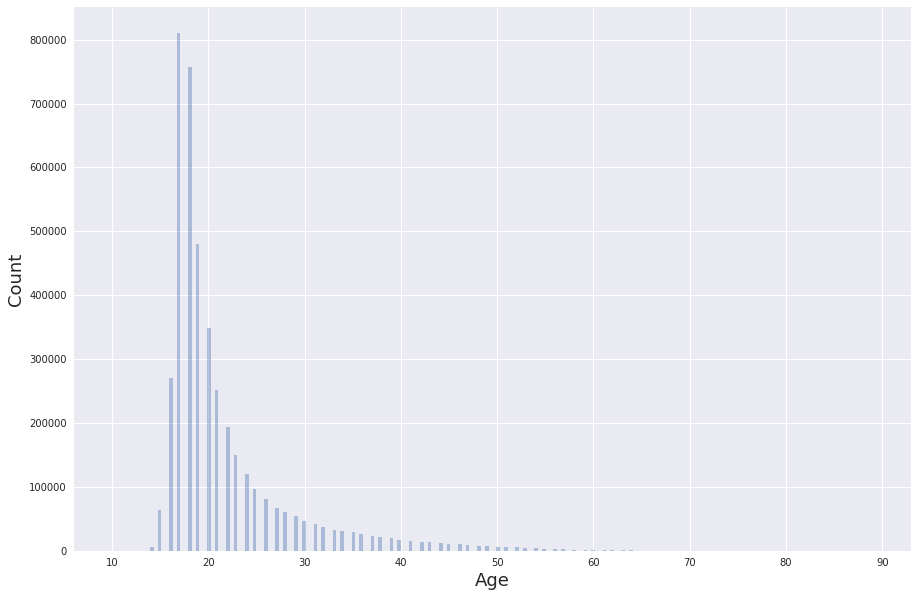

In [8]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df_c.NU_IDADE,bins=200, kde=False)
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Age',fontsize=18)

In [9]:
# Mean, Median and Standar Deviation
print('Mean:',mean(df_c.NU_IDADE),'Median:',median(df_c.NU_IDADE),'Std:',std(df_c['NU_IDADE']))

Mean: 21.577068750420214 Median: 19.0 Std: 7.034643851380236


As expected, most students have ages between 16 and 19 which is the range of age for students finishing high school. 

We will create a new feature called Aclass to divide the exam taker into Age Groups.

In [10]:
# Create the feature Aclass:
df_c['Aclass']='child'
df_c.Aclass[(df_c.NU_IDADE <= 18.0) & (df_c.NU_IDADE > 13.0)]='teen'
df_c.Aclass[(df_c.NU_IDADE <= 25.0) & (df_c.NU_IDADE > 18.0)]='young adult'
df_c.Aclass[(df_c.NU_IDADE <= 60.0) & (df_c.NU_IDADE > 25.0)]='adult'
df_c.Aclass[(df_c.NU_IDADE > 60.0)]='senior'

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/p

In [11]:
df_c.head(10)

NU_INSCRICAO  NU_ANO SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0   170003336736    2017               SP      29.0       F              0.0   
3   170001663645    2017               SC      35.0       F              0.0   
4   170001663646    2017               AL      40.0       M              0.0   
5   170001663647    2017               RS      20.0       F              0.0   
6   170003334115    2017               PR      36.0       M              1.0   
9   170001669940    2017               PE      23.0       M              0.0   
11  170001668485    2017               BA      26.0       F              0.0   
12  170001665201    2017               MT      23.0       F              2.0   
13  170001665202    2017               CE      24.0       M              0.0   
14  170001665203    2017               CE      24.0       M              0.0   

    TP_COR_RACA  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA     ...       \
0             1                1               11          1     ...        
3             1                1                6          1     ...        
4             3                1               11          1     ...        
5             1                1                2          1     ...        
6             2                1               11          1     ...        
9             3                1                3          1     ...        
11            0                1                7          1     ...        
12            3                1                5          1     ...        
13            1                1                7          1     ...        
14            2                1                3          1     ...        

    NU_NOTA_REDACAO  Q001  Q002  Q003  Q004 Q005 Q006 Q024 Q025       Aclass  
0             560.0     E     D     C     B  3.0    D    B    B        adult  
3             580.0     E     D     B     B  4.0    D    B    B        adult  
4             580.0     A     B     B     F  3.0    C    C    B        adult  
5             540.0     F     F     B     B  3.0    J    C    B  young adult  
6             400.0     C     D     B     B  2.0    D    B    B        adult  
9             320.0     A     E     A     A  3.0    B    B    B  young adult  
11            560.0     G     F     D     B  6.0    J    E    B        adult  
12            420.0     B     E     B     D  1.0    B    B    B  young adult  
13            620.0     B     E     A     F  5.0    E    B    B  young adult  
14            620.0     B     B     C     B  5.0    C    B    B  young adult  

[10 rows x 24 columns]

In [12]:
# Count the number of individual age class (rate)
pd.value_counts(df_c['Aclass'],dropna=True,sort=False,normalize=True)

child          0.000071
young adult    0.382908
adult          0.170489
teen           0.445297
senior         0.001234
Name: Aclass, dtype: float64

Text(0.5,0,'Age Class')

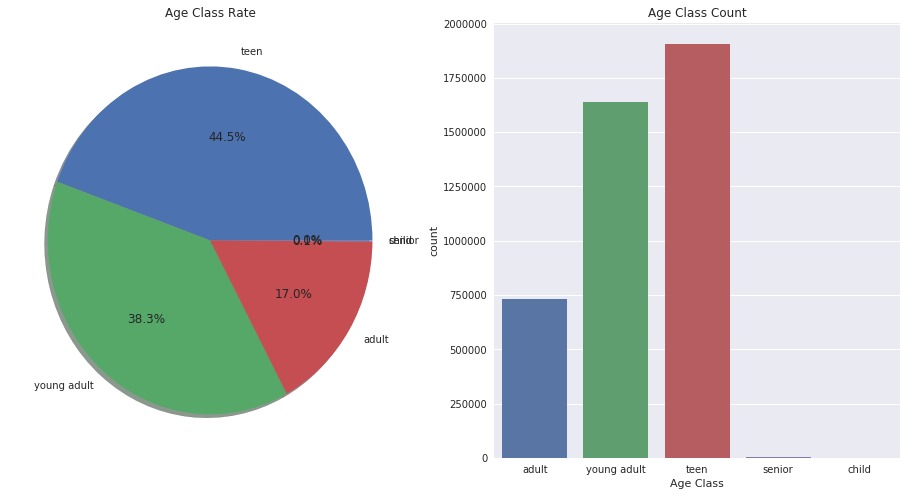

In [13]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Aclass'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Age Class Rate')
ax[0].set_ylabel('')
sns.countplot('Aclass',data=df_c,ax=ax[1])
ax[1].set_title('Age Class Count')
ax[1].set_xlabel('Age Class')

Since the proportion of children and seniors taken the exam is extremely small,  we will regroup these two categories into teens and adults.

In [14]:
df_c['Aclass'] = df_c['Aclass'].replace('child','teen')
df_c['Aclass'] = df_c['Aclass'].replace('senior','adult')

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



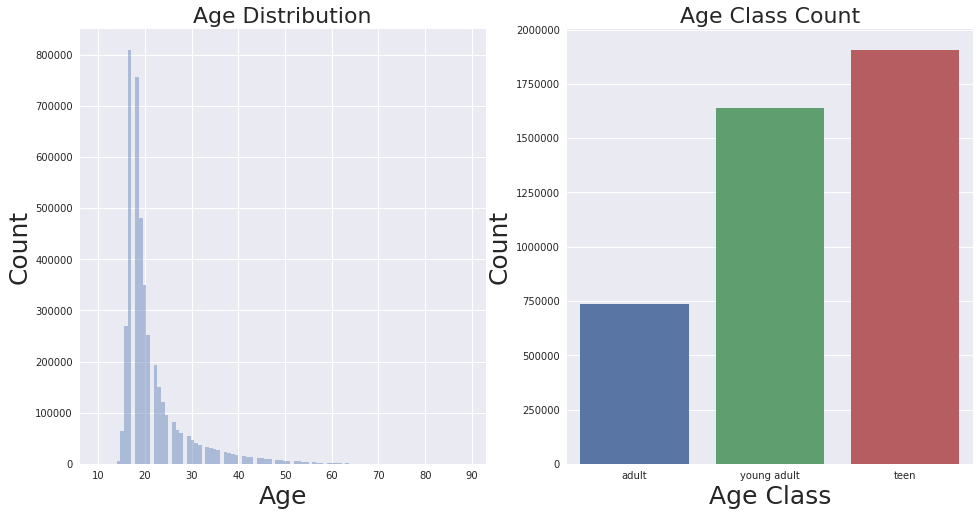

In [15]:
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.distplot(df_c.NU_IDADE,bins=100, kde=False,ax=ax[0])
ax[0].set_ylabel('Count',fontsize=25)
ax[0].set_xlabel('Age',fontsize=25)
ax[0].set_title('Age Distribution',fontsize=22)
sns.countplot('Aclass',data=df_c,ax=ax[1])
ax[1].set_title('Age Class Count',fontsize=22)
ax[1].set_xlabel('Age Class',fontsize=25)
ax[1].set_ylabel('Count',fontsize=25)
#savefig('count_ageclass.eps', fmt='eps', dpi=200)
plt.show()

In [16]:
# Count the number of individual age class (rate)
pd.value_counts(df_c['Aclass'],dropna=True,sort=False,normalize=True)

young adult    0.382908
adult          0.171723
teen           0.445369
Name: Aclass, dtype: float64

#### 2.1.2 Marital Status

The marital status is coded as:

0 : Single

1 : Married

2 : Divorced/Separated

3 : widow/widower


In [17]:
# Count the number of individual marital status (rate)
pd.value_counts(df_c['TP_ESTADO_CIVIL'],dropna=True,sort=False,normalize=True)

0.0    0.910866
2.0    0.010893
3.0    0.001262
1.0    0.076980
Name: TP_ESTADO_CIVIL, dtype: float64

Text(0.5,0,'Marital Status')

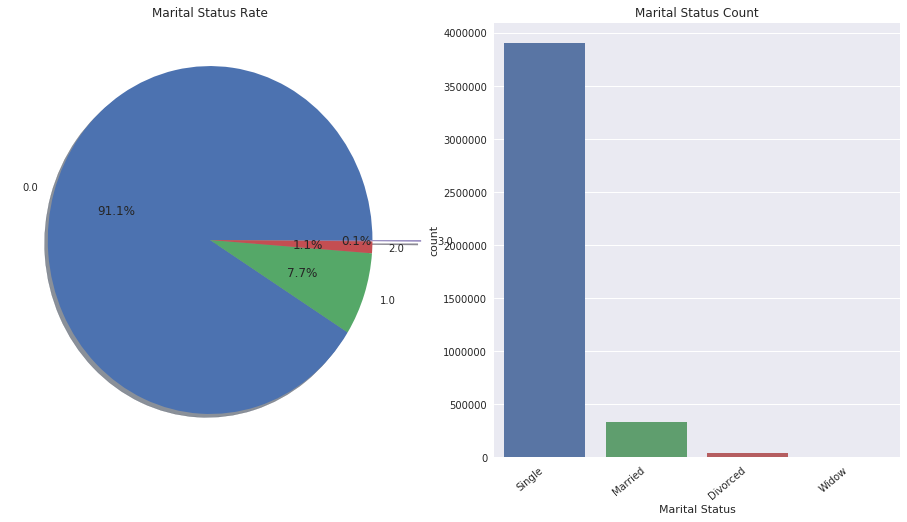

In [18]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['TP_ESTADO_CIVIL'].value_counts().plot.pie(explode=(0,0,0,0.3),autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Marital Status Rate')
ax[0].set_ylabel('')
sns.countplot('TP_ESTADO_CIVIL',data=df_c,ax=ax[1])
ax[1].set_xticklabels(['Single','Married','Divorced','Widow'], rotation=40, ha="right")
ax[1].set_title('Marital Status Count')
ax[1].set_xlabel('Marital Status')

Since most of the exam taker are teenagers or young adults, the large majority of them (~91%) are single. For this reason, this variable is not likely to provide any important information about the takers grades.

#### 2.1.3 Sex

In [19]:
# Count the number of individual Sex (rate)
pd.value_counts(df_c['TP_SEXO'],dropna=True,sort=False,normalize=True)

F    0.585815
M    0.414185
Name: TP_SEXO, dtype: float64

Text(0.5,0,'Sex')

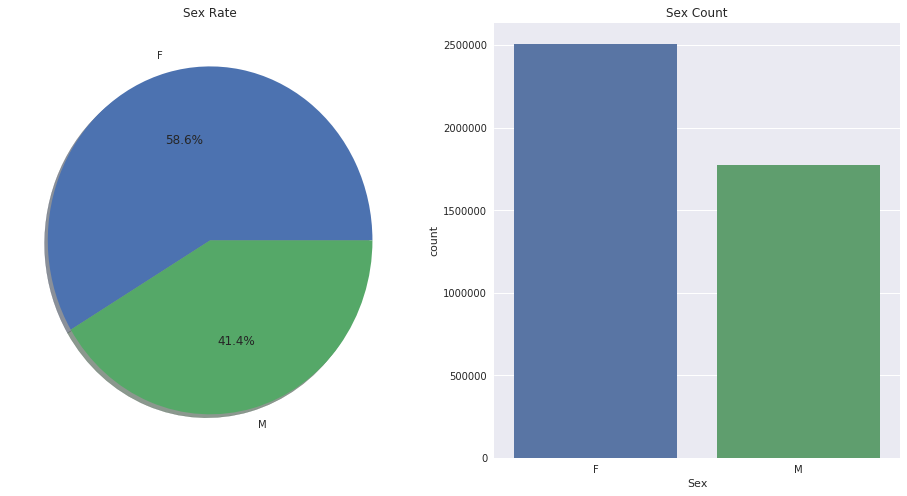

In [20]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['TP_SEXO'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sex Rate')
ax[0].set_ylabel('')
sns.countplot('TP_SEXO',data=df_c,ax=ax[1])
ax[1].set_title('Sex Count')
ax[1].set_xlabel('Sex')

Around 60% of the exam takers were female.  

#### 2.1.4 Race

The race/ethnicity is coded as:

0 : Not Declared

1 : White

2 : Black

3 : Mixed

4 : Asian

5 : Indigenous/Native

In [21]:
# Count the number of individual Race (rate)
pd.value_counts(df_c['TP_COR_RACA'],dropna=True,sort=False,normalize=True)

0    0.017066
1    0.367136
2    0.125907
3    0.461078
4    0.023038
5    0.005776
Name: TP_COR_RACA, dtype: float64

Text(0.5,0,'Race/Ethnicity')

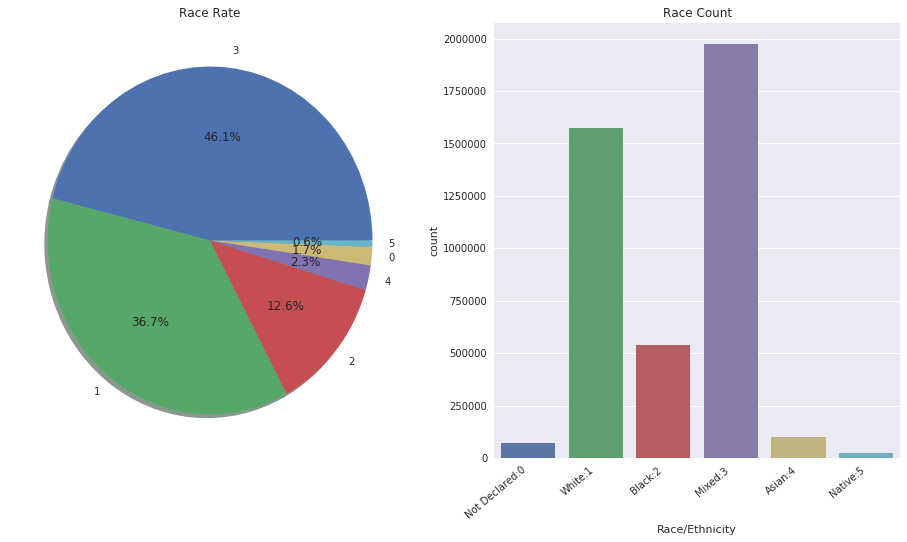

In [22]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['TP_COR_RACA'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Race Rate')
ax[0].set_ylabel('')
sns.countplot('TP_COR_RACA',data=df_c,ax=ax[1])
ax[1].set_xticklabels(['Not Declared:0','White:1','Black:2','Mixed:3','Asian:4','Native:5'], rotation=40, ha="right")
ax[1].set_title('Race Count')
ax[1].set_xlabel('Race/Ethnicity')

Differently from many colonies, in Brazil there was a large miscegenation among different races and ethnicities. The majority of people declared themselves as "parda", which is the portuguese word used to designate someone who has a brown skincolor. Not all the people who identify themselves as pardos are mixed race, but the vast majority are. 

#### 2.1.5 High School Status

The High School Status is coded as:

1 : Already finished High School

2 : Will finish High School in the current year

3 : Will finish High School after the current year (which means the student is in his 1st or 2nd year)

4 : Have not finished High School, but not currently studying

In [23]:
# Count the number of individual High School Status (rate)
pd.value_counts(df_c['TP_ST_CONCLUSAO'],dropna=True,sort=False,normalize=True)

1    0.566704
2    0.316669
3    0.110097
4    0.006529
Name: TP_ST_CONCLUSAO, dtype: float64

Text(0.5,0,'High School Status')

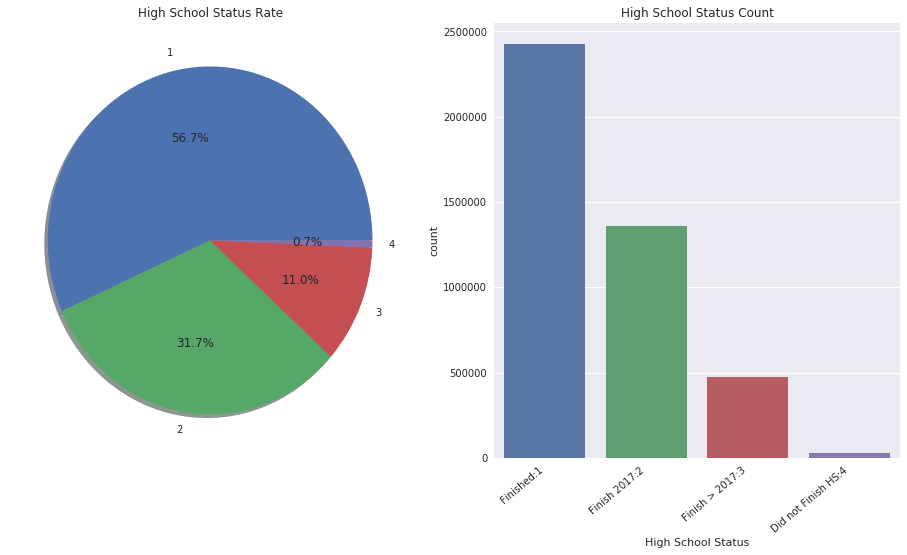

In [24]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['TP_ST_CONCLUSAO'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('High School Status Rate')
ax[0].set_ylabel('')
sns.countplot('TP_ST_CONCLUSAO',data=df_c,ax=ax[1])
ax[1].set_xticklabels(['Finished:1','Finish 2017:2','Finish > 2017:3','Did not Finish HS:4'], rotation=40, ha="right")
ax[1].set_title('High School Status Count')
ax[1].set_xlabel('High School Status')

The exam is usually taken in November, before the end of school year (which is December). This means that most people taking the exam in 2017 have finished High School before 2017. Only 30% of the takers were finishing High School at the same year of the exam and around 10% are 1st or 2nd year students.  

#### 2.1.6 Year of High School graduation

The Year of graduation is coded as:

0 : not Declared 

1 : 2016

2 : 2015

3 : 2014

4 : 2013

5 : 2012

6 : 2011

7 : 2010

8 : 2009

9 : 2008

10 : 2007

11 : Before 2007

In [25]:
# Count the number of people by year of graduation
pd.value_counts(df_c['TP_ANO_CONCLUIU'],dropna=True,sort=False,normalize=True)

0     0.433296
1     0.139710
2     0.090619
3     0.063823
4     0.046279
5     0.036305
6     0.027033
7     0.024057
8     0.019931
9     0.016043
10    0.014499
11    0.088405
Name: TP_ANO_CONCLUIU, dtype: float64

Text(0.5,0,'Year of Graduation')

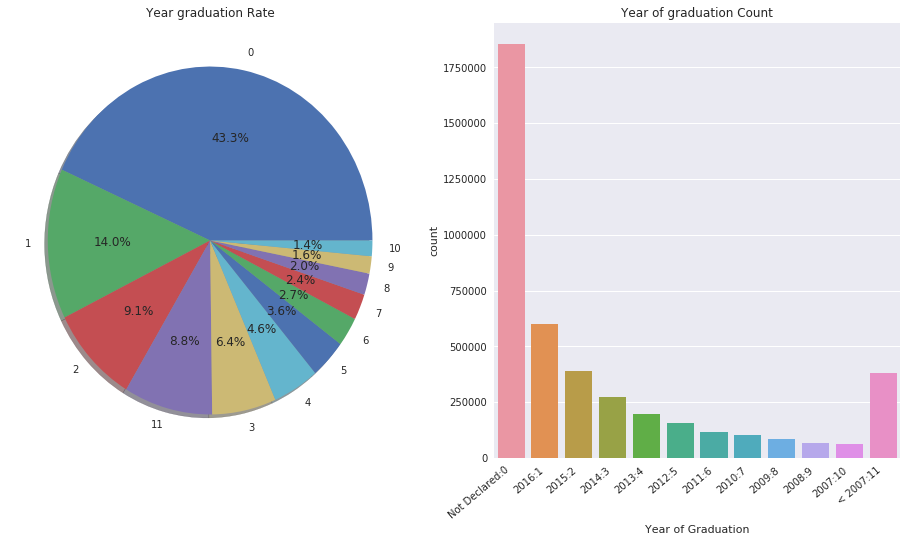

In [26]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['TP_ANO_CONCLUIU'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Year graduation Rate')
ax[0].set_ylabel('')
sns.countplot('TP_ANO_CONCLUIU',data=df_c,ax=ax[1])
ax[1].set_xticklabels(['Not Declared:0','2016:1','2015:2','2014:3','2013:4','2012:5','2011:6',
                      '2010:7','2009:8','2008:9','2007:10','< 2007:11'], rotation=40, ha="right")
ax[1].set_title('Year of graduation Count')
ax[1].set_xlabel('Year of Graduation')

43.3% did not declare the year of graduation - These are the people who are supposed to finish High School in 2017 or those who never finished High School. 

Interestingly, among those who have graduated most have finished high School in 2016, 2015, 2014 and before 2007.  

In [27]:
# Create the feature HSgrad:
df_c['HSgrad']='Not yet'
df_c.HSgrad[(df_c.TP_ANO_CONCLUIU == 1)]='1 year'
df_c.HSgrad[(df_c.TP_ANO_CONCLUIU == 2)]='2 years'
df_c.HSgrad[(df_c.TP_ANO_CONCLUIU <= 5) & (df_c.TP_ANO_CONCLUIU > 2)]='3-5 years'
df_c.HSgrad[(df_c.TP_ANO_CONCLUIU <= 10) & (df_c.TP_ANO_CONCLUIU > 5)]='6-10 years'
df_c.HSgrad[(df_c.TP_ANO_CONCLUIU == 11)]='> 10 years'

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/p

In [28]:
# Count the number of people by year of graduation
pd.value_counts(df_c['HSgrad'],dropna=True,sort=False,normalize=True)

2 years       0.090619
3-5 years     0.146408
Not yet       0.433296
6-10 years    0.101563
1 year        0.139710
> 10 years    0.088405
Name: HSgrad, dtype: float64

Text(0.5,0,'Year of Graduation Status')

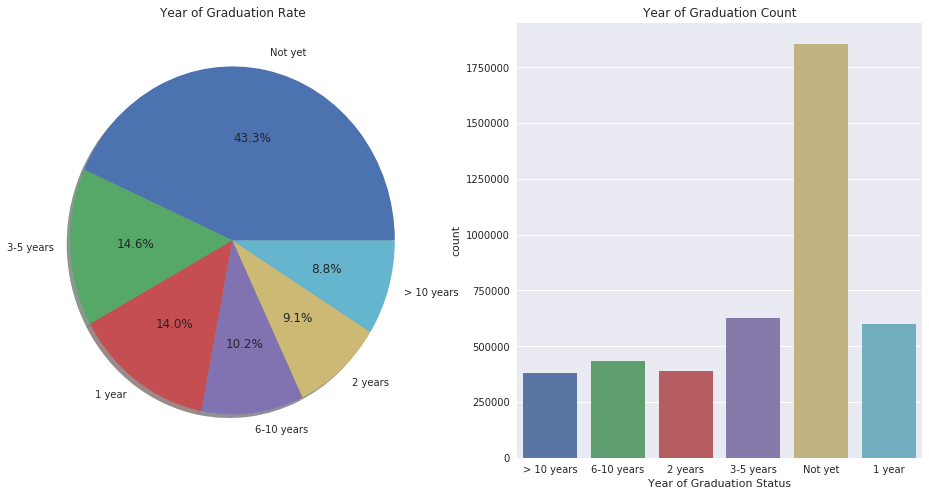

In [29]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['HSgrad'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Year of Graduation Rate')
ax[0].set_ylabel('')
sns.countplot('HSgrad',data=df_c,ax=ax[1])
#ax[1].set_xticklabels(['Not Declared:0','2016:1','2015:2','2014:3','2013:4','2012:5','2011:6',
#                      '2010:7','2009:8','2008:9','2007:10','< 2007:11'], rotation=40, ha="right")
ax[1].set_title('Year of Graduation Count')
ax[1].set_xlabel('Year of Graduation Status')

#### 2.1.7 Type of School

The type of school is coded as:

1 : Not declared

2 : Public School

3 : Private School

4 : Studied abroad

In [30]:
# Count the number of individual Type of High School (rate)
TS=pd.value_counts(df_c['TP_ESCOLA'],dropna=True,sort=False,normalize=True)
TS

1    0.683333
2    0.253014
3    0.062659
4    0.000995
Name: TP_ESCOLA, dtype: float64

Text(0.5,0,'Type of School')

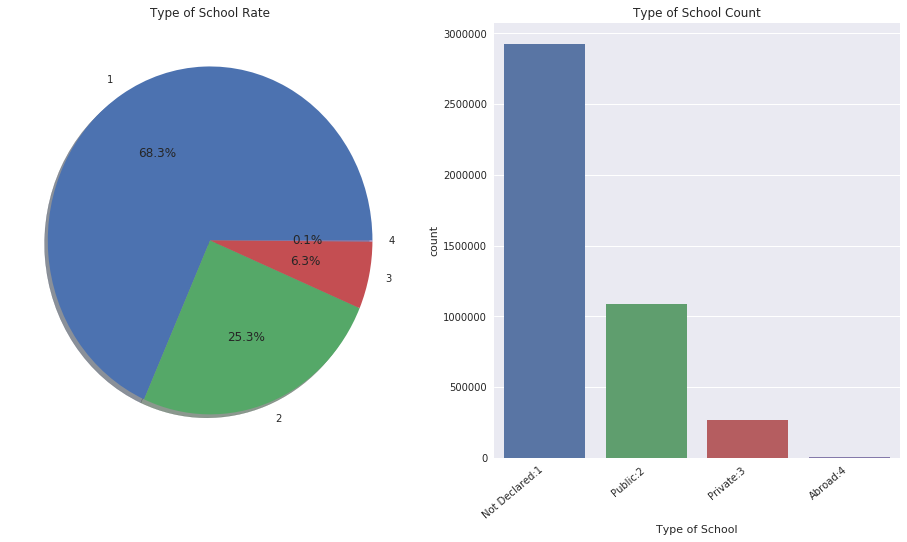

In [31]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['TP_ESCOLA'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type of School Rate')
ax[0].set_ylabel('')
sns.countplot('TP_ESCOLA',data=df_c,ax=ax[1])
ax[1].set_xticklabels(['Not Declared:1','Public:2','Private:3','Abroad:4'], rotation=40, ha="right")
ax[1].set_title('Type of School Count')
ax[1].set_xlabel('Type of School')

For some reason, most people chose not to declare the type of school they studied at. This is unfortunate, since having this data could help us better understand the problems with our public school system. 

#### 2.1.8 Father Education

The Brazilian school systems is divided nowadays into:

**Ensino Fundamental** which is composed by the old *primary school* (1st to 5th years) and part of the old *secondary school* (6th to 9th years).

**Ensino medio** which corresponds to 3 years of High School.

**Ensino Superior** which corresponds to undergraduate education.

The Father Education is coded as:

A : Illiterate

B : Studied up to the 4th year (ensino fundamental)

C : Studied up to the 8th year (ensino fundamental)

D : Finished up the 9th year, but do not have a high school diploma

E : High School Diploma

F : Bachelor's Degree

G : Graduate Degree

H : Not Declared


In [32]:
# Count the number of individual Father Education (rate)
FE=pd.value_counts(df_c['Q001'],dropna=True,sort=False,normalize=True)
FE

G    0.043416
C    0.146292
E    0.259356
B    0.212865
H    0.087482
A    0.052318
F    0.074398
D    0.123873
Name: Q001, dtype: float64

Text(0.5,0,'Father Education')

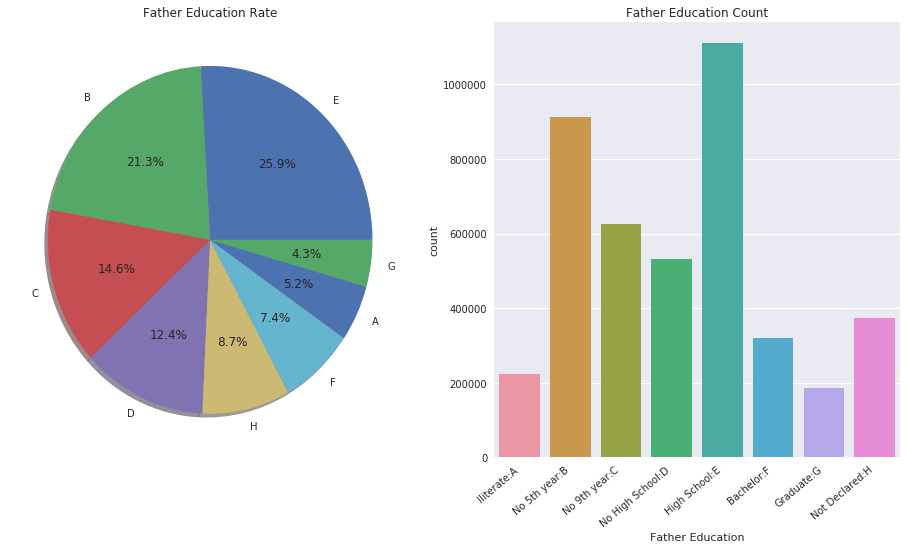

In [33]:
order = sorted(df_c.Q001.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Q001'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Father Education Rate')
ax[0].set_ylabel('')
sns.countplot('Q001',data=df_c,ax=ax[1],order=order)
ax[1].set_xticklabels(['Iliterate:A','No 5th year:B','No 9th year:C','No High School:D',
                      'High School:E','Bachelor:F','Graduate:G','Not Declared:H'], rotation=40, ha="right")
ax[1].set_title('Father Education Count')
ax[1].set_xlabel('Father Education')

A large fraction of fathers have not finished primary school (21.3%). This is very close to the fraction of fathers who finished high school (25.9%). Only 7.4% of fathers have a bachelor degree as their highest level of education and 4.3% have a graduate degree.

#### 2.1.9 Mother Education


The Mother Education is coded as follows:

A : Illiterate

B : Studied up to the 4th year (ensino fundamental)

C : Studied up to the 8th year (ensino fundamental)

D : Finished up the 9th year, but do not have a high school diploma

E : High School Diploma

F : Bachelor's Degree

G : Graduate Degree

H : Not Declared


In [34]:
# Count the number of individual Mother Education (rate)
ME=pd.value_counts(df_c['Q002'],dropna=True,sort=False,normalize=True)
ME

G    0.075381
C    0.139140
E    0.317100
B    0.162112
H    0.032730
A    0.036943
F    0.098843
D    0.137750
Name: Q002, dtype: float64

Text(0.5,0,'Mother Education')

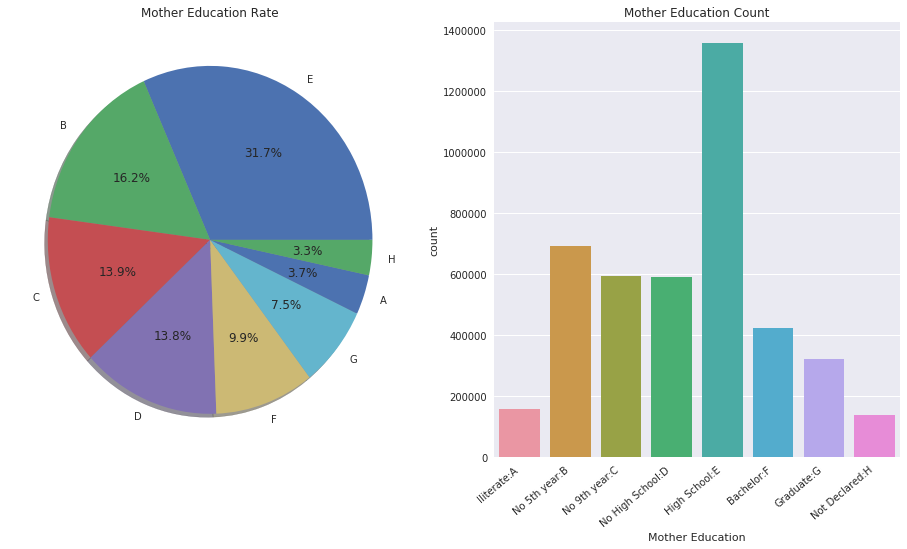

In [35]:
order = sorted(df_c.Q002.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Q002'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Mother Education Rate')
ax[0].set_ylabel('')
sns.countplot('Q002',data=df_c,ax=ax[1],order=order)
ax[1].set_xticklabels(['Iliterate:A','No 5th year:B','No 9th year:C','No High School:D',
                      'High School:E','Bachelor:F','Graduate:G','Not Declared:H'], rotation=40, ha="right")
ax[1].set_title('Mother Education Count')
ax[1].set_xlabel('Mother Education')

Interestingly, the fraction of mothers who did not finish primary school is smaller than the fraction found for the fathers. This reflects the social conditions in Brazil and the fact that many boys have to stop studying because they need to work. That is one of the reasons why social programs were implemented in the past 10 years in an attempt to avoid this situation. The **bolsa escola/bolsa familia** program pays a certain amount of money monthly to poor families, but requires that all children in the household go to school as a condition for this payment.  

#### 2.1.10 Number of People in the household

In [36]:
# Count the number of People in the household (rate)
pd.value_counts(df_c['Q005'],dropna=True,sort=False,normalize=True)

2.0     0.110401
3.0     0.244809
4.0     0.328624
5.0     0.174756
6.0     0.067065
7.0     0.027394
8.0     0.012475
9.0     0.005055
10.0    0.003178
11.0    0.001097
12.0    0.000783
13.0    0.000336
14.0    0.000184
15.0    0.000174
16.0    0.000090
17.0    0.000076
18.0    0.000086
19.0    0.000071
20.0    0.000192
1.0     0.023153
Name: Q005, dtype: float64

Text(0.5,0,'Number of People')

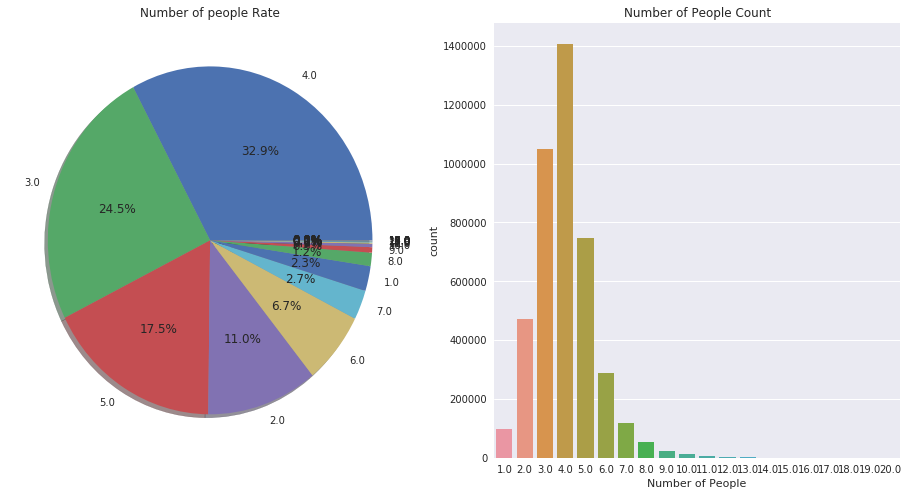

In [37]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Q005'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Number of people Rate')
ax[0].set_ylabel('')
sns.countplot('Q005',data=df_c,ax=ax[1])
#ax[1].set_xticklabels(['Not Declared:1','Public:2','Private:3','Foreign:4'], rotation=40, ha="right")
ax[1].set_title('Number of People Count')
ax[1].set_xlabel('Number of People')

Most exam takers belong to families of 4 people, followed by 3 and 5 people. 11% lives with only one of the parents, most likely the mother. 

In [38]:
# Create the feature Fsize:
df_c['Fsize']='Alone'
df_c.Fsize[(df_c.Q005 >= 2) & (df_c.Q005 <= 3)]='Small'
df_c.Fsize[(df_c.Q005 >= 4) & (df_c.Q005 <= 5)]='Medium'
df_c.Fsize[(df_c.Q005 >= 6)]='Large'

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/p

In [39]:
# Count by Family Size (rate)
pd.value_counts(df_c['Fsize'],dropna=True,sort=False,normalize=True)

Medium    0.503380
Alone     0.023153
Small     0.355210
Large     0.118257
Name: Fsize, dtype: float64

Text(0.5,0,'Family Size')

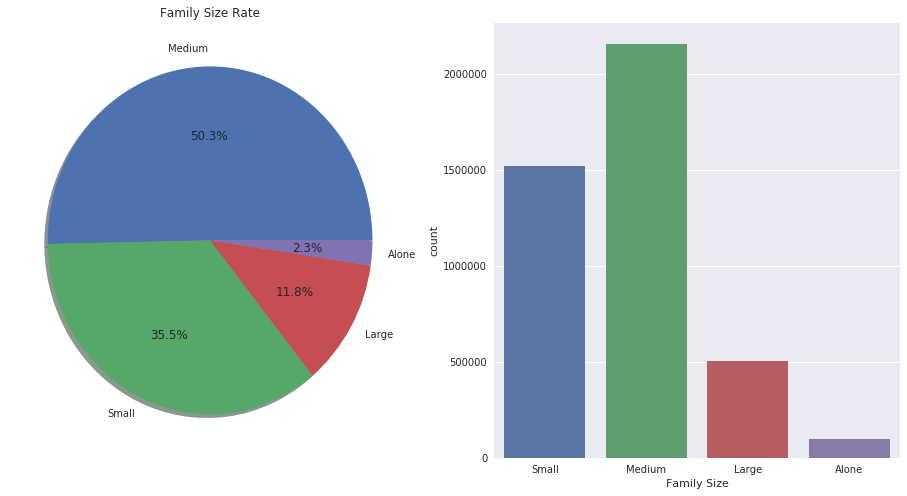

In [40]:
#order = sorted(df_c.Sclass.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Fsize'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Family Size Rate')
ax[0].set_ylabel('')
sns.countplot('Fsize',data=df_c,ax=ax[1])  
ax[1].set_xlabel('Family Size')

#### 2.1.11 Income

In Brazil, income is always reported as the monthly income and not annualy as done in North America. 

The income is coded as:

A : No Income.

B : Up to R$ 937,00 (minimum wage).

C : R$ 937,01- 1.405,50 (1-1.5 minimum wage).

D : R$ 1.405,51 - 1.874,00.

E : R$ 1.874,01 - 2.342,50.

F : R$ 2.342,51 - 2.811,00.

G : R$ 2.811,01 - 3.748,00.

H : R$ 3.748,01 - 4.685,00.

I : R$ 4.685,01 - 5.622,00.

J : R$ 5.622,01 - 6.559,00.

K : R$ 6.559,01 - 7.496,00.

L : R$ 7.496,01 - 8.433,00.

M : R$ 8.433,01 - 9.370,00.

N : R$ 9.370,01 - 11.244,00.

O : R$ 11.244,01 - 14.055,00.

P : R$ 14.055,01 - 18.740,00.

Q : More than R$ 18.740,00.

In [41]:
# Count the number of People in the household (rate)
pd.value_counts(df_c['Q006'],dropna=True,sort=False,normalize=True)

G    0.061108
Q    0.011016
P    0.007332
C    0.228699
J    0.019431
L    0.009720
E    0.081838
B    0.266521
K    0.012096
O    0.008528
H    0.042516
N    0.012057
I    0.031075
A    0.037784
F    0.053387
M    0.008295
D    0.108598
Name: Q006, dtype: float64

Text(0.5,0,'Income')

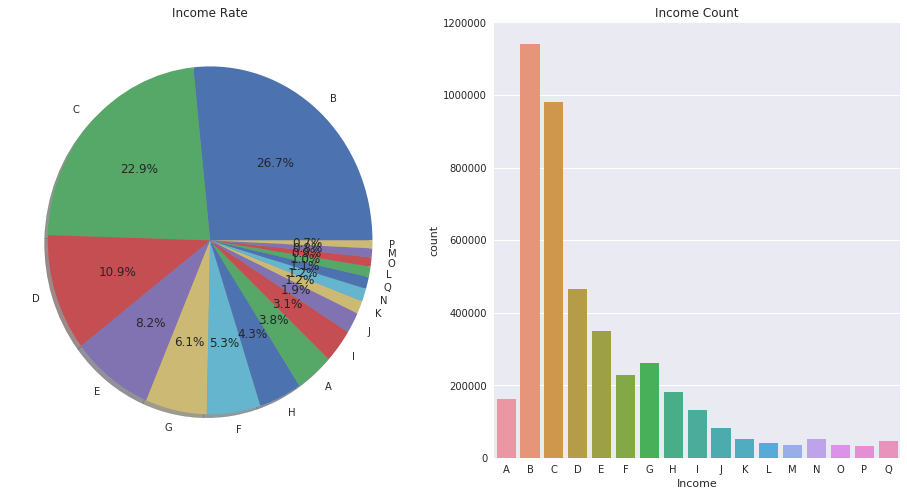

In [42]:
order = sorted(df_c.Q006.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Q006'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Rate')
ax[0].set_ylabel('')
sns.countplot('Q006',data=df_c,ax=ax[1],order=order)
#ax[1].set_xticklabels(['No education:A','No 5th year:B','No 9th year:C','No High School:D',
#                      'High School:E','Bachelor:F','MASTER/PhD:G','Not Declared:H'], rotation=40, ha="right")
ax[1].set_title('Income Count')
ax[1].set_xlabel('Income')

The income of around 50% of the exam takers is less than two times the current minimim wage in Brazil (R$ 937.00).  

The Brazilian Government Census Institute (IBGE) divides Social class based on the monthly income as follows:

| Class | Income |
|-------|--------|
| A | More than 20 times the mininum wage|
| B | Between 10 and 20 times the minimum wage|
| C | Between 4 and 10 times the minimum wage|
| D | Between 2 and 4 times the minimim wage|
| E | Up to 2 times the minimum wage|

In [43]:
# Create the feature Sclass:
df_c['Sclass']='E'
df_c.Sclass[(df_c.Q006 == 'E') | (df_c.Q006 == 'F') | (df_c.Q006 == 'G')]='D'
df_c.Sclass[(df_c.Q006 == 'H') | (df_c.Q006 == 'I') | (df_c.Q006 == 'J') |
           (df_c.Q006 == 'K') | (df_c.Q006 == 'L') | (df_c.Q006 == 'M')]='C'
df_c.Sclass[(df_c.Q006 == 'N') | (df_c.Q006 == 'O') | (df_c.Q006 == 'P')]='B'
df_c.Sclass[(df_c.Q006 == 'Q')]='A'

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/p

In [44]:
# Count by Social Class (rate)
SC=pd.value_counts(df_c['Sclass'],dropna=True,sort=False,normalize=True)
SC

C    0.123133
E    0.641602
B    0.027917
A    0.011016
D    0.196332
Name: Sclass, dtype: float64

Text(0.5,0,'Social class')

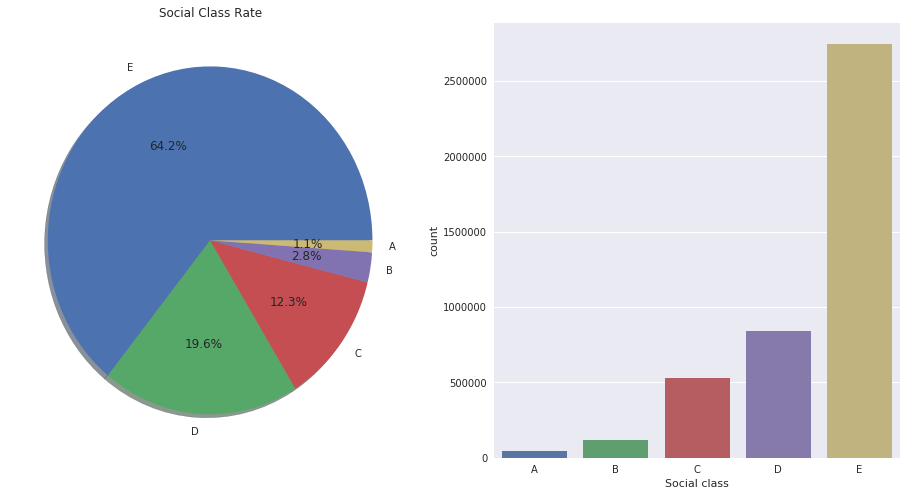

In [45]:
order = sorted(df_c.Sclass.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Sclass'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Social Class Rate')
ax[0].set_ylabel('')
sns.countplot('Sclass',data=df_c,ax=ax[1],order=order)  
ax[1].set_xlabel('Social class')

The large majority of people earns up to 2 times the minimum wage. 

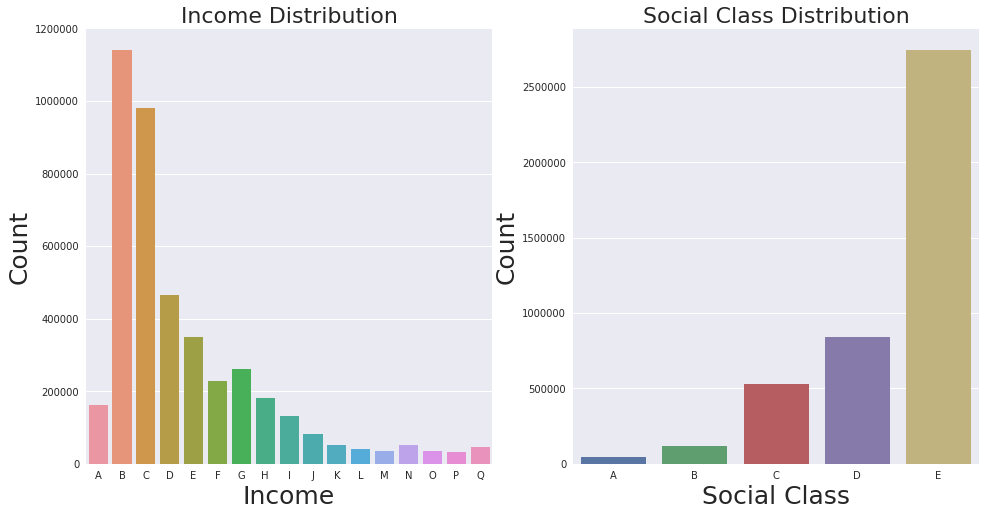

In [46]:
order = sorted(df_c.Sclass.unique())
order2 = sorted(df_c.Q006.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot('Q006',data=df_c,ax=ax[0],order=order2)
ax[0].set_title('Income Distribution',fontsize=22)
ax[0].set_xlabel('Income',fontsize=25)
ax[0].set_ylabel('Count',fontsize=25)
sns.countplot('Sclass',data=df_c,ax=ax[1],order=order)  
ax[1].set_title('Social Class Distribution',fontsize=22)
ax[1].set_xlabel('Social Class',fontsize=25)
ax[1].set_ylabel('Count',fontsize=25)
#savefig('count_socialclass.eps', fmt='eps', dpi=200)
plt.show()

#### 2.1.12 Access to the Internet

In [47]:
# Count the number of People in the household (rate)
pd.value_counts(df_c['Q025'],dropna=True,sort=False,normalize=True)

B    0.708652
A    0.291348
Name: Q025, dtype: float64

Text(0.5,0,'Home Internet Access')

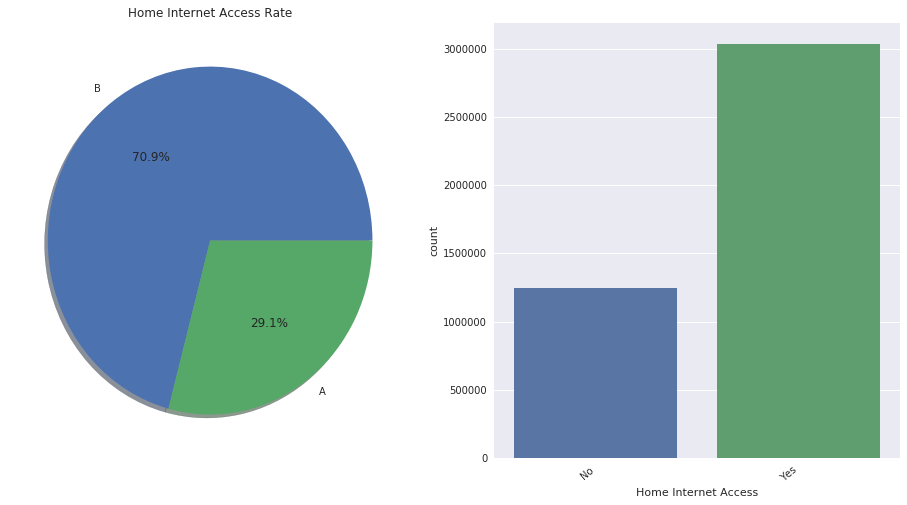

In [48]:
order = sorted(df_c.Q025.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Q025'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Home Internet Access Rate')
ax[0].set_ylabel('')
sns.countplot('Q025',data=df_c,ax=ax[1],order=order)  
ax[1].set_xticklabels(['No','Yes'], rotation=40, ha="right")
ax[1].set_xlabel('Home Internet Access')

Around 30% of the exam takers do not have access to Internet at home.

#### 2.1.13 States and Regions

In [49]:
# Count the number of exam taker per state (rate)
pd.value_counts(df_c['SG_UF_RESIDENCIA'],dropna=True,sort=False,normalize=True)

MS    0.012132
BA    0.070707
RN    0.024495
CE    0.057256
PR    0.042733
SC    0.019097
RS    0.043501
RR    0.002620
RO    0.011340
PI    0.023894
AC    0.007677
DF    0.018544
MA    0.044351
PE    0.056274
RJ    0.066074
GO    0.032397
PB    0.030398
ES    0.020740
SP    0.165232
MG    0.110011
MT    0.016858
AL    0.018834
SE    0.014151
AM    0.020101
PA    0.053306
AP    0.006951
TO    0.010326
Name: SG_UF_RESIDENCIA, dtype: float64

Text(0.5,0,'State')

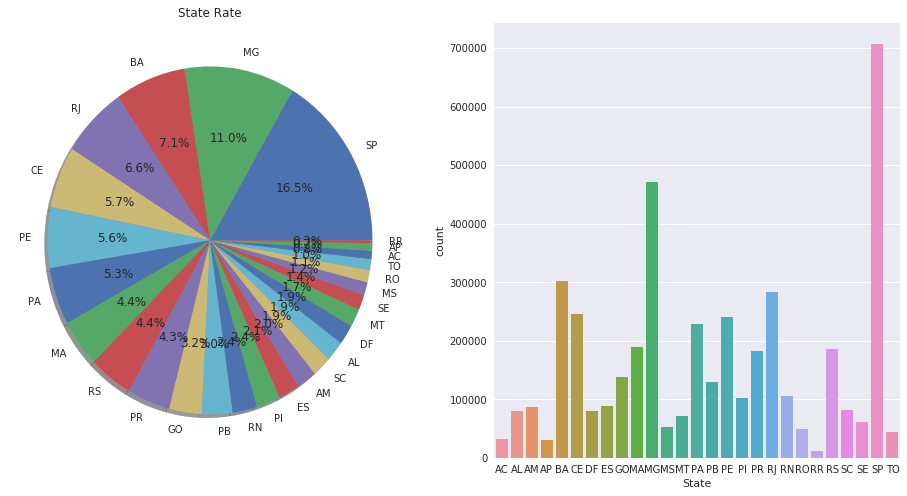

In [50]:
order = sorted(df_c.SG_UF_RESIDENCIA.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['SG_UF_RESIDENCIA'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('State Rate')
ax[0].set_ylabel('')
sns.countplot('SG_UF_RESIDENCIA',data=df_c,ax=ax[1],order=order)  
#ax[1].set_xticklabels(['No','Yes'], rotation=40, ha="right")
ax[1].set_xlabel('State')

Not surprisingly, most exam takers are from Sao Paulo which is the state with the largest population. 

Brazil is divided into 5 regions:

| Region | States |
|--------|--------|
|**North**| AC, AM, AP, PA, RR, RO,TO|
|**Northeast**| AL, BA, CE, MA, PI, PB, PE, RN, SE|
|**Center-West**| GO, MT, MS, DF|
|**Southeast**| ES, MG, SP, RJ|
|**South**| SC, PR, RS|


![title](estadosbrasileiros.jpg)

In [51]:
# Create the feature Region:
df_c['Region']='Northeast'
df_c.Region[(df_c.SG_UF_RESIDENCIA == 'AC') | (df_c.SG_UF_RESIDENCIA == 'AM') | (df_c.SG_UF_RESIDENCIA == 'AP')|
           (df_c.SG_UF_RESIDENCIA == 'PA') | (df_c.SG_UF_RESIDENCIA == 'RR') | (df_c.SG_UF_RESIDENCIA == 'RO')|
           (df_c.SG_UF_RESIDENCIA == 'TO')]='North'
df_c.Region[(df_c.SG_UF_RESIDENCIA == 'GO') | (df_c.SG_UF_RESIDENCIA == 'MT') | (df_c.SG_UF_RESIDENCIA == 'MS')|
           (df_c.SG_UF_RESIDENCIA == 'DF')]='Center-West'
df_c.Region[(df_c.SG_UF_RESIDENCIA == 'ES') | (df_c.SG_UF_RESIDENCIA == 'MG') | (df_c.SG_UF_RESIDENCIA == 'SP')|
           (df_c.SG_UF_RESIDENCIA == 'RJ')]='Southeast'
df_c.Region[(df_c.SG_UF_RESIDENCIA == 'SC') | (df_c.SG_UF_RESIDENCIA == 'PR') | (df_c.SG_UF_RESIDENCIA == 'RS')]='South'

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/monique/anaconda2/envs/p

In [52]:
# Count the number of exam taker per region (rate)
pd.value_counts(df_c['Region'],dropna=True,sort=False,normalize=True)

North          0.112321
Center-West    0.079932
Southeast      0.362057
South          0.105331
Northeast      0.340360
Name: Region, dtype: float64

Text(0.5,0,'Region')

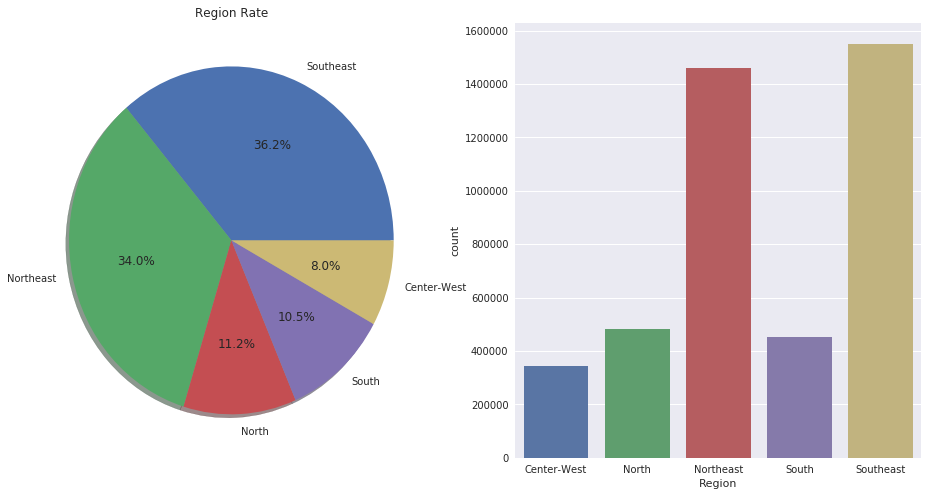

In [53]:
order = sorted(df_c.Region.unique())

f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['Region'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Region Rate')
ax[0].set_ylabel('')
sns.countplot('Region',data=df_c,ax=ax[1],order=order)  
ax[1].set_xlabel('Region')

# 3. Exploratory Analysis

Text(0.5,1,'Reading')

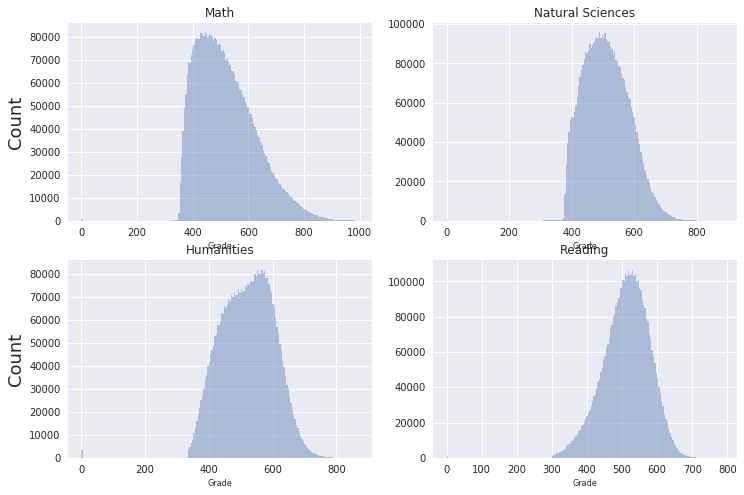

In [54]:
# We will plot the histogram using seaborn.
f,axes=plt.subplots(2,2,figsize=(12, 8))
sns.distplot(df_c.NU_NOTA_MT,bins=200, kde=False,ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_CN,bins=200, kde=False,ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CH,bins=200, kde=False,ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_LC,bins=200, kde=False,ax=axes[1,1])
axes[0,0].set_ylabel('Count',fontsize=18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[0,0].set_xlabel('Grade',fontsize=8)
axes[0,1].set_xlabel('Grade',fontsize=8)
axes[1,0].set_xlabel('Grade',fontsize=8)
axes[1,1].set_xlabel('Grade',fontsize=8)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')



The Figures above show the grade's distributions for four exams. The first thing we can notice is that the math and natural sciences exams are right skewed with most grades in the lower end. Humanities and Reading, on the other hand, are left skewed. In fact, the humanities distribution appears to be the sum of two distribution centered around 100 points apart.

In [55]:
# Skewness
sk_mt=stats.skew(df_c.NU_NOTA_MT, axis=0, bias=True)
sk_cn=stats.skew(df_c.NU_NOTA_CN, axis=0, bias=True)
sk_ch=stats.skew(df_c.NU_NOTA_CH, axis=0, bias=True)
sk_lc=stats.skew(df_c.NU_NOTA_LC, axis=0, bias=True)
sk_re=stats.skew(df_c.NU_NOTA_REDACAO, axis=0, bias=True)


print('Math:',sk_mt)
print('Natural Sciences:',sk_cn)
print('Humanities:',sk_ch)
print('Reading:',sk_lc)
print('Writing:',sk_re)

Math: 0.7075360290630602
Natural Sciences: 0.30894123089086434
Humanities: -0.17856152406730558
Reading: -0.43372610513361387
Writing: -1.042016951340604


In [56]:
print('Mean')
print('Math:',mean(df_c.NU_NOTA_MT))
print('Natural Sciences:',mean(df_c.NU_NOTA_CN))
print('Humanities:',mean(df_c.NU_NOTA_CH))
print('Reading:',mean(df_c.NU_NOTA_LC))
print('Writing:',mean(df_c.NU_NOTA_REDACAO))

Mean
Math: 518.9869384099464
Natural Sciences: 510.8267728044458
Humanities: 521.2855504730486
Reading: 512.0434547310268
Writing: 530.3383873943867


Text(0.5,1,'Writing')

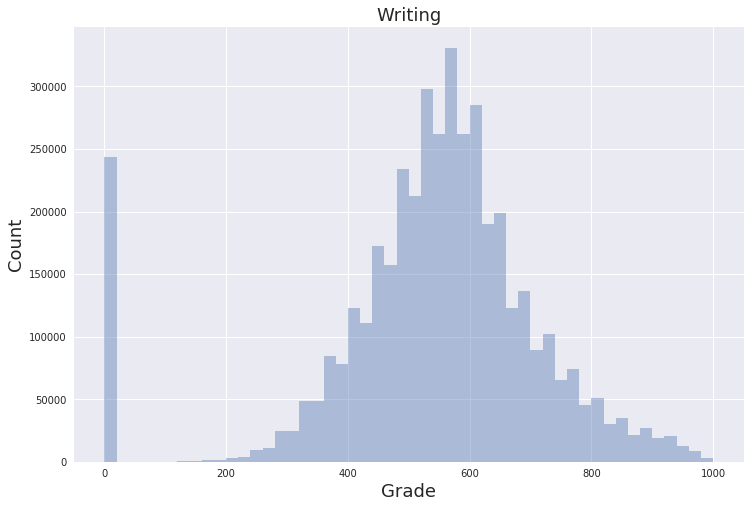

In [57]:
f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(df_c.NU_NOTA_REDACAO,bins=50, kde=False)
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)

Differently from the other exam, there is a larger fraction of people that got a score equal to zero in the writing exam. This is expected since the others exams were multiple choice exams . 

#### 3.1.1 Sex

In [58]:
medf_mt=mean(df_c.NU_NOTA_MT[df_c.TP_SEXO=='F'])
medm_mt=mean(df_c.NU_NOTA_MT[df_c.TP_SEXO=='M'])
medf_cn=mean(df_c.NU_NOTA_CN[df_c.TP_SEXO=='F'])
medm_cn=mean(df_c.NU_NOTA_CN[df_c.TP_SEXO=='M'])
medf_lc=mean(df_c.NU_NOTA_LC[df_c.TP_SEXO=='F'])
medm_lc=mean(df_c.NU_NOTA_LC[df_c.TP_SEXO=='M'])
medf_ch=mean(df_c.NU_NOTA_CH[df_c.TP_SEXO=='F'])
medm_ch=mean(df_c.NU_NOTA_CH[df_c.TP_SEXO=='M'])
# Using pivot tables to calculate the medina, mean,
# and standard deviation for each group
df_c.pivot_table(index='TP_SEXO',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})


NU_NOTA_CH                    NU_NOTA_CN                    \
               mean median        std        mean median        std   
TP_SEXO                                                               
F        513.814146  514.0  80.121780  503.499229  497.6  70.286369   
M        531.852945  538.4  83.664871  521.190695  518.9  73.509867   

        NU_NOTA_LC                    NU_NOTA_MT                     
              mean median        std        mean median         std  
TP_SEXO                                                              
F        511.16076  514.7  64.514088  502.707068  486.9   96.550682  
M        513.29192  518.8  66.993173  542.012840  530.4  112.082097

In [59]:
# Calculating the skewness 
skf_mt=stats.skew(df_c.NU_NOTA_MT[df_c.TP_SEXO=='F'], axis=0, bias=True)
skm_mt=stats.skew(df_c.NU_NOTA_MT[df_c.TP_SEXO=='M'], axis=0, bias=True)
skf_cn=stats.skew(df_c.NU_NOTA_CN[df_c.TP_SEXO=='F'], axis=0, bias=True)
skm_cn=stats.skew(df_c.NU_NOTA_CN[df_c.TP_SEXO=='M'], axis=0, bias=True)
skf_lc=stats.skew(df_c.NU_NOTA_LC[df_c.TP_SEXO=='F'], axis=0, bias=True)
skm_lc=stats.skew(df_c.NU_NOTA_LC[df_c.TP_SEXO=='M'], axis=0, bias=True)
skf_ch=stats.skew(df_c.NU_NOTA_CH[df_c.TP_SEXO=='F'], axis=0, bias=True)
skm_ch=stats.skew(df_c.NU_NOTA_CH[df_c.TP_SEXO=='M'], axis=0, bias=True)


print('Math - Skewness')
print('Female:',skf_mt,'Male:',skm_mt)
print('Natural Science - Skewness')
print('Female:',skf_cn,'Male:',skm_cn)
print('Reading - Skewness')
print('Female:',skf_lc,'Male:',skm_lc)
print('HUmanities - Skewness')
print('Female:',skf_ch,'Male:',skm_ch)



Math - Skewness
Female: 0.8118121226434157 Male: 0.5098693778693856
Natural Science - Skewness
Female: 0.38519429187775583 Male: 0.19185200313346537
Reading - Skewness
Female: -0.39305271848849777 Male: -0.4890297004880877
HUmanities - Skewness
Female: -0.10007846849409485 Male: -0.3153339265598896


The distribution of math grades has the largest skeweness among the exams. It is positively skewed and reflects the problems related to math education in Brazilian schools.

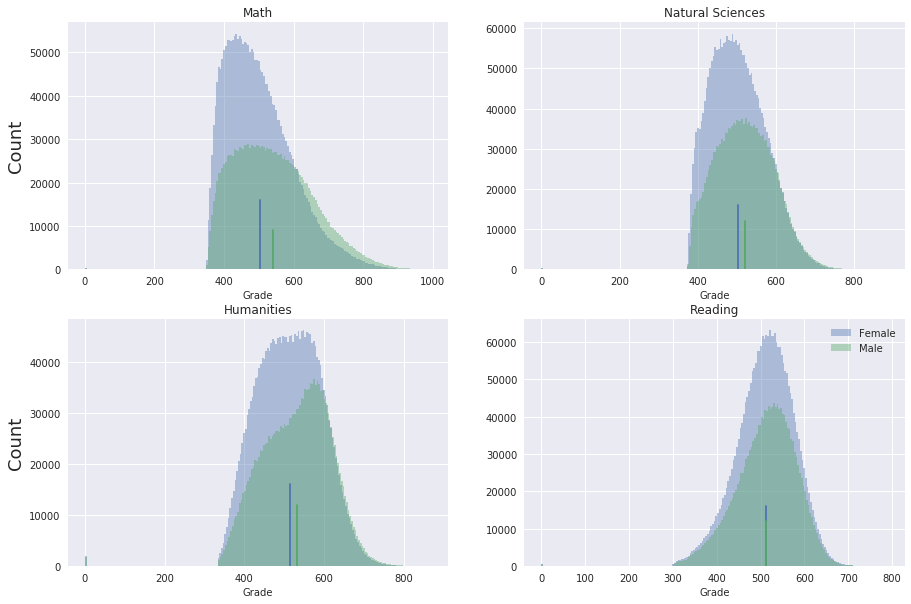

In [60]:
# We will plot the histogram using seaborn.
f,axes=plt.subplots(2,2,figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_SEXO=='F'],bins=200, kde=False,label='Female',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_SEXO=='M'],bins=200, kde=False,color='g',label='Male',ax=axes[0,0])
axes[0,0].plot([medf_mt,medf_mt],[0,16000],'b')
axes[0,0].plot([medm_mt,medm_mt],[0,9000],'g')
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_SEXO=='F'],bins=200, kde=False,label='Female',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_SEXO=='M'],bins=200, kde=False,color='g',label='Male',ax=axes[0,1])
axes[0,1].plot([medf_cn,medf_cn],[0,16000],'b')
axes[0,1].plot([medm_cn,medm_cn],[0,12000],'g')
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_SEXO=='F'],bins=200, kde=False,label='Female',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_SEXO=='M'],bins=200, kde=False,color='g',label='Male',ax=axes[1,0])
axes[1,0].plot([medf_ch,medf_ch],[0,16000],'b')
axes[1,0].plot([medm_ch,medm_ch],[0,12000],'g')
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_SEXO=='F'],bins=200, kde=False,label='Female',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_SEXO=='M'],bins=200, kde=False,color='g',label='Male',ax=axes[1,1])
axes[1,1].plot([medf_lc,medf_lc],[0,16000],'b')
axes[1,1].plot([medm_lc,medm_lc],[0,12000],'g')
axes[0,0].set_ylabel('Count',fontsize=18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[0,0].set_xlabel('Grade',fontsize=10)
axes[0,1].set_xlabel('Grade',fontsize=10)
axes[1,0].set_xlabel('Grade',fontsize=10)
axes[1,1].set_xlabel('Grade',fontsize=10)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')

plt.legend()

It can be seen in the Figures above that while male exam takers performed better in math and natural sciences than the female ones, the performance is more similar in the Humanities and reading tests.  

In [61]:
medf_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_SEXO=='F'])
medm_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_SEXO=='M'])
df_c.pivot_table(index='TP_SEXO',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                   mean median         std
TP_SEXO                                   
F            539.385463  560.0  181.532456
M            517.542397  540.0  180.795201

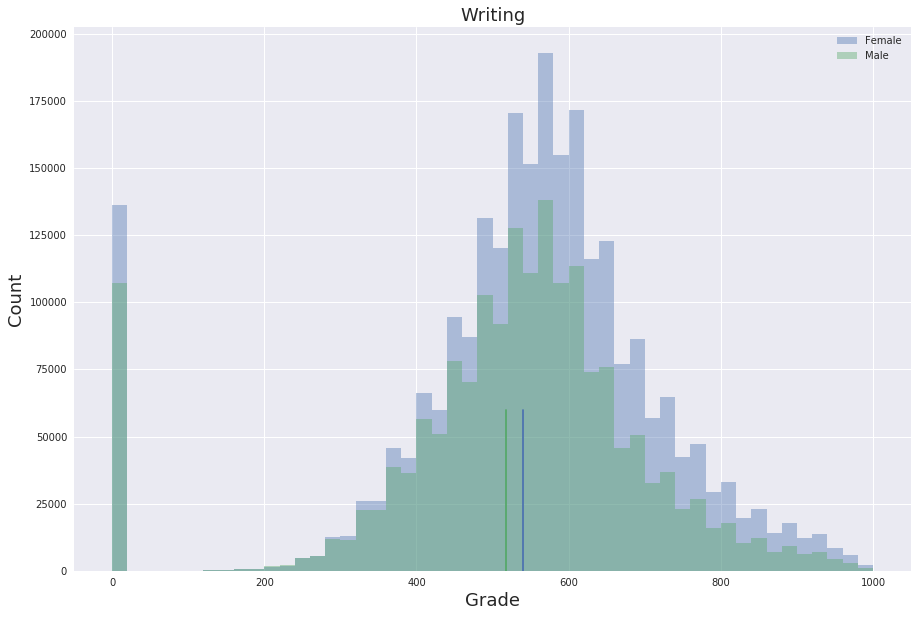

In [62]:
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_SEXO=='F'],bins=50, kde=False,label='Female')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_SEXO=='M'],bins=50, kde=False,color='g',label='Male')
plt.plot([medf_re,medf_re],[0,60000],'b')
plt.plot([medm_re,medm_re],[0,60000],'g')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

The Figure above shows the score for the writing exam. There are one group, separated from the main distribution, that have scores equal to zero. It is very likely that these takers committed some infraction that result in the annulment of their exams. Looking at the main distribution we seen that women performed better in the writing exam than men.  

#### 3.1.2 Race/Ethnicity

In [63]:
df_c.pivot_table(index='TP_COR_RACA',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    \
                   mean median        std        mean median        std   
TP_COR_RACA                                                               
0            539.437029  545.8  89.428752  525.842573  522.0  79.274981   
1            540.695142  548.3  82.541688  527.833811  526.1  75.636304   
2            509.309891  510.4  78.180062  498.424027  494.6  65.494718   
3            508.939271  508.4  79.390232  500.412209  495.4  67.920777   
4            519.182173  520.0  81.657042  511.228693  505.1  74.418612   
5            488.929665  485.3  75.937435  485.563597  479.6  62.676240   

             NU_NOTA_LC                     NU_NOTA_MT                     
                   mean  median        std        mean median         std  
TP_COR_RACA                                                                
0            525.183395  530.80  71.675099  537.194304  519.6  116.009760  
1            528.862379  534.30  64.470458  546.642617  534.6  113.154154  
2            502.125631  507.10  63.294820  495.135901  481.1   90.259734  
3            501.323781  505.40  63.913332  503.145842  487.6   96.338165  
4            510.740009  514.20  64.154111  521.916893  502.5  110.108595  
5            481.270279  485.15  64.707118  480.090853  464.2   84.790292

We can see from the table above that white people (TP_COR_RACA = 1) performs better, on average, in all exams. Asians perform better than black, mixed race, and indigenous people, but worst than whites. 

Since there is no reason for a particular race/ethnicity to be more intelligent than other, the behavior seen in the table above is related to the way the different race/ethnicities are socially and economically distributed in Brazil.   

In [64]:
 # Racial Composition of each Social Class:
class_comp = df_c.pivot_table(columns='TP_COR_RACA',
                                index='Sclass', aggfunc='size')

tot= df_c.pivot_table(index=['Sclass'],
                                aggfunc='size')

for i in range(0,len(tot)):
    class_comp.iloc[i,0:6]=class_comp.iloc[i,0:6]/tot.iloc[i]

class_comp

TP_COR_RACA         0         1         2         3         4         5
Sclass                                                                 
A            0.026427  0.781461  0.021172  0.145806  0.023863  0.001272
B            0.026191  0.703085  0.037363  0.208040  0.023866  0.001455
C            0.021989  0.582564  0.069573  0.301616  0.021966  0.002292
D            0.017950  0.458558  0.105857  0.393139  0.020855  0.003641
E            0.015294  0.276086  0.148504  0.528893  0.023861  0.007363

While the richest class, class A, is comprised mainly by white people (~81%), the poorest class, class E, is comprised mainly by mixed race people (~53%).

In [65]:
 # Class distribution for each race:
race_comp = df_c.pivot_table(columns='TP_COR_RACA',
                                index='Sclass', aggfunc='size')
tot= df_c.pivot_table(index=['TP_COR_RACA'],
                                aggfunc='size')

for i in range(0,len(tot)):
    race_comp.iloc[0:5,i]=race_comp.iloc[0:5,i]/tot.iloc[i]
race_comp


TP_COR_RACA         0         1         2         3         4         5
Sclass                                                                 
A            0.017058  0.023447  0.001852  0.003483  0.011410  0.002425
B            0.042842  0.053462  0.008284  0.012596  0.028921  0.007033
C            0.158649  0.195385  0.068040  0.080548  0.117406  0.048868
D            0.206498  0.245222  0.165068  0.167403  0.177731  0.123767
E            0.574954  0.482484  0.756755  0.735969  0.664532  0.817906

We can see from the table above that those race/ethnicity that performed better (Not Declared, white, and asian) in the exams have a smaller proportion of their population in the poorest class when compared to the others (black, mixed, and indigenous). While Not Declared, whites, and asians have more than 1% of their population in class A, blacks, mixed and natives have no more than 0.4% in this class. 

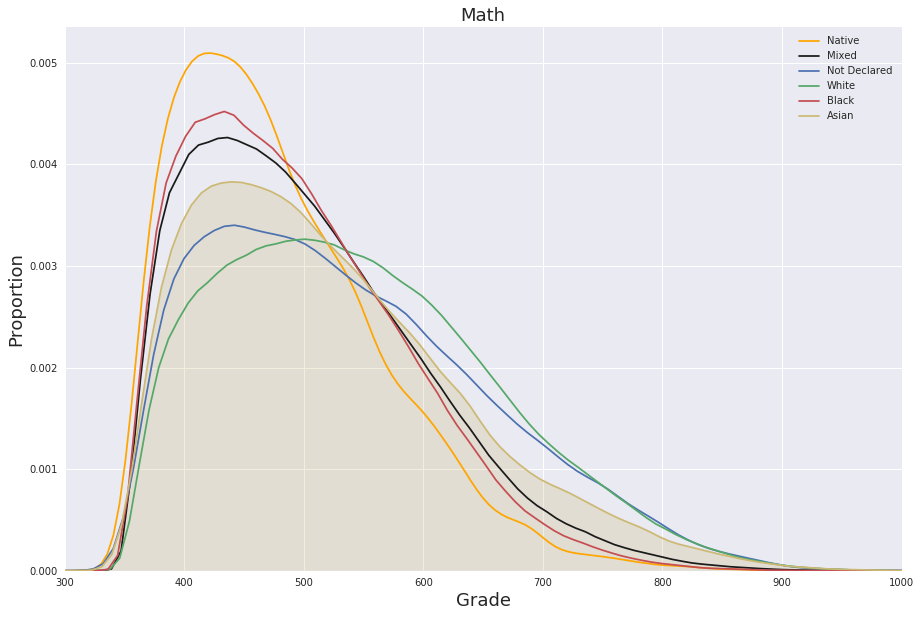

In [66]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))

sns.kdeplot(df_c.NU_NOTA_MT[df_c.TP_COR_RACA==5],color='orange',label='Native')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.TP_COR_RACA==3],color='k',label='Mixed')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.TP_COR_RACA==0],label='Not Declared')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.TP_COR_RACA==1],color='g',label='White')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.TP_COR_RACA==2],label='Black',color='r')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.TP_COR_RACA==4],label='Asian',color='y',shade=True)


ax.set_xlim(300,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Math',fontsize=18)
plt.legend()

The Figure above shows the grade distribution for the math exam for each race/ethnicity. As discussed before, Whites and asians performed better, on average. We can see in the Figure that, except for whites, they all have similar median values. Howver, the upper tail in the asian distribution drives its mean to larger values.

In [67]:
# Writing per Race/ethnicity
df_c.pivot_table(index='TP_COR_RACA',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                       mean median         std
TP_COR_RACA                                   
0                540.077149  560.0  188.343404
1                559.467814  560.0  174.922907
2                507.147153  540.0  179.952748
3                513.944184  540.0  183.664143
4                530.996220  540.0  178.987692
5                461.620049  500.0  194.945370

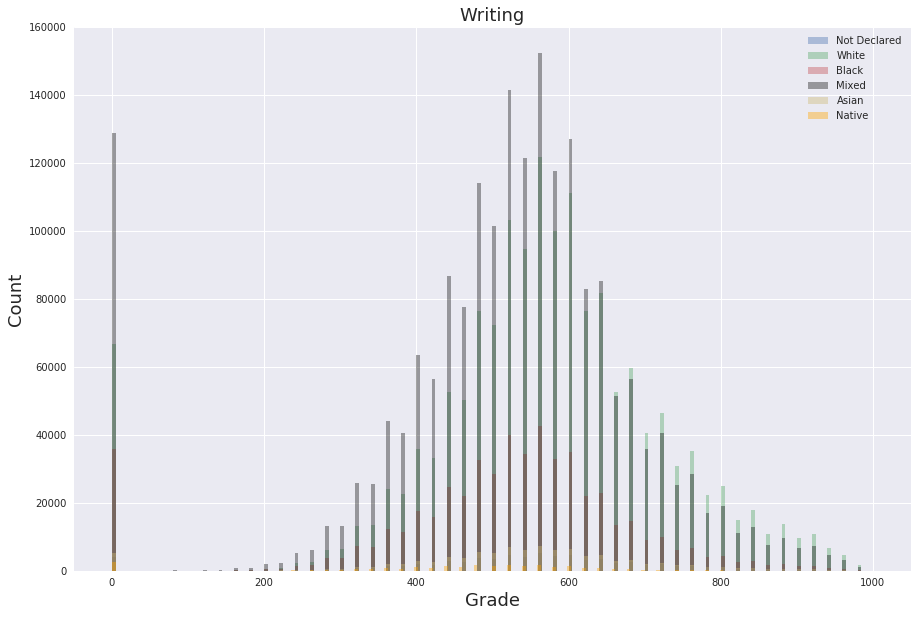

In [68]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==0],bins=200, kde=False,label='Not Declared')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==1],bins=200, kde=False,color='g',label='White')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==2],bins=200, kde=False,label='Black',color='r')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==3],bins=200, kde=False,color='k',label='Mixed')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==4],bins=200, kde=False,label='Asian',color='y')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==5],bins=200, kde=False,color='orange',label='Native')
#sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==1],color='g',label='White')
#sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==0],label='Not Declared')
#sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==5],color='orange',label='Native')
#sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==3],color='k',label='Mixed')
#sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==2],label='Black',color='r')
#sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.TP_COR_RACA==4],label='Asian',color='y',shade=True)
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

The same behavior among race/ethnicity is seen in the writing exam. 

#### 3.1.3 Age

In [69]:
medt_mt=mean(df_c.NU_NOTA_MT[df_c.Aclass=='teen'])
medy_mt=mean(df_c.NU_NOTA_MT[df_c.Aclass=='young adult'])
meda_mt=mean(df_c.NU_NOTA_MT[df_c.Aclass=='adult'])
medt_cn=mean(df_c.NU_NOTA_CN[df_c.Aclass=='teen'])
medy_cn=mean(df_c.NU_NOTA_CN[df_c.Aclass=='young adult'])
meda_cn=mean(df_c.NU_NOTA_CN[df_c.Aclass=='adult'])
medt_lc=mean(df_c.NU_NOTA_LC[df_c.Aclass=='teen'])
medy_lc=mean(df_c.NU_NOTA_LC[df_c.Aclass=='young adult'])
meda_lc=mean(df_c.NU_NOTA_LC[df_c.Aclass=='adult'])
medt_ch=mean(df_c.NU_NOTA_CH[df_c.Aclass=='teen'])
medy_ch=mean(df_c.NU_NOTA_CH[df_c.Aclass=='young adult'])
meda_ch=mean(df_c.NU_NOTA_CH[df_c.Aclass=='adult'])
df_c.pivot_table(index='Aclass',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    \
                   mean median        std        mean median        std   
Aclass                                                                    
adult        518.368984  521.1  82.384160  507.849395  505.5  66.878432   
teen         527.002477  531.7  81.503725  515.598139  511.8  73.292056   
young adult  515.944064  515.9  82.209348  506.612361  500.0  72.796770   

             NU_NOTA_LC                    NU_NOTA_MT                     
                   mean median        std        mean median         std  
Aclass                                                                    
adult        507.749327  512.8  66.242170  493.847218  475.8   95.235902  
teen         516.140598  520.5  64.904572  533.331100  519.9  107.492209  
young adult  509.203772  513.2  65.739051  513.577379  496.4  103.780610

In [70]:
medt_re=mean(df_c.NU_NOTA_REDACAO[df_c.Aclass=='teen'])
medy_re=mean(df_c.NU_NOTA_REDACAO[df_c.Aclass=='young adult'])
meda_re=mean(df_c.NU_NOTA_REDACAO[df_c.Aclass=='adult'])
df_c.pivot_table(index='Aclass',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                       mean median         std
Aclass                                        
adult            469.762285  520.0  191.357004
teen             559.263293  560.0  170.875714
young adult      523.861856  540.0  181.746763

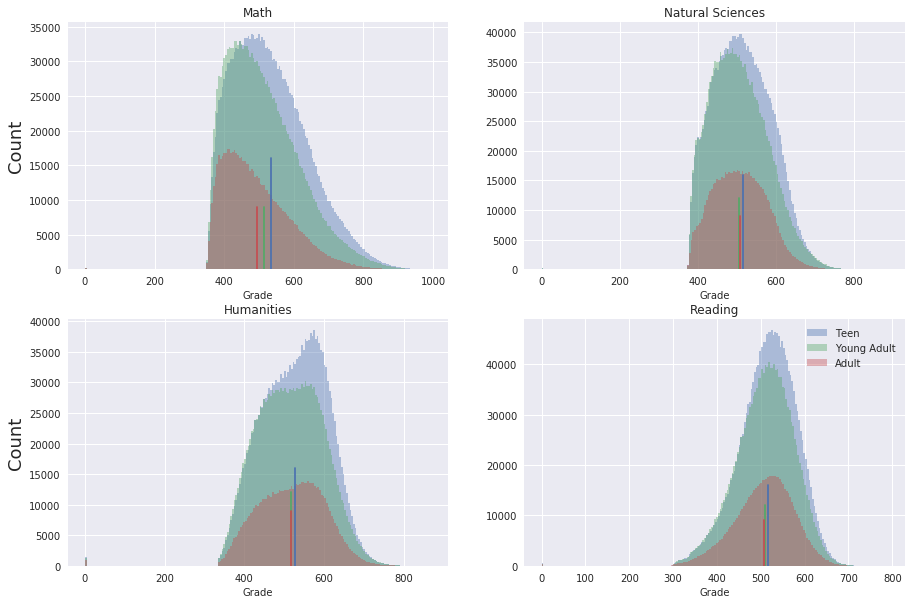

In [71]:
# We will plot the histogram using seaborn.
f,axes=plt.subplots(2,2,figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_MT[df_c.Aclass=='teen'],bins=200, kde=False,label='Teen',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.Aclass=='young adult'],bins=200, kde=False,color='g',label='Young Adult',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.Aclass=='adult'],bins=200, kde=False,color='r',label='Adult',ax=axes[0,0])
axes[0,0].plot([medt_mt,medt_mt],[0,16000],'b')
axes[0,0].plot([medy_mt,medy_mt],[0,9000],'g')
axes[0,0].plot([meda_mt,meda_mt],[0,9000],'r')
sns.distplot(df_c.NU_NOTA_CN[df_c.Aclass=='teen'],bins=200, kde=False,label='Teen',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.Aclass=='young adult'],bins=200, kde=False,color='g',label='Young Adult',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.Aclass=='adult'],bins=200, kde=False,color='r',label='Adult',ax=axes[0,1])
axes[0,1].plot([medt_cn,medt_cn],[0,16000],'b')
axes[0,1].plot([medy_cn,medy_cn],[0,12000],'g')
axes[0,1].plot([meda_cn,meda_cn],[0,9000],'r')
sns.distplot(df_c.NU_NOTA_CH[df_c.Aclass=='teen'],bins=200, kde=False,label='Teen',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.Aclass=='young adult'],bins=200, kde=False,color='g',label='Young Adult',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.Aclass=='adult'],bins=200, kde=False,color='r',label='Adult',ax=axes[1,0])
axes[1,0].plot([medt_ch,medt_ch],[0,16000],'b')
axes[1,0].plot([medy_ch,medy_ch],[0,12000],'g')
axes[1,0].plot([meda_ch,meda_ch],[0,9000],'r')
sns.distplot(df_c.NU_NOTA_LC[df_c.Aclass=='teen'],bins=200, kde=False,label='Teen',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.Aclass=='young adult'],bins=200, kde=False,color='g',label='Young Adult',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.Aclass=='adult'],bins=200, kde=False,color='r',label='Adult',ax=axes[1,1])
axes[1,1].plot([medt_lc,medt_lc],[0,16000],'b')
axes[1,1].plot([medy_lc,medy_lc],[0,12000],'g')
axes[1,1].plot([meda_lc,meda_lc],[0,9000],'r')

axes[0,0].set_ylabel('Count',fontsize=18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[0,0].set_xlabel('Grade',fontsize=10)
axes[0,1].set_xlabel('Grade',fontsize=10)
axes[1,0].set_xlabel('Grade',fontsize=10)
axes[1,1].set_xlabel('Grade',fontsize=10)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')

plt.legend()

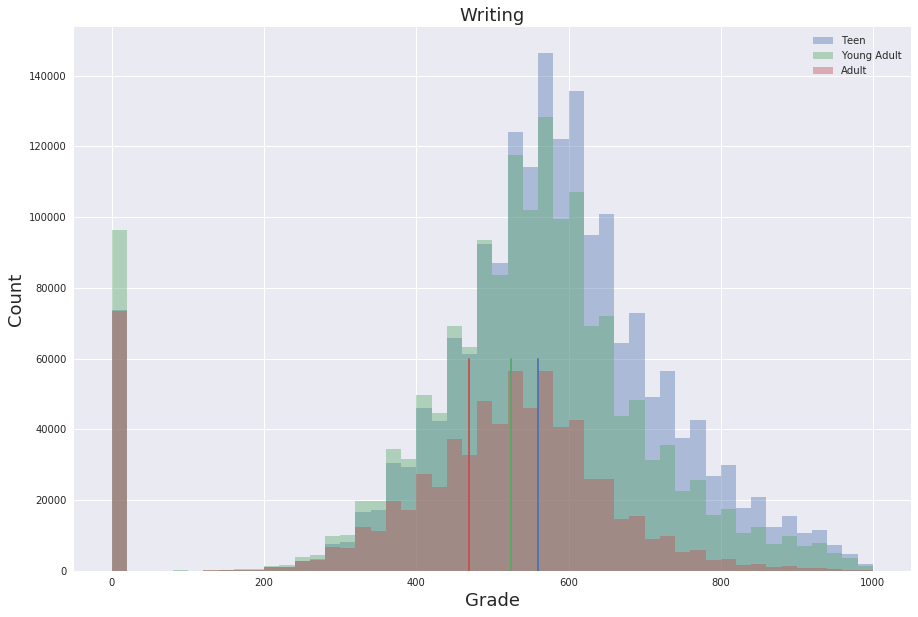

In [72]:
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.Aclass=='teen'],bins=50, kde=False,label='Teen')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.Aclass=='young adult'],bins=50, kde=False,color='g',label='Young Adult')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.Aclass=='adult'],bins=50, kde=False,color='r',label='Adult')
plt.plot([medt_re,medt_re],[0,60000],'b')
plt.plot([medy_re,medy_re],[0,60000],'g')
plt.plot([meda_re,meda_re],[0,60000],'r')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

The Figures above shows the score distribution for the different exam per age class. It is clear that takers with ages smaller than 18 performed better than older takers. The largest differences, however, are found for the writing exam. This behavior is expected, since the teenagers are finishing high school in the current year or have finished high school in recent years. 

Text(0.5,1,'Reading')

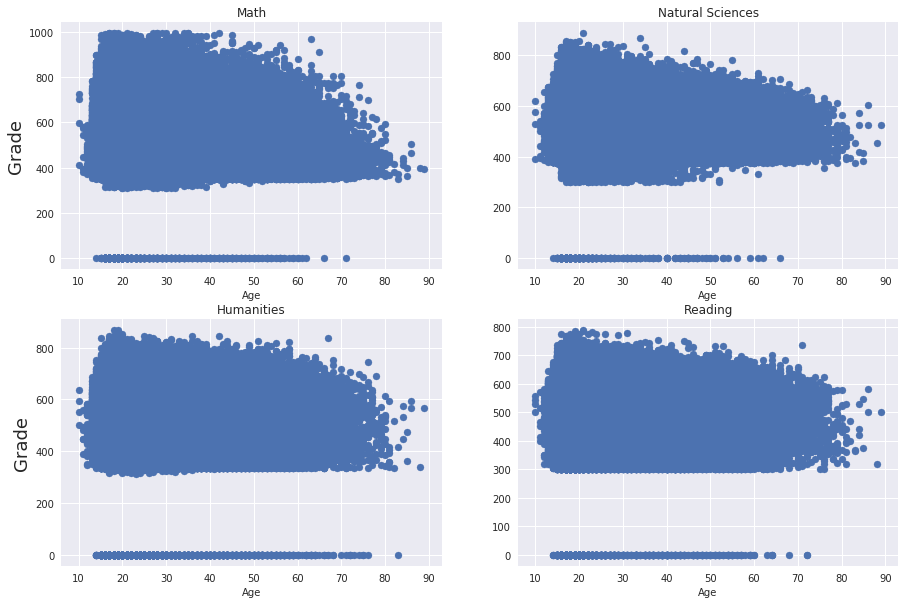

In [73]:
# 
f,axes=plt.subplots(2,2,figsize=(15, 10))
axes[0,0].scatter(x=df_c.NU_IDADE, y=df_c.NU_NOTA_MT)
axes[0,1].scatter(x=df_c.NU_IDADE, y=df_c.NU_NOTA_CN)
axes[1,0].scatter(x=df_c.NU_IDADE, y=df_c.NU_NOTA_CH)
axes[1,1].scatter(x=df_c.NU_IDADE, y=df_c.NU_NOTA_LC)
axes[0,0].set_ylabel('Grade',fontsize=18)
axes[1,0].set_ylabel('Grade',fontsize=18)
axes[0,0].set_xlabel('Age',fontsize=10)
axes[0,1].set_xlabel('Age',fontsize=10)
axes[1,0].set_xlabel('Age',fontsize=10)
axes[1,1].set_xlabel('Age',fontsize=10)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')

#### 3.1.4 High School Status

In [74]:
med1_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==1])
med2_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==2])
med3_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==3])
med4_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==4])
med1_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==1])
med2_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==2])
med3_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==3])
med4_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==4])
med1_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==1])
med2_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==2])
med3_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==3])
med4_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==4])
med1_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==1])
med2_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==2])
med3_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==3])
med4_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==4])

df_c.pivot_table(index='TP_ST_CONCLUSAO',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    \
                       mean median        std        mean median        std   
TP_ST_CONCLUSAO                                                               
1                524.143326  527.0  82.264902  512.697392  508.0  72.646290   
2                516.116839  516.8  82.066939  506.215173  500.4  71.756439   
3                522.961013  529.1  80.671743  515.668282  514.7  70.639986   
4                495.677722  495.6  74.959261  490.492542  487.4  59.893312   

                 NU_NOTA_LC                    NU_NOTA_MT                     
                       mean median        std        mean median         std  
TP_ST_CONCLUSAO                                                               
1                515.553255  519.8  64.228623  517.091429  500.5  104.919033  
2                505.730821  509.6  66.656568  518.394232  502.0  105.099564  
3                513.258352  519.5  67.628275  532.414613  521.2  105.448862  
4                493.089610  499.3  65.168699  485.835232  471.1   87.005892

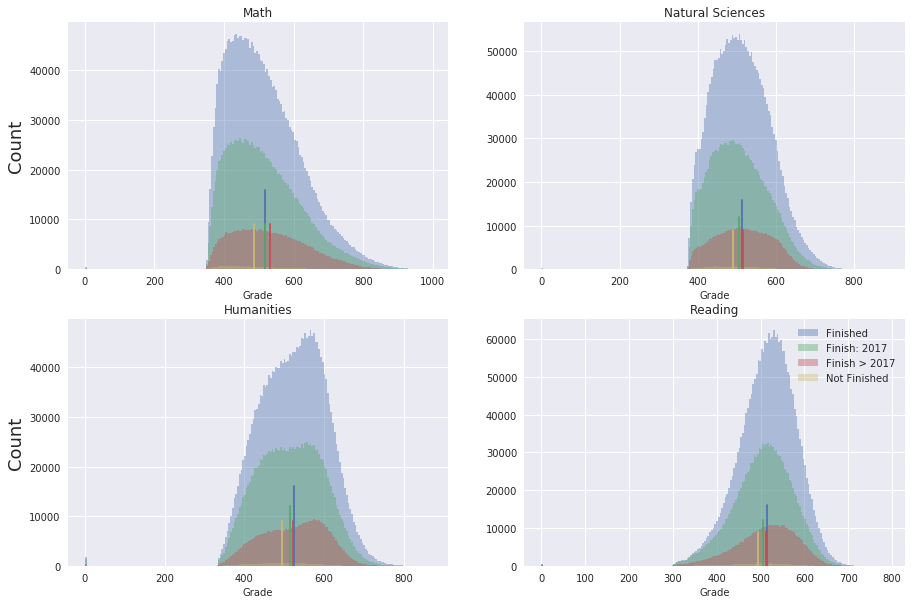

In [75]:
# We will plot the histogram using seaborn.
f,axes=plt.subplots(2,2,figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==1],bins=200, kde=False,label='Finished',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==2],bins=200, kde=False,color='g',label='Finish: 2017',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==3],bins=200, kde=False,color='r',label='Finish > 2017',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ST_CONCLUSAO==4],bins=200, kde=False,color='y',label='Not Finished',ax=axes[0,0])

axes[0,0].plot([med1_mt,med1_mt],[0,16000],'b')
axes[0,0].plot([med2_mt,med2_mt],[0,9000],'g')
axes[0,0].plot([med3_mt,med3_mt],[0,9000],'r')
axes[0,0].plot([med4_mt,med4_mt],[0,9000],'y')
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==1],bins=200, kde=False,label='Finished',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==2],bins=200, kde=False,color='g',label='Finish: 2017',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==3],bins=200, kde=False,color='r',label='Finish > 2017',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ST_CONCLUSAO==4],bins=200, kde=False,color='y',label='Not Finished',ax=axes[0,1])

axes[0,1].plot([med1_cn,med1_cn],[0,16000],'b')
axes[0,1].plot([med2_cn,med2_cn],[0,12000],'g')
axes[0,1].plot([med3_cn,med3_cn],[0,9000],'r')
axes[0,1].plot([med4_cn,med4_cn],[0,9000],'y')
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==1],bins=200, kde=False,label='Finished',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==2],bins=200, kde=False,color='g',label='Finish: 2017',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==3],bins=200, kde=False,color='r',label='Finish > 2017',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ST_CONCLUSAO==4],bins=200, kde=False,color='y',label='Not Finished',ax=axes[1,0])

axes[1,0].plot([med1_ch,med1_ch],[0,16000],'b')
axes[1,0].plot([med2_ch,med2_ch],[0,12000],'g')
axes[1,0].plot([med3_ch,med3_ch],[0,9000],'r')
axes[1,0].plot([med4_ch,med4_ch],[0,9000],'y')
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==1],bins=200, kde=False,label='Finished',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==2],bins=200, kde=False,color='g',label='Finish: 2017',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==3],bins=200, kde=False,color='r',label='Finish > 2017',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ST_CONCLUSAO==4],bins=200, kde=False,color='y',label='Not Finished',ax=axes[1,1])

axes[1,1].plot([med1_lc,med1_lc],[0,16000],'b')
axes[1,1].plot([med2_lc,med2_lc],[0,12000],'g')
axes[1,1].plot([med3_lc,med3_lc],[0,9000],'r')
axes[1,1].plot([med4_lc,med4_lc],[0,9000],'y')

axes[0,0].set_ylabel('Count',fontsize=18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[0,0].set_xlabel('Grade',fontsize=10)
axes[0,1].set_xlabel('Grade',fontsize=10)
axes[1,0].set_xlabel('Grade',fontsize=10)
axes[1,1].set_xlabel('Grade',fontsize=10)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')

plt.legend()

In [76]:
med1_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==1])
med2_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==2])
med3_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==3])
med4_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==4])
df_c.pivot_table(index='TP_ST_CONCLUSAO',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                           mean median         std
TP_ST_CONCLUSAO                                   
1                    527.880406  540.0  182.497607
2                    534.282424  560.0  182.073304
3                    536.874976  560.0  172.936513
4                    442.173120  480.0  187.922780

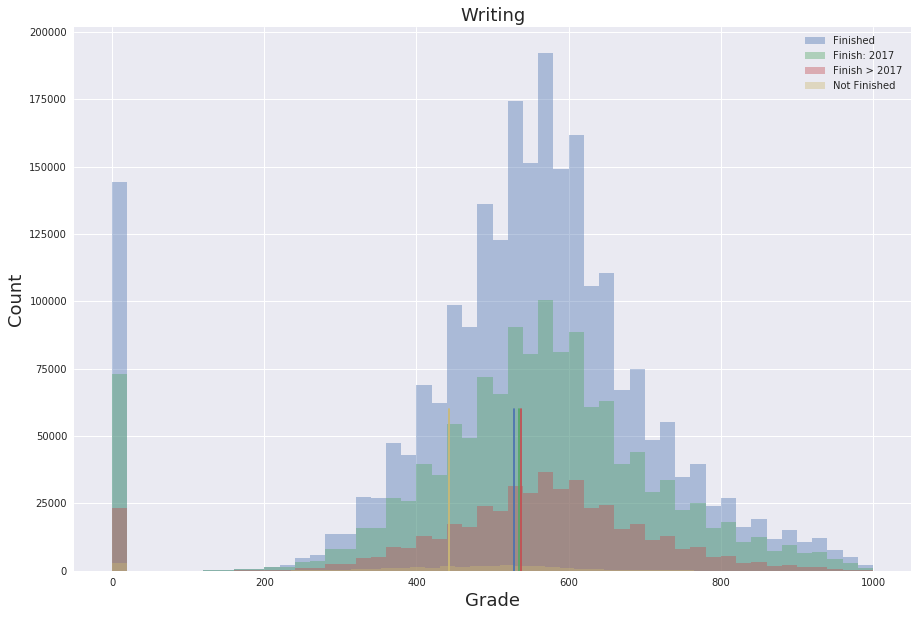

In [77]:
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==1],bins=50, kde=False,label='Finished')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==2],bins=50, kde=False,color='g',label='Finish: 2017')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==3],bins=50, kde=False,color='r',label='Finish > 2017')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ST_CONCLUSAO==4],bins=50, kde=False,color='y',label='Not Finished')
plt.plot([med1_re,med1_re],[0,60000],'b')
plt.plot([med2_re,med2_re],[0,60000],'g')
plt.plot([med3_re,med3_re],[0,60000],'r')
plt.plot([med4_re,med4_re],[0,60000],'y')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

The difference between the scores for people who finished, are finishing or are 1st and 2nd year students in high school is not very large. People who did not finish high school, on the other hand, have usually smaller grades. 

#### 3.1.5 Year of graduation

In [78]:
df_c.pivot_table(index='HSgrad',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    \
                  mean median        std        mean median        std   
HSgrad                                                                   
1 year      524.700664  527.1  83.319916  514.135177  508.0  75.439526   
2 years     521.866672  522.7  82.953460  511.863101  504.8  75.301399   
3-5 years   521.317817  523.1  81.351231  510.466382  504.8  73.193828   
6-10 years  523.628619  527.6  80.927991  511.441094  508.5  69.630904   
> 10 years  530.866847  536.6  82.514132  516.418447  515.9  67.482920   
Not yet     517.547888  519.5  81.710556  508.380205  503.7  71.461848   

            NU_NOTA_LC                    NU_NOTA_MT                     
                  mean median        std        mean median         std  
HSgrad                                                                   
1 year      515.024115  519.0  64.621934  526.378338  509.9  108.774240  
2 years     514.020188  517.5  64.227051  521.246010  503.7  107.899921  
3-5 years   515.086949  519.0  63.651864  518.321473  502.2  104.745335  
6-10 years  516.461221  521.1  64.294181  511.452083  495.8  100.853303  
> 10 years  517.690078  523.0  64.414447  502.598006  485.4   98.357851  
Not yet     507.453013  511.8  66.986065  521.466061  506.1  105.207899

In [79]:
df_c.pivot_table(index='HSgrad',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                      mean median         std
HSgrad                                       
1 year          556.965543  560.0  180.426116
2 years         544.499306  560.0  181.187320
3-5 years       528.848990  540.0  178.780620
6-10 years      507.910585  540.0  179.709109
> 10 years      486.219104  520.0  185.879488
Not yet         533.553163  560.0  180.244572

There is not much difference in the average scores among different years of graduation. The largest difference is observed for the writing exam (~ 15%).

#### 3.1.6 Type of School

In [80]:
med1_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==1])
med2_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==2])
med3_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==3])
med4_mt=mean(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==4])
med1_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==1])
med2_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==2])
med3_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==3])
med4_cn=mean(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==4])
med1_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==1])
med2_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==2])
med3_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==3])
med4_lc=mean(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==4])
med1_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==1])
med2_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==2])
med3_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==3])
med4_ch=mean(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==4])
df_c.pivot_table(index='TP_ESCOLA',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                     NU_NOTA_CN                    \
                 mean  median        std        mean median        std   
TP_ESCOLA                                                                
1          523.680899  527.00  81.990604  512.963835  508.9  72.256951   
2          500.567162  500.00  75.538518  491.440727  487.3  62.843131   
3          577.418161  590.50  77.749804  564.486463  572.8  74.782921   
4          609.764219  618.75  70.201870  593.620343  602.6  72.980240   

           NU_NOTA_LC                    NU_NOTA_MT                     
                 mean median        std        mean median         std  
TP_ESCOLA                                                               
1          514.968829  519.5  64.838442  519.261647  503.4  105.050142  
2          493.651720  498.5  62.899193  497.432324  484.5   89.758461  
3          553.354735  560.2  59.086466  600.950545  598.8  119.142538  
4          578.232755  585.8  54.694688  649.826115  654.8  121.267504

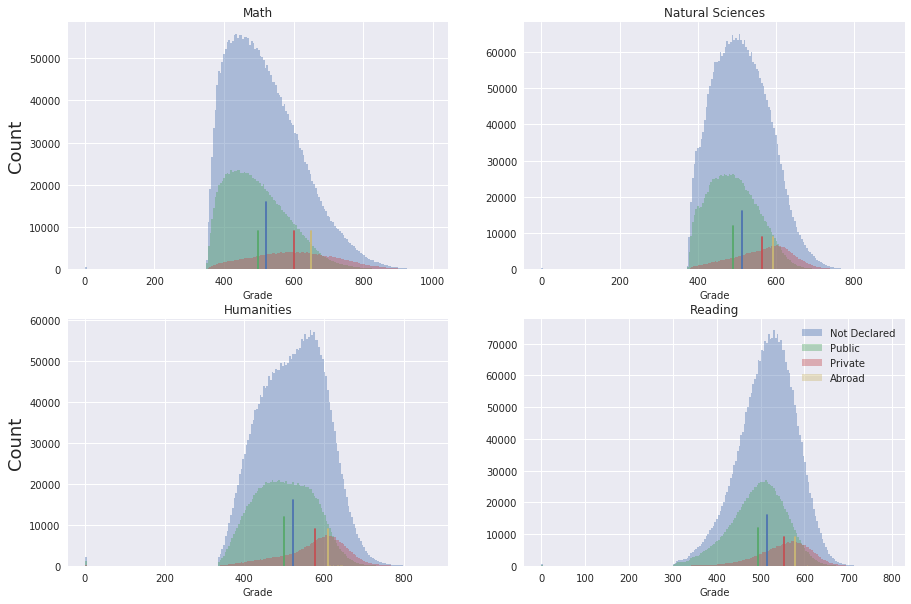

In [81]:
# We will plot the histogram using seaborn.
f,axes=plt.subplots(2,2,figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==1],bins=200, kde=False,label='Not Declared',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==2],bins=200, kde=False,color='g',label='Public',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==3],bins=200, kde=False,color='r',label='Private',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.TP_ESCOLA==4],bins=200, kde=False,color='y',label='Abroad',ax=axes[0,0])

axes[0,0].plot([med1_mt,med1_mt],[0,16000],'b')
axes[0,0].plot([med2_mt,med2_mt],[0,9000],'g')
axes[0,0].plot([med3_mt,med3_mt],[0,9000],'r')
axes[0,0].plot([med4_mt,med4_mt],[0,9000],'y')
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==1],bins=200, kde=False,label='Not Declared',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==2],bins=200, kde=False,color='g',label='Public',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==3],bins=200, kde=False,color='r',label='Private',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.TP_ESCOLA==4],bins=200, kde=False,color='y',label='Abroad',ax=axes[0,1])

axes[0,1].plot([med1_cn,med1_cn],[0,16000],'b')
axes[0,1].plot([med2_cn,med2_cn],[0,12000],'g')
axes[0,1].plot([med3_cn,med3_cn],[0,9000],'r')
axes[0,1].plot([med4_cn,med4_cn],[0,9000],'y')
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==1],bins=200, kde=False,label='Not Declared',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==2],bins=200, kde=False,color='g',label='Public',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==3],bins=200, kde=False,color='r',label='Private',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.TP_ESCOLA==4],bins=200, kde=False,color='y',label='Abroad',ax=axes[1,0])

axes[1,0].plot([med1_ch,med1_ch],[0,16000],'b')
axes[1,0].plot([med2_ch,med2_ch],[0,12000],'g')
axes[1,0].plot([med3_ch,med3_ch],[0,9000],'r')
axes[1,0].plot([med4_ch,med4_ch],[0,9000],'y')
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==1],bins=200, kde=False,label='Not Declared',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==2],bins=200, kde=False,color='g',label='Public',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==3],bins=200, kde=False,color='r',label='Private',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.TP_ESCOLA==4],bins=200, kde=False,color='y',label='Abroad',ax=axes[1,1])

axes[1,1].plot([med1_lc,med1_lc],[0,16000],'b')
axes[1,1].plot([med2_lc,med2_lc],[0,12000],'g')
axes[1,1].plot([med3_lc,med3_lc],[0,9000],'r')
axes[1,1].plot([med4_lc,med4_lc],[0,9000],'y')

axes[0,0].set_ylabel('Count',fontsize=18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[0,0].set_xlabel('Grade',fontsize=10)
axes[0,1].set_xlabel('Grade',fontsize=10)
axes[1,0].set_xlabel('Grade',fontsize=10)
axes[1,1].set_xlabel('Grade',fontsize=10)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')

plt.legend()

Even though only 30% of the takers declared which type of school they studied at, we can see large difference in the performance between students from private and public schools. People who studied abroad have an even better performance. 

In [82]:
med1_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==1])
med2_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==2])
med3_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==3])
med4_re=mean(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==4])
df_c.pivot_table(index='TP_ESCOLA',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                     mean median         std
TP_ESCOLA                                   
1              528.510593  540.0  181.272709
2              504.854982  520.0  176.522014
3              650.488635  640.0  154.700557
4              699.399343  700.0  148.522934

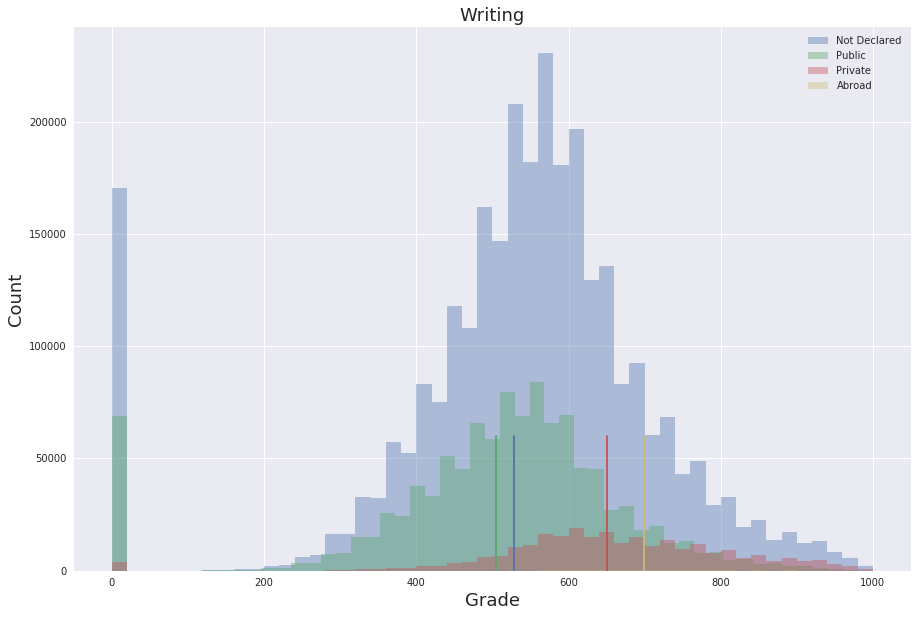

In [83]:
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==1],bins=50, kde=False,label='Not Declared')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==2],bins=50, kde=False,color='g',label='Public')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==3],bins=50, kde=False,color='r',label='Private')
sns.distplot(df_c.NU_NOTA_REDACAO[df_c.TP_ESCOLA==4],bins=50, kde=False,color='y',label='Abroad')
plt.plot([med1_re,med1_re],[0,60000],'b')
plt.plot([med2_re,med2_re],[0,60000],'g')
plt.plot([med3_re,med3_re],[0,60000],'r')
plt.plot([med4_re,med4_re],[0,60000],'y')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

The same behavior is seen in the Figure above for the writing test. Students from private schools have better grades, on average, than in public schools.

#### 3.1.7 Father's Education

In [84]:
df_c.pivot_table(index='Q001',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    NU_NOTA_LC  \
            mean median        std        mean median        std        mean   
Q001                                                                           
A     486.273909  482.4  73.763507  483.368481  478.9  59.213481  478.482352   
B     500.092809  499.3  75.111839  492.459115  488.7  62.299216  493.354639   
C     511.098464  512.9  77.154009  500.905383  497.6  65.710948  504.065139   
D     517.139683  520.1  78.216797  506.160794  502.8  68.176958  509.948185   
E     533.690234  540.9  80.587292  520.496411  518.4  72.608298  523.870797   
F     573.470684  586.4  81.292566  558.727739  565.2  78.570087  553.801842   
G     587.353530  600.9  80.661717  574.117657  584.1  79.316609  563.413142   
H     502.752326  501.7  77.610642  494.324544  489.4  65.057681  497.826323   

                        NU_NOTA_MT                     
     median        std        mean median         std  
Q001                                                   
A     481.8  61.764151  467.424672  452.1   78.028694  
B     497.7  61.313912  487.040404  473.3   85.529777  
C     509.1  61.818995  505.164700  492.5   93.103826  
D     514.9  62.148415  514.554044  502.3   97.042611  
E     529.4  62.506591  536.114643  525.5  105.564937  
F     561.5  61.460594  593.561101  590.3  121.010787  
G     572.6  61.694559  617.119375  618.5  125.173967  
H     502.3  64.136938  494.047815  479.8   90.696338

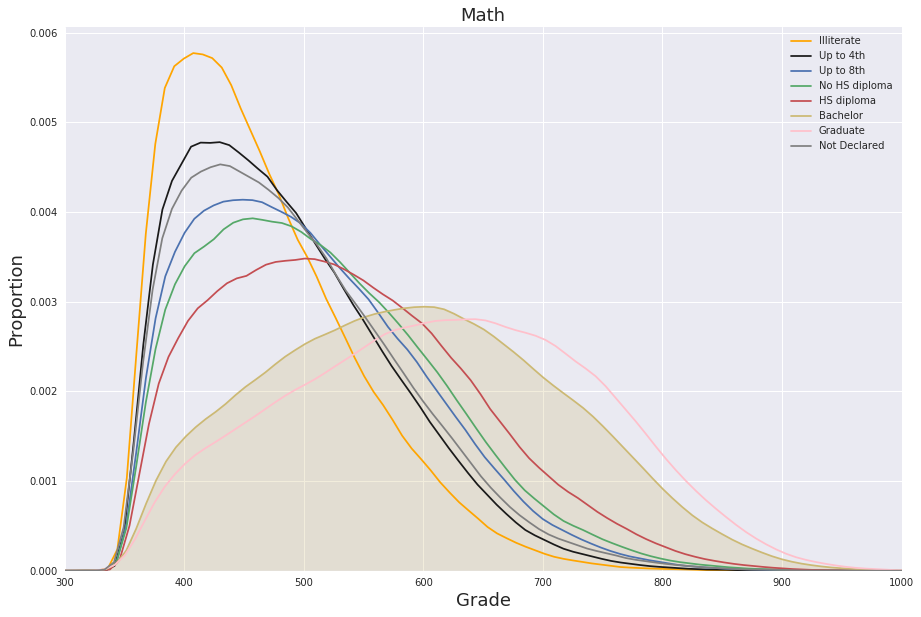

In [85]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))

sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='A'],color='orange',label='Illiterate')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='B'],color='k',label='Up to 4th')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='C'],label='Up to 8th')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='D'],color='g',label='No HS diploma')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='E'],label='HS diploma',color='r')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='F'],label='Bachelor',color='y',shade=True)
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='G'],color='pink',label='Graduate')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q001=='H'],label='Not Declared',color='grey')



ax.set_xlim(300,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Math',fontsize=18)
plt.legend()

Not surprisingly, the higher the father's level of education, the better the performance of the student. For fathers with a bachelor or a graduate degree, the shape of the score distribution shifst toward higher grade values.

In [86]:
df_c.pivot_table(index='Q001',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                mean median         std
Q001                                   
A         448.130759  480.0  194.823046
B         488.052695  520.0  179.833865
C         515.127735  540.0  175.111470
D         530.322023  540.0  172.644392
E         558.454986  560.0  170.732764
F         619.743197  620.0  164.126016
G         644.107994  640.0  163.085901
H         492.000651  520.0  183.134696

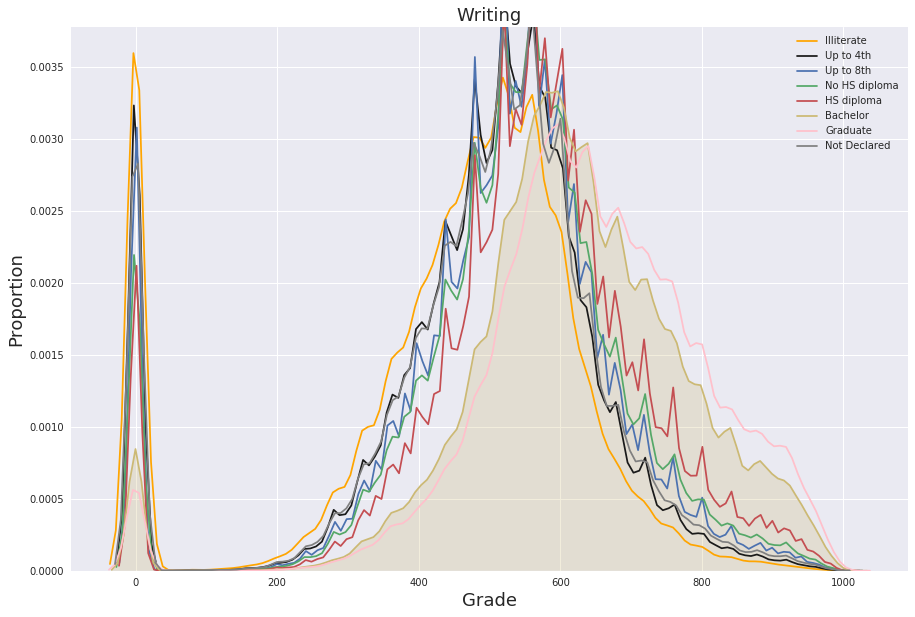

In [87]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='A'],color='orange',label='Illiterate')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='B'],label='Up to 4th',color='k')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='C'],color='b',label='Up to 8th')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='D'],color='g',label='No HS diploma')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='E'],label='HS diploma',color='r')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='F'],label='Bachelor',color='y',shade=True)
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='G'],color='pink',label='Graduate')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Q001=='H'],label='Not Declared',color='grey')

ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

The same behavior can be seen for the writing exam in the Figure above.

#### 3.1.8 Mother's Education

In [88]:
df_c.pivot_table(index='Q002',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    NU_NOTA_LC  \
            mean median        std        mean median        std        mean   
Q002                                                                           
A     485.172422  481.6  74.069320  482.919104  478.4  58.392545  476.839810   
B     497.664977  496.6  74.581002  490.263499  486.6  61.224307  490.925517   
C     506.867147  507.9  76.394538  496.875099  493.5  64.119864  500.407261   
D     510.956620  512.6  76.906216  500.617334  497.0  65.895184  505.170036   
E     526.881340  532.3  79.944317  514.479265  511.6  71.108357  518.434122   
F     562.121363  574.5  83.474786  548.615633  552.1  79.028994  544.894498   
G     570.699199  584.2  83.633848  557.863237  563.9  79.864138  550.085747   
H     492.464156  487.9  77.536655  488.617780  482.4  64.391971  486.031408   

                        NU_NOTA_MT                     
     median        std        mean median         std  
Q002                                                   
A     480.2  62.110463  462.643502  447.5   75.424614  
B     495.4  61.288240  481.975322  468.2   83.177173  
C     505.4  61.700675  498.043557  485.0   90.035034  
D     510.1  61.731270  505.825962  493.6   92.747064  
E     523.6  62.694695  527.193480  515.7  102.528675  
F     552.2  63.793024  578.307694  571.7  120.351332  
G     558.2  64.202096  591.156535  587.2  122.947919  
H     488.8  65.044153  485.456442  468.3   90.327536

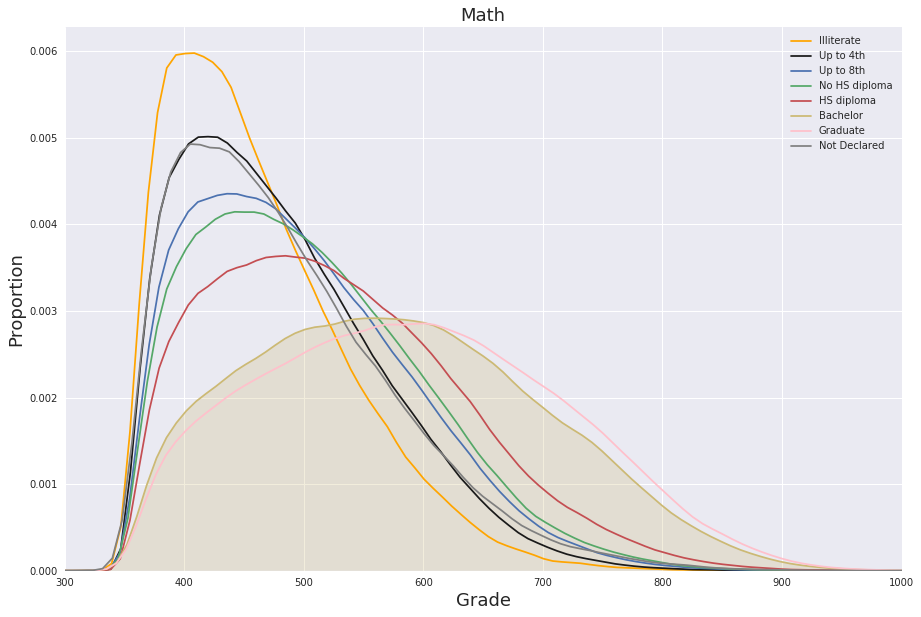

In [89]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))

sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='A'],color='orange',label='Illiterate')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='B'],color='k',label='Up to 4th')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='C'],label='Up to 8th')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='D'],color='g',label='No HS diploma')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='E'],label='HS diploma',color='r')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='F'],label='Bachelor',color='y',shade=True)
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='G'],color='pink',label='Graduate')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Q002=='H'],label='Not Declared',color='grey')



ax.set_xlim(300,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Math',fontsize=18)
plt.legend()

In [90]:
df_c.pivot_table(index='Q002',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                mean median         std
Q002                                   
A         433.898691  480.0  198.155738
B         478.188806  520.0  181.917071
C         503.657693  520.0  176.011773
D         517.592576  540.0  172.424050
E         547.178565  560.0  170.911714
F         604.660416  600.0  168.203915
G         622.165073  620.0  169.395890
H         465.465296  500.0  191.499412

#### 3.1.9 Number fo People in the household

In [91]:
df_c.pivot_table(index='Q005',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                     NU_NOTA_CN                     \
            mean  median        std        mean  median        std   
Q005                                                                 
1.0   533.605685  539.80  85.258762  519.779980  518.20  72.441321   
2.0   525.469495  529.60  82.263289  513.284236  509.70  71.301158   
3.0   526.328558  530.60  82.141781  515.081584  511.40  72.540241   
4.0   526.119679  529.90  82.492786  515.637492  511.40  73.672044   
5.0   515.077548  515.70  80.877762  505.518974  500.10  70.909990   
6.0   504.590967  503.00  78.519964  496.178760  490.30  67.391216   
7.0   497.712971  495.00  76.542069  490.135003  484.20  64.713301   
8.0   492.511480  489.20  75.902704  485.636647  479.50  62.729333   
9.0   490.323482  486.20  73.683803  483.721154  477.60  61.859574   
10.0  484.615472  479.80  75.457841  480.447319  473.50  61.112106   
11.0  488.620804  484.00  74.477994  481.944884  475.40  61.375642   
12.0  484.130907  476.40  74.794047  479.788693  472.95  61.888332   
13.0  491.345069  484.55  80.166928  483.736528  475.15  64.797165   
14.0  494.156654  488.10  77.626139  487.141698  478.20  66.421836   
15.0  487.075403  478.50  73.872354  484.032527  477.90  62.397875   
16.0  499.173902  497.10  84.158341  498.309819  495.70  69.492145   
17.0  509.248773  509.75  75.360174  497.975767  495.25  68.138938   
18.0  512.913784  508.20  82.100930  503.749730  491.60  73.127748   
19.0  519.461056  524.10  80.169110  499.833993  494.80  68.798168   
20.0  529.724088  534.45  91.654454  516.353650  508.85  80.098431   

      NU_NOTA_LC                     NU_NOTA_MT                      
            mean  median        std        mean  median         std  
Q005                                                                 
1.0   520.899061  526.20  66.809306  519.055863  502.70  106.940075  
2.0   517.291814  522.30  65.056403  517.433097  502.00  103.679456  
3.0   516.888039  521.50  65.065305  524.000064  509.10  106.007791  
4.0   515.656775  520.20  65.376548  527.897349  512.60  108.308081  
5.0   506.360729  510.40  65.052348  513.662056  497.20  102.832456  
6.0   497.794785  501.70  64.266552  499.128274  482.80   95.531984  
7.0   491.420506  494.90  63.513732  489.701572  473.70   90.104740  
8.0   486.911696  489.70  63.436762  481.898321  466.40   85.977943  
9.0   484.561279  487.50  62.369203  479.364225  463.50   84.509205  
10.0  478.321158  480.50  63.563233  473.176785  457.40   82.609658  
11.0  481.538205  483.60  64.120912  478.952031  463.00   84.233488  
12.0  477.321152  478.15  63.929327  473.037619  454.90   85.057162  
13.0  481.154931  482.60  64.762716  476.570069  456.45   89.247310  
14.0  485.123067  484.60  66.563163  481.308872  462.30   93.701982  
15.0  482.225403  482.50  65.450369  478.595833  460.75   89.539276  
16.0  494.891214  497.00  66.607456  496.264341  479.10   97.906658  
17.0  496.427914  503.15  67.048630  510.088957  489.50   99.990410  
18.0  503.297027  505.05  64.567820  510.307838  486.60  105.946994  
19.0  510.021452  510.70  63.585575  507.472277  492.60   99.615787  
20.0  512.914964  518.10  75.906860  519.558637  492.55  120.539673

Text(0.5,1,'Reading')

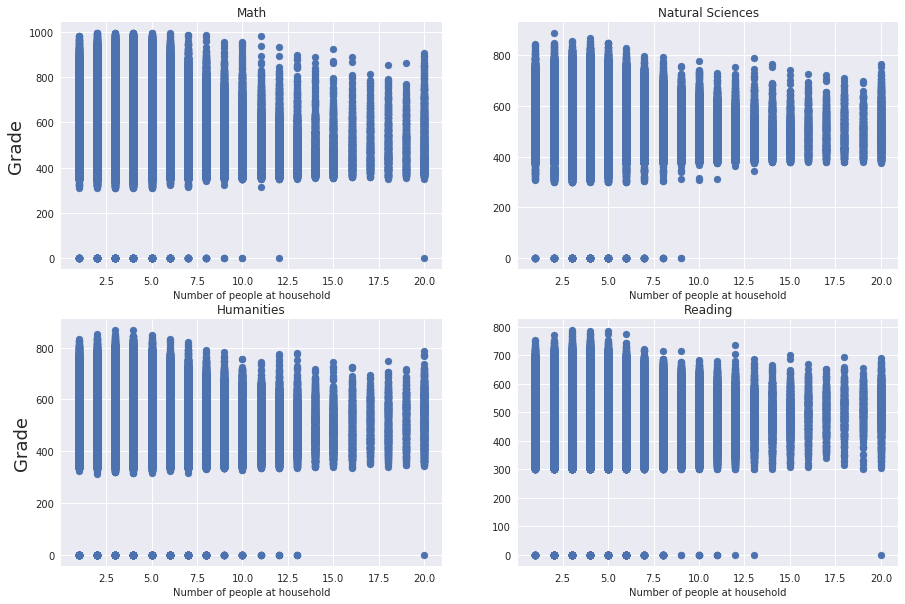

In [92]:
# 
f,axes=plt.subplots(2,2,figsize=(15, 10))
axes[0,0].scatter(x=df_c.Q005, y=df_c.NU_NOTA_MT)
axes[0,1].scatter(x=df_c.Q005, y=df_c.NU_NOTA_CN)
axes[1,0].scatter(x=df_c.Q005, y=df_c.NU_NOTA_CH)
axes[1,1].scatter(x=df_c.Q005, y=df_c.NU_NOTA_LC)
axes[0,0].set_ylabel('Grade',fontsize=18)
axes[1,0].set_ylabel('Grade',fontsize=18)
axes[0,0].set_xlabel('Number of people at household',fontsize=10)
axes[0,1].set_xlabel('Number of people at household',fontsize=10)
axes[1,0].set_xlabel('Number of people at household',fontsize=10)
axes[1,1].set_xlabel('Number of people at household',fontsize=10)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')


In [93]:
df_c.pivot_table(index='Fsize',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    \
              mean median        std        mean median        std   
Fsize                                                                
Alone   533.605685  539.8  85.258762  519.779980  518.2  72.441321   
Large   500.268063  497.8  77.695181  492.446721  486.3  66.014914   
Medium  522.286239  525.0  82.104155  512.124698  507.4  72.884389   
Small   526.061556  530.3  82.180500  514.522958  510.9  72.162177   

        NU_NOTA_LC                    NU_NOTA_MT                     
              mean median        std        mean median         std  
Fsize                                                                
Alone   520.899061  526.2  66.809306  519.055863  502.7  106.940075  
Large   493.737599  497.3  64.169021  493.153923  476.6   92.739883  
Medium  512.429514  516.7  65.414041  522.955355  507.0  106.654565  
Small   517.013535  521.8  65.062785  521.959012  506.9  105.333470

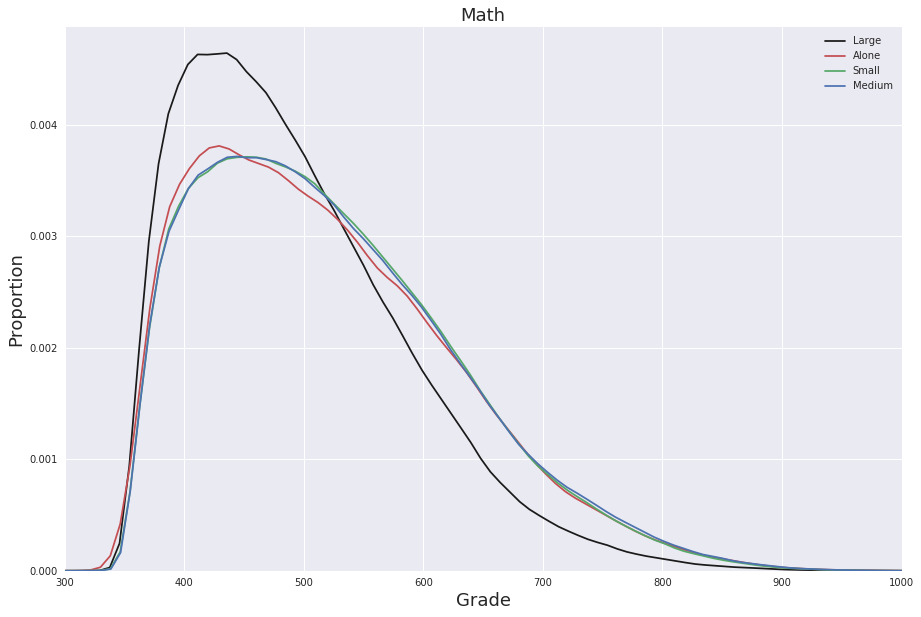

In [94]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Fsize=='Large'],color='k',label='Large')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Fsize=='Alone'],label='Alone',color='r')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Fsize=='Small'],color='g',label='Small')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Fsize=='Medium'],label='Medium')



ax.set_xlim(300,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Math',fontsize=18)
plt.legend()

The Figure above shows the grade distribution for the math exam per family size. We can see that takers in large families tend to perform worse than in smaller ones. This is again, a reflection of social-economic status since, poorer people tend to have more kids than richer ones. 

In [95]:
 # Family size for each Social Class:
class_comp2 = df_c.pivot_table(columns='Fsize',
                                index='Sclass', aggfunc='size')

tot= df_c.pivot_table(index=['Sclass'],
                                aggfunc='size')

for i in range(0,len(tot)):
    class_comp2.iloc[i,0:4]=class_comp2.iloc[i,0:4]/tot.iloc[i]

class_comp2

Fsize      Alone     Large    Medium     Small
Sclass                                        
A       0.014157  0.069300  0.642500  0.274043
B       0.012025  0.061648  0.622346  0.303981
C       0.010221  0.083580  0.596321  0.309878
D       0.008825  0.100556  0.547338  0.343281
E       0.030658  0.133632  0.464527  0.371183

In [96]:
 # Class distribution for family size:
fs_comp = df_c.pivot_table(columns='Fsize',
                                index='Sclass', aggfunc='size')
tot= df_c.pivot_table(index=['Fsize'],
                                aggfunc='size')

for i in range(0,len(tot)):
    fs_comp.iloc[0:5,i]=fs_comp.iloc[0:5,i]/tot.iloc[i]
fs_comp


Fsize      Alone     Large    Medium     Small
Sclass                                        
A       0.006735  0.006455  0.014060  0.008499
B       0.014499  0.014553  0.034514  0.023891
C       0.054357  0.087026  0.145867  0.107419
D       0.074836  0.166946  0.213477  0.189739
E       0.849572  0.725019  0.592081  0.670454

We can see from the Table above that large families are comprised by 73% of people in social class E. But the others sizes are also mainly comprised by people from social class E, which means that the whole explanation for the difference seen above cannot be based only on degree of povert.

#### 3.1.10 Social Class (Income)

In [97]:
df_c.pivot_table(index='Sclass',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    \
              mean median        std        mean median        std   
Sclass                                                               
A       619.137649  628.6  70.739597  603.401261  613.7  74.863842   
B       605.360763  615.9  73.312032  590.735840  600.5  73.929927   
C       572.869522  585.2  78.621091  557.979421  564.3  75.512409   
D       538.890285  547.9  77.624054  523.796924  524.1  70.288302   
E       500.660512  500.2  75.168975  492.742252  488.7  62.825051   

        NU_NOTA_LC                    NU_NOTA_MT                     
              mean median        std        mean median         std  
Sclass                                                               
A       586.565591  594.6  54.494887  673.541527  685.3  122.287167  
B       576.241930  584.0  55.444762  643.760753  650.8  120.164689  
C       552.387040  559.5  59.222154  590.255150  588.5  115.528568  
D       527.757464  533.5  59.650034  539.766240  532.2  102.719748  
E       495.419586  500.0  61.754188  490.868420  477.7   86.862490

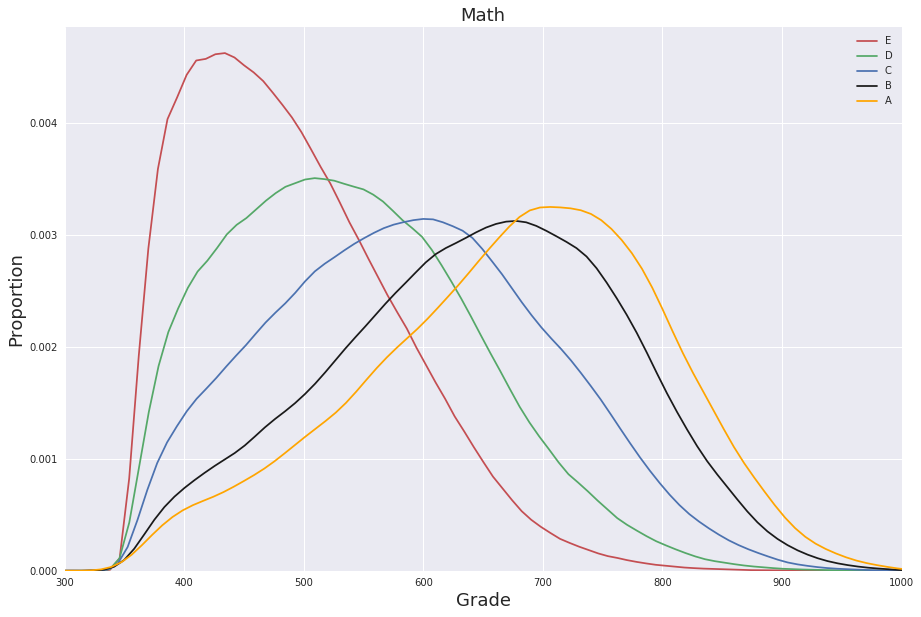

In [98]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Sclass=='E'],label='E',color='r')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Sclass=='D'],color='g',label='D')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Sclass=='C'],label='C')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Sclass=='B'],color='k',label='B')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Sclass=='A'],color='orange',label='A')

ax.set_xlim(300,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Math',fontsize=18)
plt.legend()

The Figure above shows the grade distribution of the math exam for each social class. It is clear the large impact that social status has on the grade. Not only the average math grade is larger for the richer takers, it also changes the shape significantly, switching from a right skewed distribtuion for social class E to a left skewed distribution for social class A. 

In [99]:
df_c.pivot_table(index='Sclass',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                  mean median         std
Sclass                                   
A           686.782096  680.0  147.290458
B           667.705276  660.0  151.264626
C           616.938265  620.0  162.716980
D           557.324637  560.0  168.113535
E           496.797780  520.0  179.566464

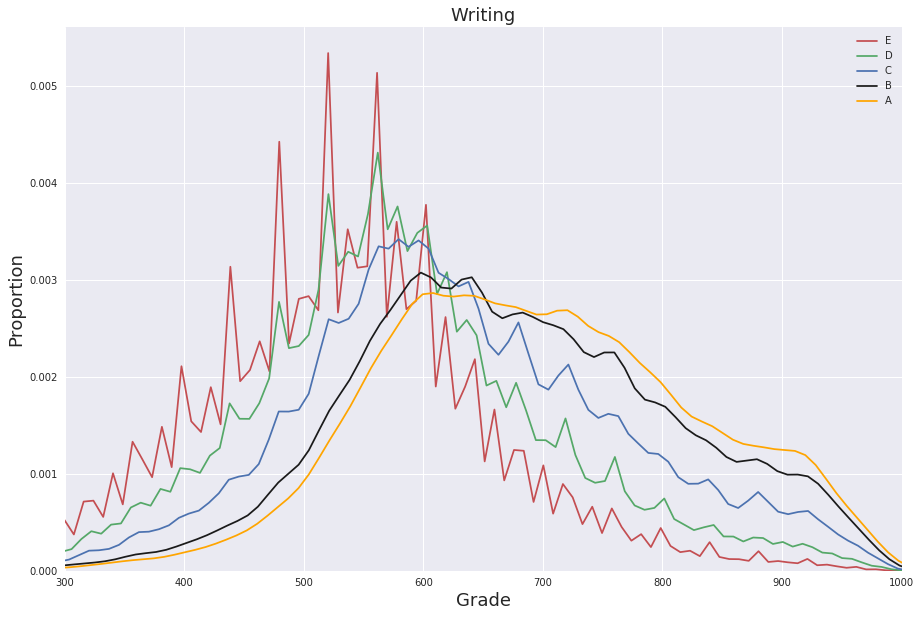

In [100]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Sclass=='E'],label='E',color='r')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Sclass=='D'],color='g',label='D')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Sclass=='C'],label='C')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Sclass=='B'],color='k',label='B')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Sclass=='A'],color='orange',label='A')

ax.set_xlim(300,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

The Figure above shows that a similar behavior to the math exam is found for the writing exam regarding to social class. 

#### 3.1.11 Region

In [101]:
df_c.pivot_table(index='Region',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    \
                   mean median        std        mean median        std   
Region                                                                    
Center-West  521.409700  523.4  82.641092  513.970686  510.0  73.039491   
North        499.684760  496.7  77.524129  493.825513  488.5  65.091227   
Northeast    506.318346  503.6  81.206769  499.313530  493.1  69.035352   
South        537.018096  544.1  77.841587  523.577901  522.6  71.808014   
Southeast    537.452650  544.0  81.175520  522.520672  519.9  74.240862   

             NU_NOTA_LC                    NU_NOTA_MT                     
                   mean median        std        mean median         std  
Region                                                                    
Center-West  512.336484  515.8  65.558642  517.203813  501.0  104.746344  
North        491.197445  494.5  63.322263  486.528122  471.3   88.056652  
Northeast    498.371085  501.5  65.435883  501.836076  484.1   98.873917  
South        526.612768  531.3  61.038204  537.854120  527.4  105.628063  
Southeast    527.060287  532.1  63.022833  540.084451  527.5  109.877596

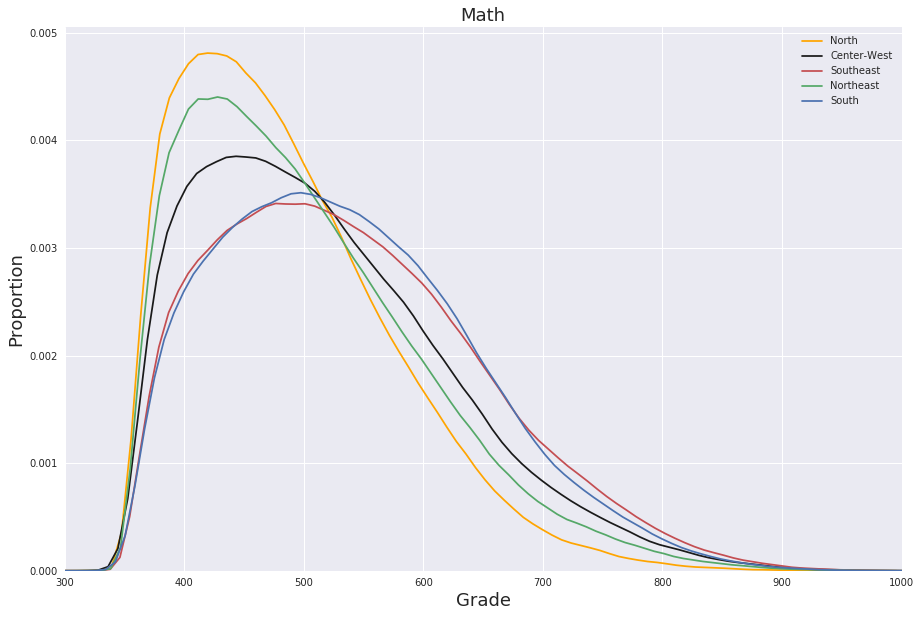

In [102]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Region=='North'],color='orange',label='North')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Region=='Center-West'],color='k',label='Center-West')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Region=='Southeast'],label='Southeast',color='r')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Region=='Northeast'],color='g',label='Northeast')
sns.kdeplot(df_c.NU_NOTA_MT[df_c.Region=='South'],label='South')


ax.set_xlim(300,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Math',fontsize=18)
plt.legend()

The behavior above can be explained by the difference in GDPs of each region. The South and Southeast regions possess the largest GDPs among the five regions and the North has the smallest GDP.

In [103]:
df_c.pivot_table(index='Region',
             values=['NU_NOTA_REDACAO'], aggfunc={'median','mean','std'})

NU_NOTA_REDACAO                   
                       mean median         std
Region                                        
Center-West      530.564733  540.0  181.782299
North            502.090736  520.0  187.532285
Northeast        517.906635  540.0  190.764949
South            540.768237  560.0  166.130266
Southeast        547.704144  560.0  172.805618

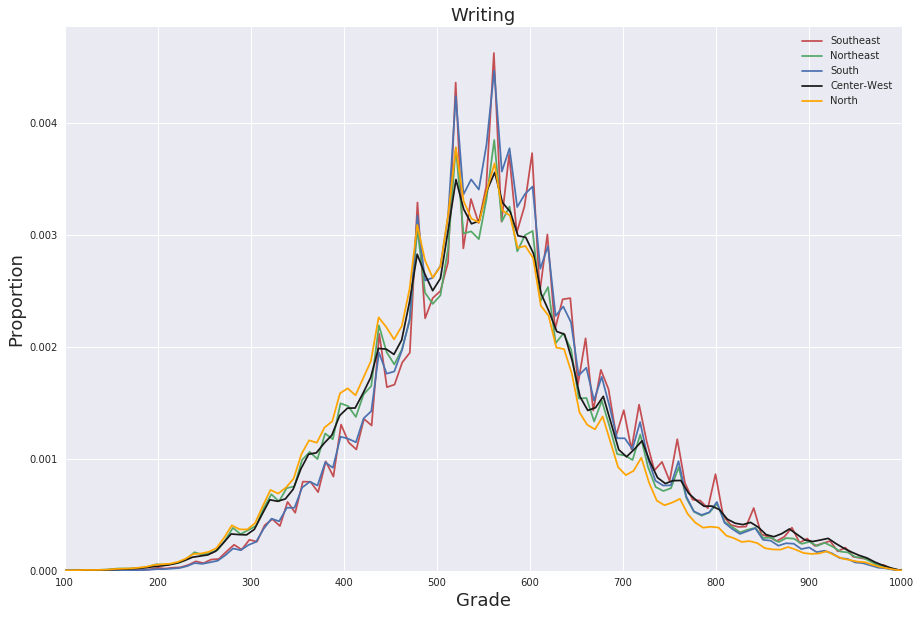

In [104]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Region=='Southeast'],label='Southeast',color='r')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Region=='Northeast'],color='g',label='Northeast')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Region=='South'],label='South')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Region=='Center-West'],color='k',label='Center-West')
sns.kdeplot(df_c.NU_NOTA_REDACAO[df_c.Region=='North'],color='orange',label='North')

ax.set_xlim(100,1000)
ax.set_ylabel('Proportion',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Writing',fontsize=18)
plt.legend()

In [105]:
 # Racial Composition of each Region:
class_comp3 = df_c.pivot_table(columns='TP_COR_RACA',
                                index='Region', aggfunc='size')

tot= df_c.pivot_table(index=['Region'],
                                aggfunc='size')

for i in range(0,len(tot)):
    class_comp3.iloc[i,0:6]=class_comp3.iloc[i,0:6]/tot.iloc[i]

class_comp3

TP_COR_RACA         0         1         2         3         4         5
Region                                                                 
Center-West  0.020751  0.328387  0.124477  0.485841  0.033015  0.007529
North        0.014131  0.163163  0.106958  0.683864  0.021549  0.010334
Northeast    0.016562  0.221588  0.151141  0.577522  0.026142  0.007046
South        0.017208  0.740406  0.054070  0.174124  0.012314  0.001877
Southeast    0.017597  0.467202  0.129277  0.360510  0.021499  0.003915

Due to the immigration of Germans and Italians to Brazil that happened in the beginning of the 20th Century, the South of Brazil is predominatly white. 

#### 3.1.12 Access to Internet at Home

In [106]:
medsi_mt=mean(df_c.NU_NOTA_MT[df_c.Q025=='B'])
medno_mt=mean(df_c.NU_NOTA_MT[df_c.Q025=='A'])
medsi_cn=mean(df_c.NU_NOTA_CN[df_c.Q025=='B'])
medno_cn=mean(df_c.NU_NOTA_CN[df_c.Q025=='A'])
medsi_lc=mean(df_c.NU_NOTA_LC[df_c.Q025=='B'])
medno_lc=mean(df_c.NU_NOTA_LC[df_c.Q025=='A'])
medsi_ch=mean(df_c.NU_NOTA_CH[df_c.Q025=='B'])
medno_ch=mean(df_c.NU_NOTA_CH[df_c.Q025=='A'])
# Using pivot tables to calculate the medina, mean,
# and standard deviation for each group
df_c.pivot_table(index='Q025',
             values=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'], aggfunc={'median','mean','std'})

NU_NOTA_CH                    NU_NOTA_CN                    NU_NOTA_LC  \
            mean median        std        mean median        std        mean   
Q025                                                                           
A     490.130991  487.3  73.454008  485.455000  480.9  60.328919  484.813113   
B     534.094101  540.4  82.024279  521.257851  518.5  74.023677  523.238645   

                        NU_NOTA_MT                     
     median        std        mean median         std  
Q025                                                   
A     488.9  61.401995  479.070438  465.2   81.820198  
B     528.2  63.914745  535.397779  522.1  109.090590

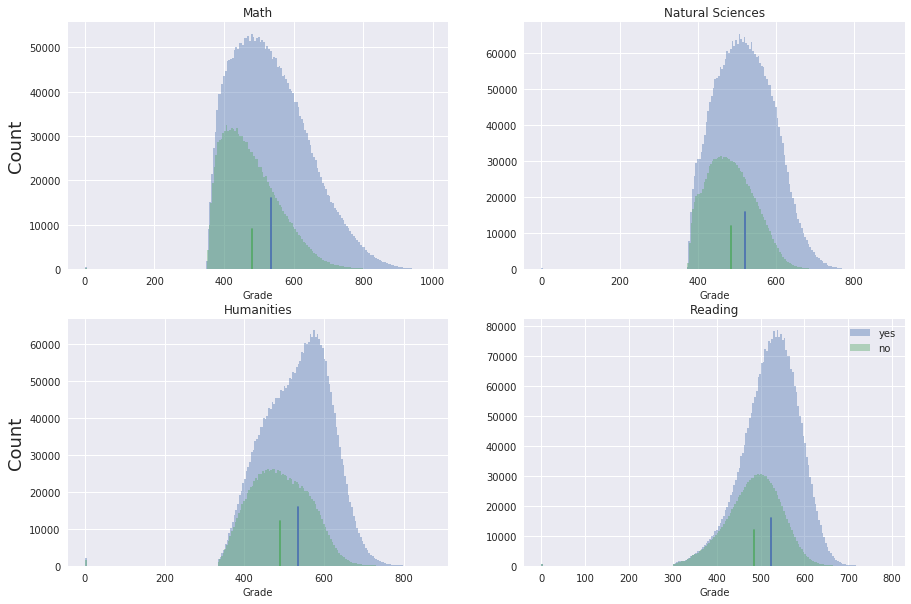

In [107]:
# We will plot the histogram using seaborn.
f,axes=plt.subplots(2,2,figsize=(15, 10))
sns.distplot(df_c.NU_NOTA_MT[df_c.Q025=='B'],bins=200, kde=False,label='yes',ax=axes[0,0])
sns.distplot(df_c.NU_NOTA_MT[df_c.Q025=='A'],bins=200, kde=False,color='g',label='no',ax=axes[0,0])
axes[0,0].plot([medsi_mt,medsi_mt],[0,16000],'b')
axes[0,0].plot([medno_mt,medno_mt],[0,9000],'g')
sns.distplot(df_c.NU_NOTA_CN[df_c.Q025=='B'],bins=200, kde=False,label='yes',ax=axes[0,1])
sns.distplot(df_c.NU_NOTA_CN[df_c.Q025=='A'],bins=200, kde=False,color='g',label='no',ax=axes[0,1])
axes[0,1].plot([medsi_cn,medsi_cn],[0,16000],'b')
axes[0,1].plot([medno_cn,medno_cn],[0,12000],'g')
sns.distplot(df_c.NU_NOTA_CH[df_c.Q025=='B'],bins=200, kde=False,label='yes',ax=axes[1,0])
sns.distplot(df_c.NU_NOTA_CH[df_c.Q025=='A'],bins=200, kde=False,color='g',label='no',ax=axes[1,0])
axes[1,0].plot([medsi_ch,medsi_ch],[0,16000],'b')
axes[1,0].plot([medno_ch,medno_ch],[0,12000],'g')
sns.distplot(df_c.NU_NOTA_LC[df_c.Q025=='B'],bins=200, kde=False,label='yes',ax=axes[1,1])
sns.distplot(df_c.NU_NOTA_LC[df_c.Q025=='A'],bins=200, kde=False,color='g',label='no',ax=axes[1,1])
axes[1,1].plot([medsi_lc,medsi_lc],[0,16000],'b')
axes[1,1].plot([medno_lc,medno_lc],[0,12000],'g')
axes[0,0].set_ylabel('Count',fontsize=18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[0,0].set_xlabel('Grade',fontsize=10)
axes[0,1].set_xlabel('Grade',fontsize=10)
axes[1,0].set_xlabel('Grade',fontsize=10)
axes[1,1].set_xlabel('Grade',fontsize=10)
axes[0,0].set_title('Math')
axes[0,1].set_title('Natural Sciences')
axes[1,0].set_title('Humanities')
axes[1,1].set_title('Reading')

plt.legend()

As we can seen in the Figures above, there is a significant difference between the grades distributions for people with home access to the internet and people without home access. The access to internet is definetly related to the income of the taker, but there are small towns in Brazil where access to internet is really difficult.

In [108]:
 # Class distribution and internet access:
int_comp = df_c.pivot_table(columns='Q025',
                                index='Sclass', aggfunc='size')
tot= df_c.pivot_table(index=['Q025'],
                                aggfunc='size')

for i in range(0,len(tot)):
    int_comp.iloc[0:5,i]=int_comp.iloc[0:5,i]/tot.iloc[i]
int_comp


Q025           A         B
Sclass                    
A       0.000273  0.015432
B       0.000921  0.039015
C       0.014058  0.167977
D       0.074537  0.246406
E       0.910211  0.531169

We can see from the Table above that ~98% of the people who have no access to Internet at home belongs to the two poorest social classes.

### 3.2 Creating New Variables for Grades

Although each University decides which weights use for each exam depending on the selected major, we will use a simple arithmetic mean of the 5 grades to create a final grade. We will drop all the grades that were equal to zero, because they indicate adicional problems with that particular student.

In [109]:
# Creating Final Grade:
#df_c['NOTA_F']=(df_c.NU_NOTA_MT+df_c.NU_NOTA_CN+df_c.NU_NOTA_CH+df_c.NU_NOTA_LC+df_c.NU_NOTA_REDACAO)/5

df_c['NOTA_F']=(df_c.NU_NOTA_MT[(df_c.NU_NOTA_REDACAO>0) & (df_c.NU_NOTA_MT>0) & (df_c.NU_NOTA_CN>0)& (df_c.NU_NOTA_CH>0) & (df_c.NU_NOTA_LC>0)]
                +df_c.NU_NOTA_CN[(df_c.NU_NOTA_REDACAO>0) & (df_c.NU_NOTA_MT>0) & (df_c.NU_NOTA_CN>0)& (df_c.NU_NOTA_CH>0) & (df_c.NU_NOTA_LC>0)]
                +df_c.NU_NOTA_CH[(df_c.NU_NOTA_REDACAO>0) & (df_c.NU_NOTA_MT>0) & (df_c.NU_NOTA_CN>0)& (df_c.NU_NOTA_CH>0) & (df_c.NU_NOTA_LC>0)]
                +df_c.NU_NOTA_LC[(df_c.NU_NOTA_REDACAO>0) & (df_c.NU_NOTA_MT>0) & (df_c.NU_NOTA_CN>0)& (df_c.NU_NOTA_CH>0) & (df_c.NU_NOTA_LC>0)]
                +df_c.NU_NOTA_REDACAO[(df_c.NU_NOTA_REDACAO>0) & (df_c.NU_NOTA_MT>0) & (df_c.NU_NOTA_CN>0)& (df_c.NU_NOTA_CH>0) & (df_c.NU_NOTA_LC>0)]
               )/5

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [110]:
df_c=df_c.dropna()

In [111]:
from statistics import mode
medF=mean(df_c.NOTA_F)
mediF=median(df_c.NOTA_F)
stdF=std(df_c.NOTA_F)
modo=mode(df_c.NOTA_F)
print('Mean:',medF,'Median:',mediF,'Standard Deviation:',stdF,'Mode:',modo)

Mean: 527.5953658406986 Median: 519.36 Standard Deviation: 72.09169589116365 Mode: 484.9


Text(0.5,1,'Final Grade')

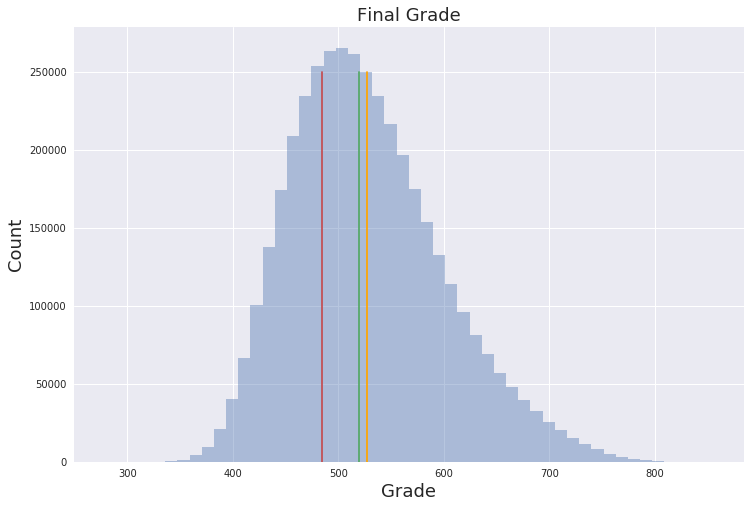

In [112]:
f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(df_c.NOTA_F,bins=50, kde=False)
plt.plot([medF,medF],[0,250000],'orange')
plt.plot([mediF,mediF],[0,250000],'g')
plt.plot([modo,modo],[0,250000],'r')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Grade',fontsize=18)
ax.set_title('Final Grade',fontsize=18)
#savefig('finalgrade_dist.eps', fmt='eps', dpi=200)

The Figure above shows the distribution of the mean grade. Even though the math and natural sciences exams are extremely right skewed, the final grade is less right skewed.

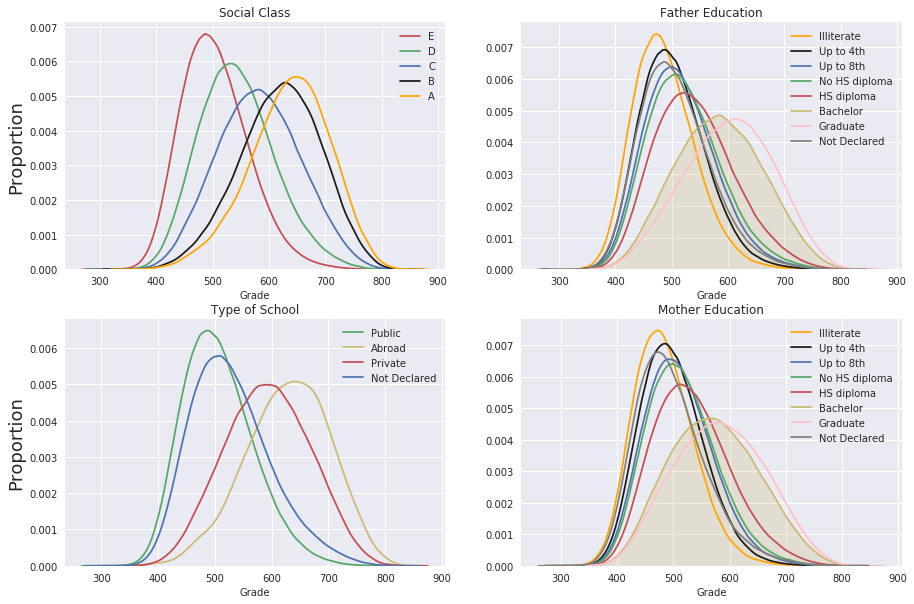

In [113]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(2,2,figsize=(15, 10))
sns.kdeplot(df_c.NOTA_F[df_c.Sclass=='E'],label='E',color='r',ax=ax[0,0])
sns.kdeplot(df_c.NOTA_F[df_c.Sclass=='D'],color='g',label='D',ax=ax[0,0])
sns.kdeplot(df_c.NOTA_F[df_c.Sclass=='C'],label='C',ax=ax[0,0])
sns.kdeplot(df_c.NOTA_F[df_c.Sclass=='B'],color='k',label='B',ax=ax[0,0])
sns.kdeplot(df_c.NOTA_F[df_c.Sclass=='A'],color='orange',label='A',ax=ax[0,0])
#ax[0,0].plot([600,600],[0,0.007],'b')

sns.kdeplot(df_c.NOTA_F[df_c.Q001=='A'],color='orange',label='Illiterate',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q001=='B'],color='k',label='Up to 4th',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q001=='C'],label='Up to 8th',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q001=='D'],color='g',label='No HS diploma',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q001=='E'],label='HS diploma',color='r',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q001=='F'],label='Bachelor',color='y',shade=True,ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q001=='G'],color='pink',label='Graduate',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q001=='H'],label='Not Declared',color='grey',ax=ax[0,1])
#ax[0,1].plot([600,600],[0,0.007],'b')

sns.kdeplot(df_c.NOTA_F[df_c.TP_ESCOLA==2],color='g',label='Public',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.TP_ESCOLA==4],color='y',label='Abroad',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.TP_ESCOLA==3],color='r',label='Private',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.TP_ESCOLA==1],label='Not Declared',ax=ax[1,0])
#ax[1,0].plot([600,600],[0,0.007],'b')

sns.kdeplot(df_c.NOTA_F[df_c.Q002=='A'],color='orange',label='Illiterate',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q002=='B'],color='k',label='Up to 4th',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q002=='C'],label='Up to 8th',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q002=='D'],color='g',label='No HS diploma',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q002=='E'],label='HS diploma',color='r',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q002=='F'],label='Bachelor',color='y',shade=True,ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q002=='G'],color='pink',label='Graduate',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Q002=='H'],label='Not Declared',color='grey',ax=ax[1,1])
#ax[1,1].plot([600,600],[0,0.007],'b')

ax[0,0].set_ylabel('Proportion',fontsize=18)
ax[1,0].set_ylabel('Proportion',fontsize=18)
ax[0,0].set_xlabel('Grade',fontsize=10)
ax[0,1].set_xlabel('Grade',fontsize=10)
ax[1,0].set_xlabel('Grade',fontsize=10)
ax[1,1].set_xlabel('Grade',fontsize=10)
ax[0,0].set_title('Social Class')
ax[0,1].set_title('Father Education')
ax[1,0].set_title('Type of School')
ax[1,1].set_title('Mother Education')


plt.legend()
#savefig('fg_dist_perfea.eps', fmt='eps', dpi=200)
plt.show()

The Figure above shows the mean grade behaviour with some of the features previously analyzed. The behavior is very similar to what discussed before when analysing the subjects individualy.

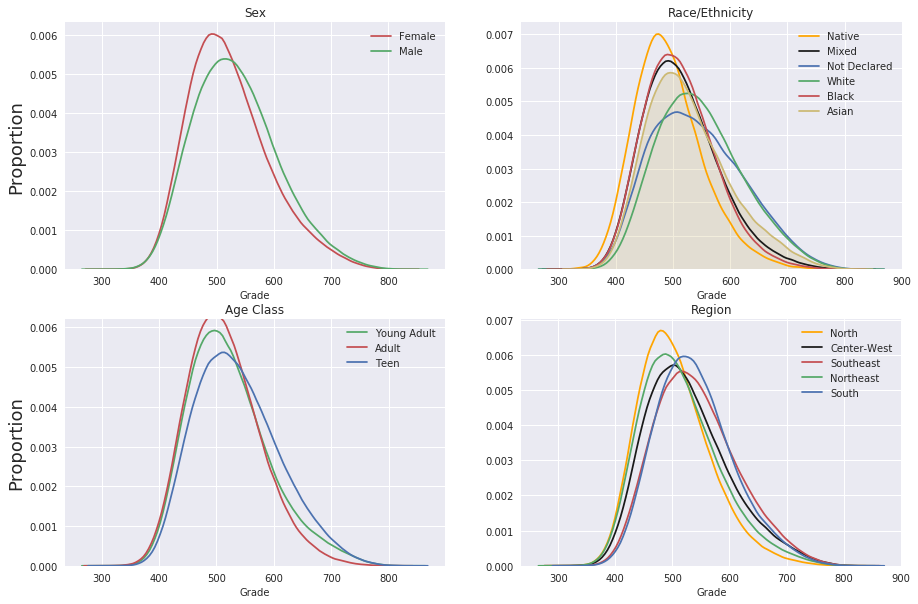

In [114]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(2,2,figsize=(15, 10))
sns.kdeplot(df_c.NOTA_F[df_c.TP_SEXO=='F'],label='Female',color='r',ax=ax[0,0])
sns.kdeplot(df_c.NOTA_F[df_c.TP_SEXO=='M'],color='g',label='Male',ax=ax[0,0])

sns.kdeplot(df_c.NOTA_F[df_c.TP_COR_RACA==5],color='orange',label='Native',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_COR_RACA==3],color='k',label='Mixed',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_COR_RACA==0],label='Not Declared',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_COR_RACA==1],color='g',label='White',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_COR_RACA==2],label='Black',color='r',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_COR_RACA==4],label='Asian',color='y',shade=True,ax=ax[0,1])

sns.kdeplot(df_c.NOTA_F[df_c.Aclass=='young adult'],color='g',label='Young Adult',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.Aclass=='adult'],color='r',label='Adult',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.Aclass=='teen'],label='Teen',ax=ax[1,0])

sns.kdeplot(df_c.NOTA_F[df_c.Region=='North'],color='orange',label='North',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Region=='Center-West'],color='k',label='Center-West',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Region=='Southeast'],label='Southeast',color='r',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Region=='Northeast'],color='g',label='Northeast',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.Region=='South'],label='South',ax=ax[1,1])

#ax[0,0].plot([600,600],[0,0.007],'b')
#ax[0,1].plot([600,600],[0,0.007],'b')
#ax[1,0].plot([600,600],[0,0.007],'b')
#ax[1,1].plot([600,600],[0,0.007],'b')

ax[0,0].set_ylabel('Proportion',fontsize=18)
ax[1,0].set_ylabel('Proportion',fontsize=18)
ax[0,0].set_xlabel('Grade',fontsize=10)
ax[0,1].set_xlabel('Grade',fontsize=10)
ax[1,0].set_xlabel('Grade',fontsize=10)
ax[1,1].set_xlabel('Grade',fontsize=10)
ax[0,0].set_title('Sex')
ax[0,1].set_title('Race/Ethnicity')
ax[1,0].set_title('Age Class')
ax[1,1].set_title('Region')


plt.legend()
#savefig('fg_dist_perfea2.eps', fmt='eps', dpi=200)
plt.show()

We can seen in the Figure above that the gender does not have a large influence in the final grade. 

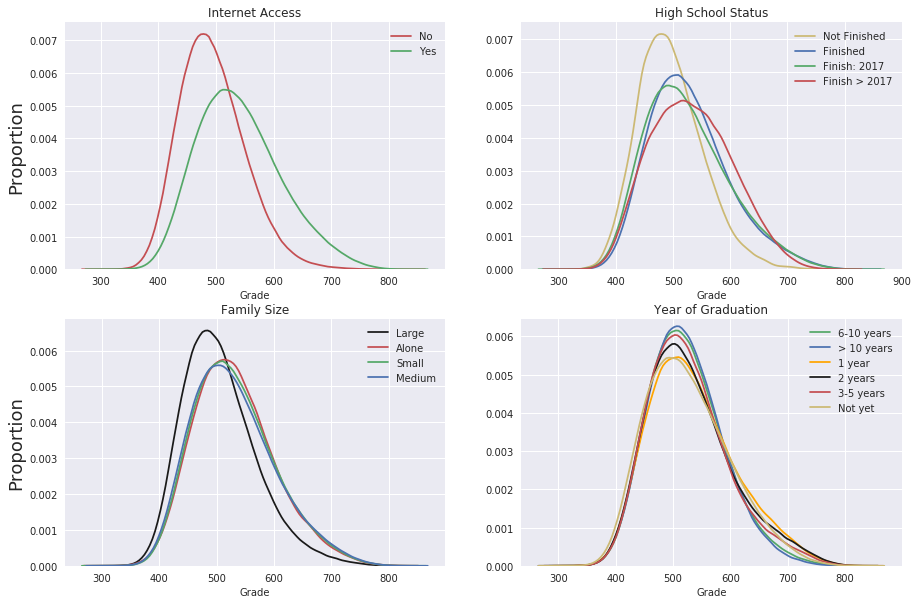

In [115]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(2,2,figsize=(15, 10))
sns.kdeplot(df_c.NOTA_F[df_c.Q025=='A'],label='No',color='r',ax=ax[0,0])
sns.kdeplot(df_c.NOTA_F[df_c.Q025=='B'],color='g',label='Yes',ax=ax[0,0])

sns.kdeplot(df_c.NOTA_F[df_c.TP_ST_CONCLUSAO==4],color='y',label='Not Finished',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_ST_CONCLUSAO==1],label='Finished',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_ST_CONCLUSAO==2],color='g',label='Finish: 2017',ax=ax[0,1])
sns.kdeplot(df_c.NOTA_F[df_c.TP_ST_CONCLUSAO==3],color='r',label='Finish > 2017',ax=ax[0,1])

sns.kdeplot(df_c.NOTA_F[df_c.Fsize=='Large'],color='k',label='Large',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.Fsize=='Alone'],label='Alone',color='r',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.Fsize=='Small'],color='g',label='Small',ax=ax[1,0])
sns.kdeplot(df_c.NOTA_F[df_c.Fsize=='Medium'],label='Medium',ax=ax[1,0])

sns.kdeplot(df_c.NOTA_F[df_c.HSgrad=='6-10 years'],color='g',label='6-10 years',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.HSgrad=='> 10 years'],label='> 10 years',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.HSgrad=='1 year'],color='orange',label='1 year',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.HSgrad=='2 years'],color='k',label='2 years',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.HSgrad=='3-5 years'],label='3-5 years',color='r',ax=ax[1,1])
sns.kdeplot(df_c.NOTA_F[df_c.HSgrad=='Not yet'],color='y',label='Not yet',ax=ax[1,1])

#ax[0,0].plot([600,600],[0,0.007],'b')
#ax[0,1].plot([600,600],[0,0.007],'b')
#ax[1,0].plot([600,600],[0,0.007],'b')
#ax[1,1].plot([600,600],[0,0.007],'b')

ax[0,0].set_ylabel('Proportion',fontsize=18)
ax[1,0].set_ylabel('Proportion',fontsize=18)
ax[0,0].set_xlabel('Grade',fontsize=10)
ax[0,1].set_xlabel('Grade',fontsize=10)
ax[1,0].set_xlabel('Grade',fontsize=10)
ax[1,1].set_xlabel('Grade',fontsize=10)
ax[0,0].set_title('Internet Access')
ax[0,1].set_title('High School Status')
ax[1,0].set_title('Family Size')
ax[1,1].set_title('Year of Graduation')


plt.legend()
#savefig('fg_dist_perfea3.eps', fmt='eps', dpi=200)
plt.show()

The Figure above shows that the year of graduation has almost no influence in the final grade. Also, there is almost no difference in grades between people belonging to small, alone and medium size familes. Only, large families present a larger difference, which is likely related to the family social status.

Now we are going to divide the final grade into chunks. Since there were only around 238,000 positions offered in total, approximately only 5.5% of the exam takers will pass.  It is clear that takers with grades below 450 will not pass. The other grades will depende on the amount of people who apply for the universities using the SISU (Sistema de Selcao Unificada). The people who did really well on ENEM are likely to do really well on the entrance exam for the top 2 universities (USP and UNICAMP) in Brazil that do not use ENEM as a selection criterion. Thus, they are likely to opt for these universities instead of the Federal ones, making possible for more people with lower grades to pass. There are about 18,000 positions in these two universities, if we assume that all of them will not enroll in the SISU, around 6% of the ENEM takers entered in some univerisity in 2017. 

Since there are more State's universities and some Federal universities that do not accept ENEM as a selection criterion, we will assume that around 6% of the total number of the exam takers have a chance to get into a public university. 

In [116]:
# Finding the 94 percentile for the final grade
np.percentile(df_c.NOTA_F,94)

652.86000000000001

Now we will divide the sample into two categories: 

|Category|Criterion|
|--------|---------|
|   0    |Final Grade < 650 |
|   1    |Final Grade >= 650|

In [117]:
# Create the feature MT_class:
df_c['MT_class']=0
df_c.MT_class[(df_c.NOTA_F >= 650)]=1

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



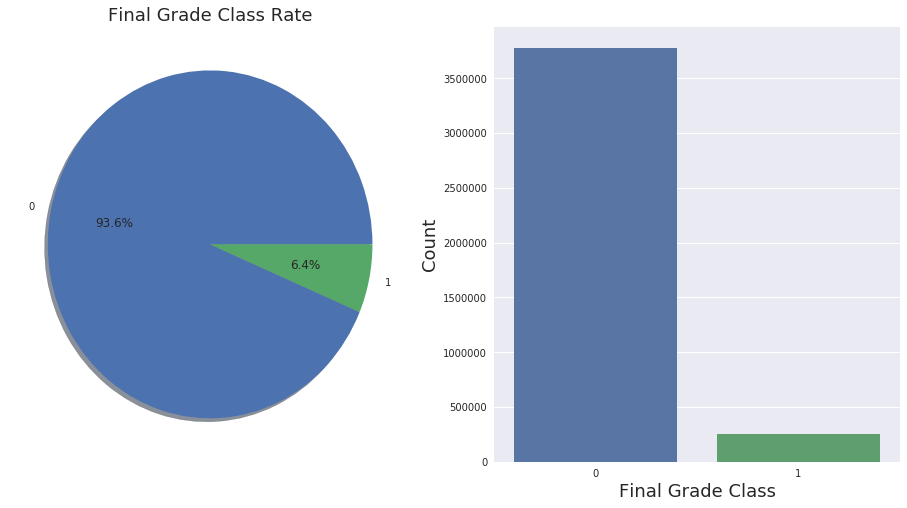

In [118]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_c['MT_class'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Final Grade Class Rate',fontsize=18)
ax[0].set_ylabel('')
sns.countplot('MT_class',data=df_c,ax=ax[1])  
ax[1].set_xlabel('Final Grade Class',fontsize=18)
ax[1].set_ylabel('Count',fontsize=18)
savefig('new_class.eps', fmt='eps', dpi=200)

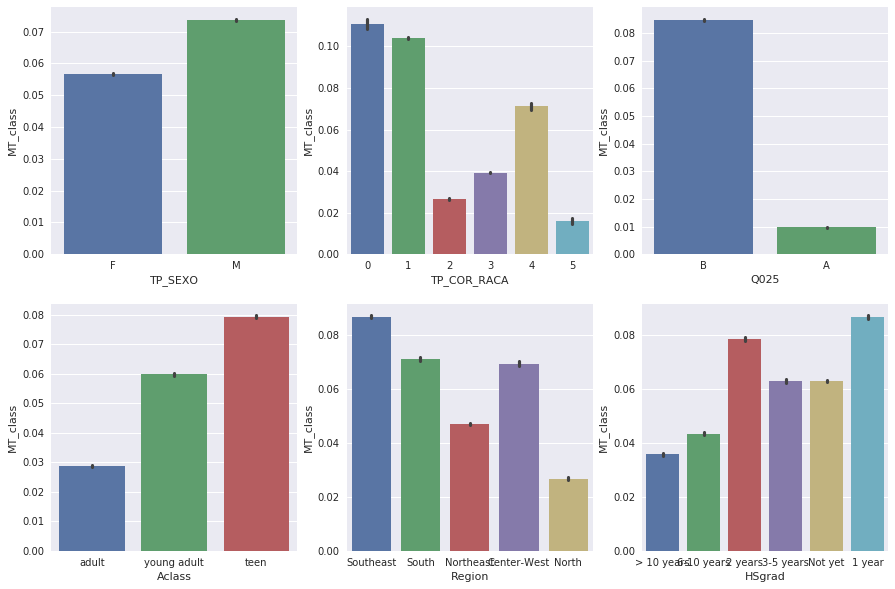

In [119]:
f, ax = plt.subplots(2,3,figsize=(15, 10))
sns.barplot('TP_SEXO', 'MT_class', data=df_c,ax=ax[0,0])
sns.barplot('TP_COR_RACA', 'MT_class', data=df_c,ax=ax[0,1])
sns.barplot('Q025', 'MT_class', data=df_c,ax=ax[0,2])
sns.barplot('Aclass', 'MT_class', data=df_c,ax=ax[1,0])
sns.barplot('Region', 'MT_class', data=df_c,ax=ax[1,1])
sns.barplot('HSgrad', 'MT_class', data=df_c,ax=ax[1,2])
#savefig('mtc_dist_perfea.eps', fmt='eps', dpi=200)

The Figures above shows the proportion of people in class 1 per feature. We can see that for some variable there are significant differences between the proportions. For instance, while more than 12% of teens are in class 1, less than 6% of adults are in the same class.

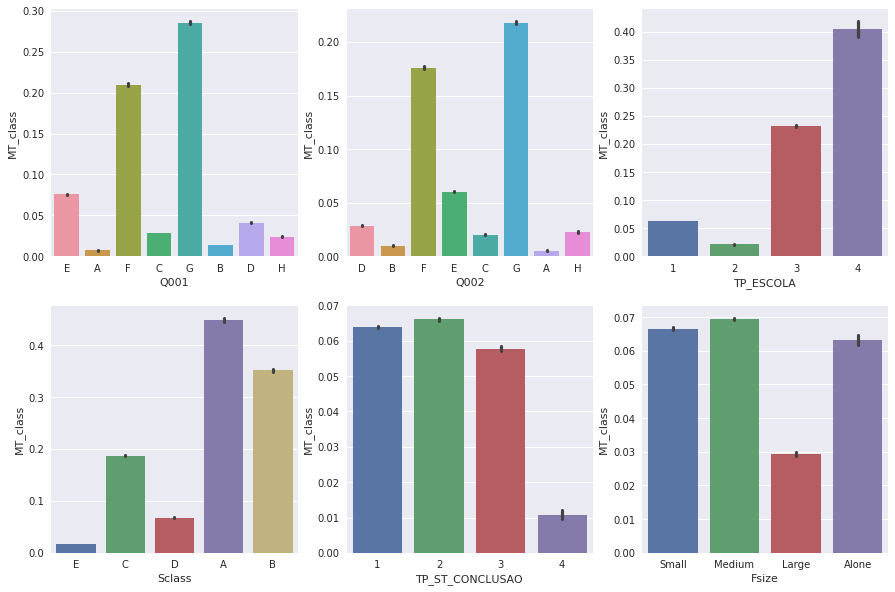

In [120]:
f, ax = plt.subplots(2,3,figsize=(15, 10))
sns.barplot('Q001', 'MT_class', data=df_c,ax=ax[0,0])
sns.barplot('Q002', 'MT_class', data=df_c,ax=ax[0,1])
sns.barplot('TP_ESCOLA', 'MT_class', data=df_c,ax=ax[0,2])
sns.barplot('Sclass', 'MT_class', data=df_c,ax=ax[1,0])
sns.barplot('TP_ST_CONCLUSAO', 'MT_class', data=df_c,ax=ax[1,1])
sns.barplot('Fsize', 'MT_class', data=df_c,ax=ax[1,2])
#savefig('mtc_dist_perfea2.eps', fmt='eps', dpi=200)

The Figures above shows the proportion of people in class 1 per feature. We can see that the four features that present the largest impact on the chances to go to college are: Social Class, Type of School, Father's education, and mother's education.

In [121]:
 # Distribution of Social class per MT_Class:
mt_comp = df_c.pivot_table(columns='MT_class',
                                index='Sclass', aggfunc='size')
tot= df_c.pivot_table(index=['MT_class'],
                                aggfunc='size')

for i in range(0,len(tot)):
    mt_comp.iloc[0:5,i]=mt_comp.iloc[0:5,i]/tot.iloc[i]
mt_comp

MT_class         0         1
Sclass                      
A         0.006809  0.081513
B         0.020242  0.161810
C         0.110753  0.375840
D         0.198933  0.213531
E         0.663264  0.167305

In [122]:
 # Distribution of father's education per MT_Class:
mt_comp2 = df_c.pivot_table(columns='MT_class',
                                index='Q001', aggfunc='size')
tot= df_c.pivot_table(index=['MT_class'],
                                aggfunc='size')

for i in range(0,len(tot)):
    mt_comp2.iloc[0:8,i]=mt_comp2.iloc[0:8,i]/tot.iloc[i]
mt_comp2

MT_class         0         1
Q001                        
A         0.052101  0.005604
B         0.219459  0.045833
C         0.151405  0.065082
D         0.127696  0.080161
E         0.260496  0.313920
F         0.065075  0.254169
G         0.034492  0.202545
H         0.089276  0.032685

In [123]:
 # Distribution of mother's education per MT_Class:
mt_comp2b = df_c.pivot_table(columns='MT_class',
                                index='Q002', aggfunc='size')
tot= df_c.pivot_table(index=['MT_class'],
                                aggfunc='size')

for i in range(0,len(tot)):
    mt_comp2b.iloc[0:8,i]=mt_comp2b.iloc[0:8,i]/tot.iloc[i]
mt_comp2b

MT_class         0         1
Q002                        
A         0.036256  0.002940
B         0.166391  0.024971
C         0.144168  0.044018
D         0.143051  0.061757
E         0.322545  0.305586
F         0.089744  0.282337
G         0.065142  0.267340
H         0.032703  0.011052

In [124]:
 # Distribution of race/ethnicity per MT_Class:
    
mt_comp3 = df_c.pivot_table(columns='MT_class',
                                index='TP_COR_RACA', aggfunc='size')
tot= df_c.pivot_table(index=['MT_class'],
                                aggfunc='size')

for i in range(0,len(tot)):
    mt_comp3.iloc[0:8,i]=mt_comp3.iloc[0:8,i]/tot.iloc[i]
mt_comp3

MT_class            0         1
TP_COR_RACA                    
0            0.016191  0.029733
1            0.356750  0.609369
2            0.129534  0.052297
3            0.468840  0.281387
4            0.022915  0.025827
5            0.005769  0.001386

In [125]:
# Distribution of type of school per MT_Class:
    
mt_comp4 = df_c.pivot_table(columns='MT_class',
                                index='TP_ESCOLA', aggfunc='size')
tot= df_c.pivot_table(index=['MT_class'],
                                aggfunc='size')

for i in range(0,len(tot)):
    mt_comp4.iloc[0:8,i]=mt_comp4.iloc[0:8,i]/tot.iloc[i]
mt_comp4

MT_class          0         1
TP_ESCOLA                    
1          0.683195  0.669622
2          0.262479  0.084324
3          0.053662  0.239382
4          0.000665  0.006671

In [126]:
SC2=SC.sort_index()
FE2=FE.sort_index()
ME2=ME.sort_index()

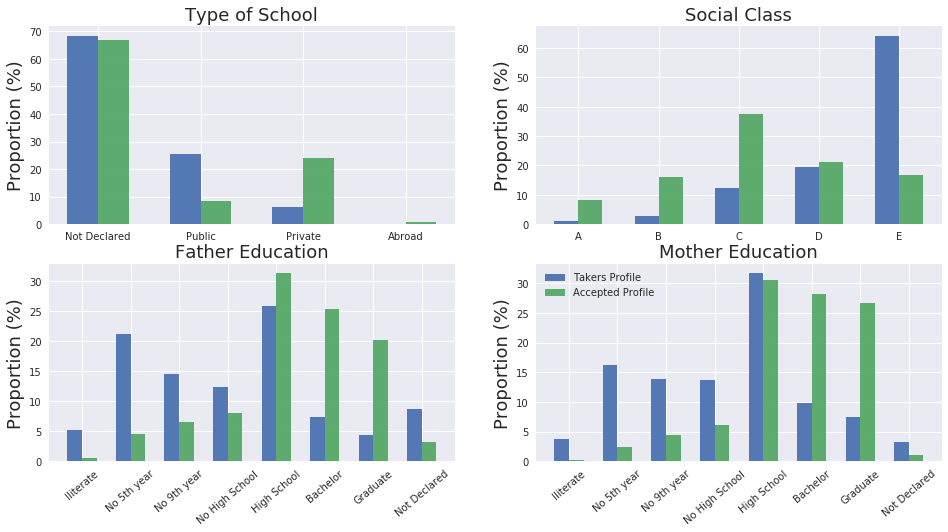

In [127]:
order = sorted(SC2.index)
#order = sorted(df_c.Sclass.unique())
order3 = sorted(df_c.Q001.unique())
order4 = sorted(df_c.Q002.unique())
f,ax=plt.subplots(2,2,figsize=(16,8))
bar_width = 0.3
objects=list(order)
index=np.arange(len(objects))

obj2=list(TS.index)
index2=np.arange(len(obj2))

obj3=list(order3)
index3=np.arange(len(obj3))

obj4=list(order4)
index4=np.arange(len(obj4))


rects1 = ax[0,1].bar(index, SC2*100, bar_width,alpha=0.95, label='Takers Profile',color='b')
rects2 = ax[0,1].bar(index+bar_width, mt_comp[1]*100, bar_width,alpha=0.95, label='Accepted Profile',color='g')
plt.sca(ax[0,1])
plt.xticks(index+0.15,objects)
ax[0,1].set_xticklabels(['A','B','C','D','E'])
ax[0,1].set_ylabel('Proportion (%)', fontsize=18)
#ax[0,1].set_xlabel('Social Class', fontsize=14)
ax[0,1].set_title('Social Class', fontsize=18)

rects3 = ax[0,0].bar(index2, TS*100, bar_width,alpha=0.95, label='Takers Profile',color='b')
rects4 = ax[0,0].bar(index2+bar_width, mt_comp4[1]*100, bar_width,alpha=0.95, label='Accepted Profile',color='g')
plt.sca(ax[0,0])
plt.xticks(index2+0.15,obj2)
ax[0,0].set_xticklabels(['Not Declared','Public','Private','Abroad'])
ax[0,0].set_ylabel('Proportion (%)', fontsize=18)
#ax[0,0].set_xlabel('Type of School', fontsize=14)
ax[0,0].set_title('Type of School', fontsize=18)

rects5 = ax[1,0].bar(index3, FE2*100, bar_width,alpha=0.95, label='Takers Profile',color='b')
rects6 = ax[1,0].bar(index3+bar_width, mt_comp2[1]*100, bar_width,alpha=0.95, label='Accepted Profile',color='g')
ax[1,0].set_ylabel('Proportion (%)', fontsize=18)
#ax[1,0].set_xlabel('Father Education', fontsize=14)
ax[1,0].set_title('Father Education', fontsize=18)
plt.sca(ax[1,0])
plt.xticks(index3+0.15,obj3)
ax[1,0].set_xticklabels(['Iliterate','No 5th year','No 9th year','No High School',
                      'High School','Bachelor','Graduate','Not Declared'], rotation=40)

rects7 = ax[1,1].bar(index3, ME2*100, bar_width,alpha=0.95, label='Takers Profile',color='b')
rects8 = ax[1,1].bar(index3+bar_width, mt_comp2b[1]*100, bar_width,alpha=0.95, label='Accepted Profile',color='g')
ax[1,1].set_ylabel('Proportion (%)', fontsize=18)
#ax[1,1].set_xlabel('Mother Education', fontsize=14)
ax[1,1].set_title('Mother Education', fontsize=18)
plt.sca(ax[1,1])
plt.xticks(index4+0.15,obj4)
ax[1,1].set_xticklabels(['Iliterate','No 5th year','No 9th year','No High School',
                      'High School','Bachelor','Graduate','Not Declared'], rotation=40)


plt.legend()
#savefig('dist_permtc.eps', fmt='eps', dpi=200)
plt.show()

It is clear in the Figure above that the profile of selected students do not resamble the general population profile. Therefore, even though in Brazil higher education is free and the admission system is one that leads to more inclusion, the high inequalities in the country and the poor shape of the primary and secondary education provided by the government leads to an unfair selection process. 

### Which features should we use in the models?

It is clear that some features are more relevant to determine the performance in the exam. According to the analysis above the selected features are:

**Sclass**: Social class has a huge impact on the performance of the student with people from the upper class presenting a much larger probability of success.

**Q001**: The Father's highest level of education also plays an import role.

**Q002**: The same conclusion can be drawn for the Mother's education.

**TP_ESCOLA**: The type of School is also very important. Students of private schools perform better than those of public schools.

**TP_COR_RACA**: The race/ethnicity also plays a role. Its impact is conected to the race distribution among social classes. Upper classes are composed mainly by white people.

**Q025**: A person's access to internet at home appears to also contribute to the performance. The most likely explanation is the easier access to general information and also to exam's of previous years.

**Region**: The quality of schools will vary a lot with the region in Brazil they are located at. These regions possess levels of poverty and inequality quite different among each other.


In [128]:
# Dropping columns from the dataframe
drop_elements = ['NU_INSCRICAO', 'NU_ANO','SG_UF_RESIDENCIA','NU_IDADE','TP_ESTADO_CIVIL', 'TP_ANO_CONCLUIU', 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO',
                 'Q024','Q003','Q004','Q005','Q006','HSgrad','TP_SEXO','TP_ST_CONCLUSAO','Aclass','Fsize']

train = df_c.drop(drop_elements, axis = 1)
train.head(10)

TP_COR_RACA  TP_ESCOLA Q001 Q002 Q025 Sclass       Region  NOTA_F  \
0             1          1    E    D    B      E    Southeast  536.28   
3             1          1    E    D    B      E        South  589.90   
4             3          1    A    B    B      E    Northeast  557.34   
5             1          1    F    F    B      C        South  559.00   
6             2          1    C    D    B      E        South  571.70   
9             3          1    A    E    B      E    Northeast  416.22   
11            0          1    G    F    B      C    Northeast  613.90   
12            3          1    B    E    B      E  Center-West  443.26   
13            1          1    B    E    B      D    Northeast  575.68   
14            2          1    B    B    B      E    Northeast  539.04   

    MT_class  
0          0  
3          0  
4          0  
5          0  
6          0  
9          0  
11         0  
12         0  
13         0  
14         0

We will now encode the features that are strings into integers:

In [129]:
df_c["Q001"] = df_c["Q001"].astype('category')
df_c.dtypes
df_c["Q001"] = df_c["Q001"].cat.codes

df_c["Q002"] = df_c["Q002"].astype('category')
df_c.dtypes
df_c["Q002"] = df_c["Q002"].cat.codes

train["Q025"] = train["Q025"].astype('category')
train.dtypes
train["Q025"] = train["Q025"].cat.codes

train["Sclass"] = train["Sclass"].astype('category')
train.dtypes
train["Sclass"] = train["Sclass"].cat.codes

train["Region"] = train["Region"].astype('category')
train.dtypes
train["Region"] = train["Region"].cat.codes

train.describe()

TP_COR_RACA     TP_ESCOLA          Q025        Sclass        Region  \
count  4.036689e+06  4.036689e+06  4.036689e+06  4.036689e+06  4.036689e+06   
mean   2.112662e+00  1.385238e+00  7.175353e-01  3.410921e+00  2.569050e+00   
std    1.013444e+00  6.116053e-01  4.501982e-01  9.008407e-01  1.296320e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  1.000000e+00  0.000000e+00  3.000000e+00  2.000000e+00   
50%    2.000000e+00  1.000000e+00  1.000000e+00  4.000000e+00  2.000000e+00   
75%    3.000000e+00  2.000000e+00  1.000000e+00  4.000000e+00  4.000000e+00   
max    5.000000e+00  4.000000e+00  1.000000e+00  4.000000e+00  4.000000e+00   

             NOTA_F      MT_class  
count  4.036689e+06  4.036689e+06  
mean   5.275954e+02  6.361203e-02  
std    7.209170e+01  2.440606e-01  
min    2.782800e+02  0.000000e+00  
25%    4.748200e+02  0.000000e+00  
50%    5.193600e+02  0.000000e+00  
75%    5.720600e+02  0.000000e+00  
max    8.552400e+02  1.000000e+00

In [130]:
train.head()

TP_COR_RACA  TP_ESCOLA Q001 Q002  Q025  Sclass  Region  NOTA_F  MT_class
0            1          1    E    D     1       4       4  536.28         0
3            1          1    E    D     1       4       3  589.90         0
4            3          1    A    B     1       4       2  557.34         0
5            1          1    F    F     1       2       3  559.00         0
6            2          1    C    D     1       4       3  571.70         0

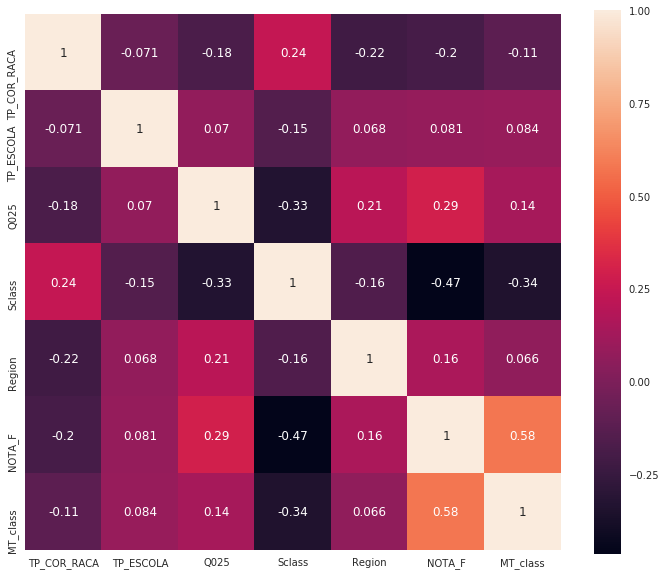

In [131]:
# PLotting the correlations between features
ax = plt.subplots( figsize =( 12 , 10 ) )
foo = sns.heatmap(train.corr(), vmax=1.0, square=True, annot=True)



The Figure above shows the correlation between features. The MT_class is specially correlated to the social class as discussed above. Not surprisingly, the father's and mother's education are correlated, because people tend to have relations with people with similar background. Also, the father's and mother's education are correlated to the social class.

In [132]:
#   One-Hot Enconding
train_n=pd.get_dummies(train, columns=["TP_COR_RACA","TP_ESCOLA","Q001","Q002","Sclass","Q025","Region"], 
                       prefix=["Race","Esc","EdF","EdM","SC","Int","Reg"])



train_n.head()

NOTA_F  MT_class  Race_0  Race_1  Race_2  Race_3  Race_4  Race_5  Esc_1  \
0  536.28         0       0       1       0       0       0       0      1   
3  589.90         0       0       1       0       0       0       0      1   
4  557.34         0       0       0       0       1       0       0      1   
5  559.00         0       0       1       0       0       0       0      1   
6  571.70         0       0       0       1       0       0       0      1   

   Esc_2  ...    SC_2  SC_3  SC_4  Int_0  Int_1  Reg_0  Reg_1  Reg_2  Reg_3  \
0      0  ...       0     0     1      0      1      0      0      0      0   
3      0  ...       0     0     1      0      1      0      0      0      1   
4      0  ...       0     0     1      0      1      0      0      1      0   
5      0  ...       1     0     0      0      1      0      0      0      1   
6      0  ...       0     0     1      0      1      0      0      0      1   

   Reg_4  
0      1  
3      0  
4      0  
5      0  
6      0  

[5 rows x 40 columns]

# 4. Modelling

In [133]:
# Separating into "Independents" (X) and dependent (Y) variables
X=train_n.loc[:,'Race_0':'Reg_4']
y=train_n.loc[:,'MT_class']

In [134]:
# Splitting the sample into training (70%) and test (30%) sets.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [135]:
X_train.columns

Index(['Race_0', 'Race_1', 'Race_2', 'Race_3', 'Race_4', 'Race_5', 'Esc_1',
       'Esc_2', 'Esc_3', 'Esc_4', 'EdF_A', 'EdF_B', 'EdF_C', 'EdF_D', 'EdF_E',
       'EdF_F', 'EdF_G', 'EdF_H', 'EdM_A', 'EdM_B', 'EdM_C', 'EdM_D', 'EdM_E',
       'EdM_F', 'EdM_G', 'EdM_H', 'SC_0', 'SC_1', 'SC_2', 'SC_3', 'SC_4',
       'Int_0', 'Int_1', 'Reg_0', 'Reg_1', 'Reg_2', 'Reg_3', 'Reg_4'],
      dtype='object')

Because our sample is comprised by imbalanced classes (94% belonging to class 0 and 6% to class 1), if we apply a machine learning model to the training sample as it is, the model will most likely fit well only one of the classes. This happens because the models are minimizing the error and even if they predict all values for class 1 wrongly, they would still have 94% accuracy.

In order to avoid this problem we have to resample the training set. There are two ways to do this: oversampling or undersampling. In the oversampling case, the class with lowest amount of records is increased until its size balances the large class. This method is recommended when the sample is small. In the undersampling case, the larger class is underpopulated until its size balances the size of the smallest class. 

Because our dataset is big, we will apply undersampling in order to get a balanced dataset. We will aplly random undersampling to the training set in order to achieve balance.

In [136]:
#rus = RandomUnderSampler(random_state=42,
#                        replacement=True)
rus = RandomUnderSampler(
                        replacement=True)

In [137]:
# New training set
X_res, y_res = rus.fit_sample(X_train, y_train)

In [138]:
# we can see that the trainig set is now considerably smaller
len(y_res)

359650

In [139]:
# Proportion of class 0 and class 1 in the training set
pd.value_counts(y_res,dropna=True,sort=False,normalize=True)

0    0.5
1    0.5
dtype: float64

### 4.1 Training the Models

We are going to start applying logistic regression, naive Bayes and decision tree to the training set in order to predict in which classes the exam takers would be.

In [140]:
# Logistic Regression
clf_log = LogisticRegression()
clf_log = clf_log.fit(X_res,y_res) # fit logistic regression to the trainig set
#score_log = clf_log.score(X_res,y_res)
score_log = cross_val_score(clf_log, X_res, y_res, cv=5).mean()
print('Accuracy:',score_log)

Accuracy: 0.786161545947


In [141]:
# Naive Bayes
#clf_bay = GaussianNB()
clf_bay = MultinomialNB()
clf_bay.fit(X_res,y_res)
#score_bay = clf_bay.score(X_res,y_res)
score_bay = cross_val_score(clf_bay, X_res, y_res, cv=5).mean()
print('Accuracy:',score_bay)

Accuracy: 0.781326289448


In [142]:
# Decision Tree
clf_tree = DecisionTreeClassifier(
    #max_depth=3,\
    class_weight="balanced",\
    min_weight_fraction_leaf=0.01\
    )
clf_tree = clf_tree.fit(X_res,y_res)
score_tree = cross_val_score(clf_tree, X_res, y_res, cv=5).mean()
print('Accuracy',score_tree)

Accuracy 0.778534686501


We can see that for the three methods the accuracy is very similar and around 79%.

Contribution of each feature to the logistic regression model:

In [143]:
pd.DataFrame(list(zip(X_train.columns, np.transpose(clf_log.coef_))))

0                    1
0   Race_0     [0.612513454995]
1   Race_1     [0.227065606955]
2   Race_2    [-0.293099521166]
3   Race_3     [-0.02110221223]
4   Race_4     [0.120787151594]
5   Race_5    [-0.711130819942]
6    Esc_1    [-0.249553774528]
7    Esc_2    [-0.983823505869]
8    Esc_3     [0.322609002744]
9    Esc_4     [0.845801937804]
10   EdF_A    [-0.633130151958]
11   EdF_B    [-0.427168236691]
12   EdF_C     [-0.12211368564]
13   EdF_D   [-0.0059832326778]
14   EdF_E     [0.190830590192]
15   EdF_F     [0.583256818545]
16   EdF_G      [0.57935114254]
17   EdF_H    [-0.230009583974]
18   EdM_A    [-0.909811254853]
19   EdM_B    [-0.549103286076]
20   EdM_C     [-0.17749887535]
21   EdM_D   [-0.0429829702509]
22   EdM_E     [0.303766392321]
23   EdM_F     [0.707034703399]
24   EdM_G     [0.721050953194]
25   EdM_H    [-0.117422002112]
26    SC_0     [0.796403774474]
27    SC_1     [0.639021294339]
28    SC_2     [0.196961721246]
29    SC_3    [-0.437618061195]
30    SC_4     [-1.25973506862]
31   Int_0     [-0.44506785718]
32   Int_1     [0.380101517294]
33   Reg_0  [-0.00462737680027]
34   Reg_1    [-0.337472290881]
35   Reg_2     [0.222128347979]
36   Reg_3    [-0.147638063477]
37   Reg_4     [0.202643043415]

In [144]:
#From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 4.2 Predictions

In [145]:
# Predictions using logistic regression
y_pred_log = clf_log.predict(X_test) 

In [146]:
# Predictions using Naive Bayes
y_pred_bay = clf_bay.predict(X_test) 

In [147]:
# Predictions using Decision Tree
y_pred_tree = clf_tree.predict(X_test) 

In [148]:
# Getting confusion matrix for logistic regression
conf_log=confusion_matrix(y_test, y_pred_log)
# Getting confusion matrix for Naive Bayes
conf_bay=confusion_matrix(y_test, y_pred_bay)
# Getting confusion matrix for Decision Tree
conf_tree=confusion_matrix(y_test, y_pred_tree)

Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.21  0.79]]


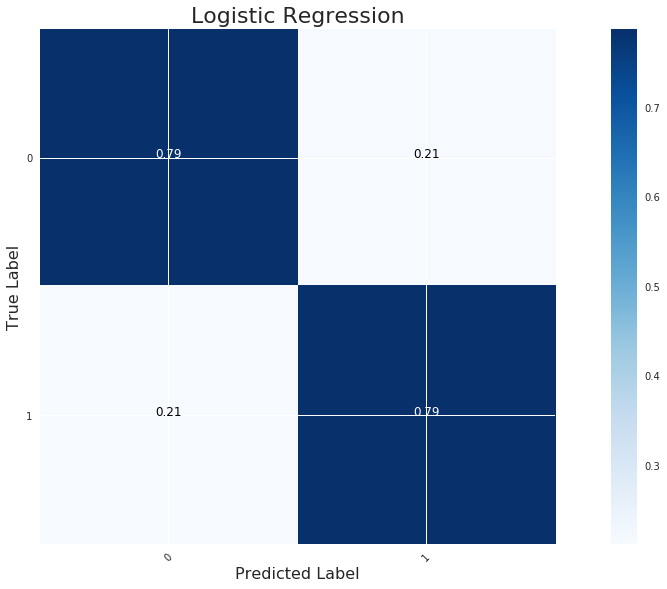

In [149]:
class_names=[0,1]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(16,8))
plot_confusion_matrix(conf_log, classes=class_names, normalize=True)
ax.set_title('Logistic Regression',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
#savefig('conf_matrix_log.eps', fmt='eps', dpi=200)
plt.show()

Normalized confusion matrix
[[ 0.78  0.22]
 [ 0.22  0.78]]


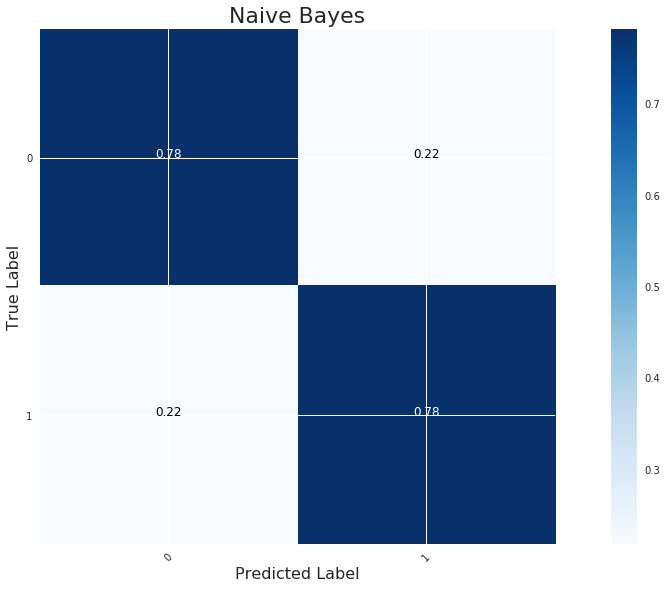

In [150]:
class_names=[0,1]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(16,8))
plot_confusion_matrix(conf_bay, classes=class_names, normalize=True)
ax.set_title('Naive Bayes',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
#savefig('conf_matrix_bay.eps', fmt='eps', dpi=200)
plt.show()

Normalized confusion matrix
[[ 0.76  0.24]
 [ 0.2   0.8 ]]


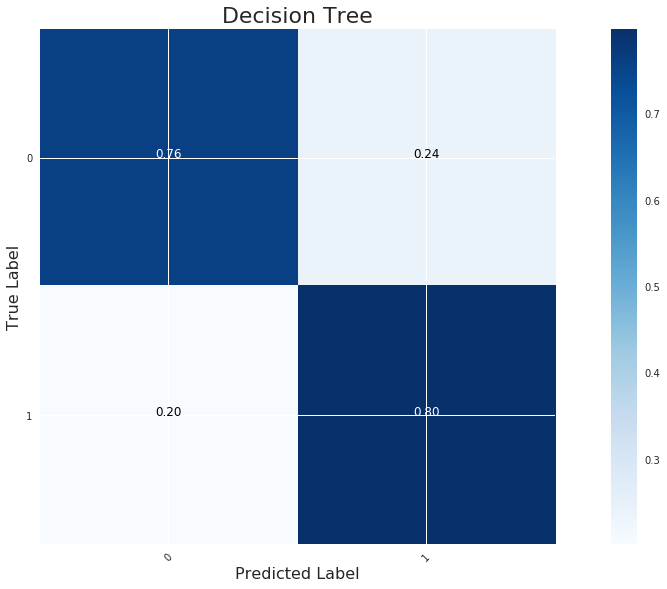

In [151]:
class_names=[0,1]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(16,8))
plot_confusion_matrix(conf_tree, classes=class_names, normalize=True)
ax.set_title('Decision Tree',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
#savefig('conf_matrix_bay.eps', fmt='eps', dpi=200)
plt.show()

In [152]:
# Classification Metrics
print(classification_report_imbalanced(y_test, y_pred_bay))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.78      0.78      0.87      0.78      0.61   1134050
          1       0.20      0.78      0.78      0.31      0.78      0.61     76957

avg / total       0.93      0.78      0.78      0.83      0.78      0.61   1211007



#### Multiple training sets

One caveat of random undersamplig is the fact that information might be lost in the processing of reducing the majority class. In order to avoid this, we will use the **Easy Ensemble** task of the library to create 23 balanced training datasets. 
The final label will be decided using a majority vote, based on the labels each training set provided.

In [153]:
#ee = EasyEnsemble(random_state=42,n_subsets=23)
ee = EasyEnsemble(n_subsets=23)

In [154]:
X_ee, y_ee = ee.fit_sample(X_train, y_train)

In [155]:
# Hard voting function 
def votos(data1,data2):
    predictions = {}
    prev={}
    for i in range(0,22): 
        XX=np.reshape(data1[[i]],(len(data1[i]),38))
      
        yy=np.reshape(data2[[i]],len(data2[i]))
        clf_log = LogisticRegression()

        clf_log = clf_log.fit(XX,yy)
        y_p = clf_log.predict(X_test)
        predictions[i] = y_p        

    new_df = pd.DataFrame(predictions)
    new_df = new_df[sorted(new_df.columns)]

    new_df['soma']=new_df.sum(axis=1)
    prev = pd.DataFrame(predictions[0])

    prev['final']=0
    prev.final[(new_df.soma >= 12)]=1
   
    prev['test']=y_test.values
    prev['ind']=y_test.index
    return new_df,prev

In [156]:
# Using voting system 
new_df, prev = votos(X_ee,y_ee)

In [157]:

conf_EE=confusion_matrix(y_test, prev['final'])
conf_EE

array([[893529, 240521],
       [ 16513,  60444]])

Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.21  0.79]]


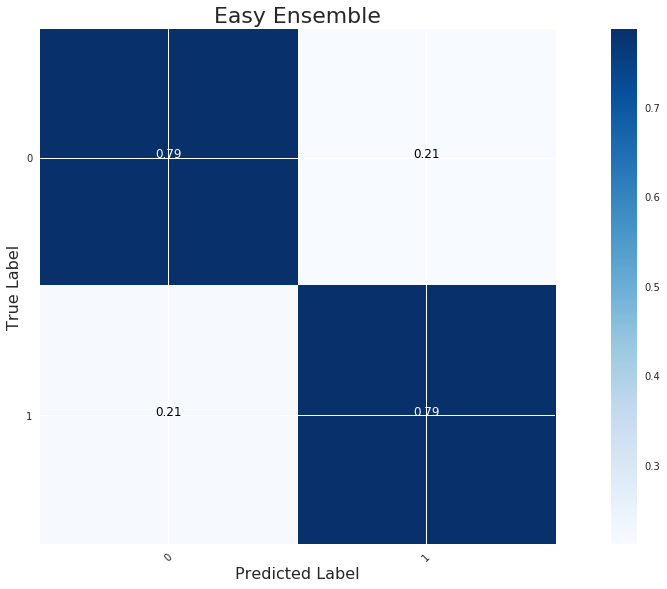

In [158]:
class_names=[0,1]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(16,8))
plot_confusion_matrix(conf_EE, classes=class_names, normalize=True)
ax.set_title('Easy Ensemble',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
savefig('conf_matrix_EE.eps', fmt='eps', dpi=200)
plt.show()


In [159]:
# Classification Metrics
print(classification_report_imbalanced(y_test, prev['final']))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.79      0.79      0.87      0.79      0.62   1134050
          1       0.20      0.79      0.79      0.32      0.79      0.62     76957

avg / total       0.93      0.79      0.79      0.84      0.79      0.62   1211007



#### Finding the composition of the false negatives and false positives

Can we improve the predictions using other models? Before applying more models, let's take a look in the composition of the samples the models misclassified. We will focus on the result of the logistic regression applied to the 23 training samples described above. 

In [160]:
prev['diff'] = prev['test']-prev['final']
prev.isnull().sum()

0        0
final    0
test     0
ind      0
diff     0
dtype: int64

In [161]:
pd.value_counts(prev['diff'],dropna=True,sort=False)

 0    953973
 1     16513
-1    240521
Name: diff, dtype: int64

In [162]:
surv= prev.loc[:][prev.test==1][prev.final==0]
surv

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0  final  test      ind  diff
3        0      0     1  4154444     1
48       0      0     1  3684135     1
85       0      0     1  3841293     1
128      0      0     1  2197825     1
178      0      0     1  1952819     1
227      0      0     1  1674459     1
238      0      0     1   378877     1
281      0      0     1  2252752     1
397      0      0     1  1553993     1
434      0      0     1  1592832     1
439      0      0     1   105290     1
446      0      0     1  2816822     1
451      0      0     1  4488772     1
663      0      0     1   792850     1
904      0      0     1   111593     1
917      0      0     1  2055319     1
1003     0      0     1  1000962     1
1070     0      0     1  3275936     1
1099     0      0     1  2784158     1
1223     0      0     1  1570365     1
1240     0      0     1   290563     1
1300     0      0     1  4433920     1
1339     0      0     1   299655     1
1403     0      0     1  3675139     1
1436     0      0     1  5697164     1
1631     0      0     1   671091     1
1639     0      0     1    94851     1
1674     0      0     1  3623640     1
1709     0      0     1  1734562     1
1800     0      0     1  5386472     1
...     ..    ...   ...      ...   ...
1209367  0      0     1  4163081     1
1209532  0      0     1  5171197     1
1209536  0      0     1  4951737     1
1209655  0      0     1   440902     1
1209681  0      0     1  2553247     1
1209847  0      0     1  2854178     1
1209870  0      0     1   587069     1
1209874  0      0     1  6344111     1
1209960  0      0     1  3464479     1
1209964  0      0     1  4035845     1
1210087  0      0     1  3563708     1
1210093  0      0     1  1202588     1
1210138  0      0     1  5890316     1
1210148  0      0     1   432135     1
1210151  0      0     1  5309289     1
1210169  0      0     1  4019229     1
1210366  0      0     1   897399     1
1210491  0      0     1  2199499     1
1210559  0      0     1   104254     1
1210592  0      0     1  1554835     1
1210613  0      0     1   998035     1
1210635  0      0     1  4927664     1
1210685  0      0     1   345088     1
1210699  0      0     1  1360027     1
1210789  0      0     1  1461902     1
1210802  0      0     1   729908     1
1210822  0      0     1  1481835     1
1210839  0      0     1  4162172     1
1210906  0      0     1  2023085     1
1210925  0      0     1  4706150     1

[16513 rows x 5 columns]

In [163]:
dummy=[]
dummyf=[]
dummym=[]
dummye=[]
dummyre=[]
dummyr=[]
for idx in surv['ind']:
    dummy.append(df_c.loc[idx, 'Sclass'])
    dummyf.append(df_c.loc[idx, 'Q001'])
    dummym.append(df_c.loc[idx, 'Q002'])
    dummye.append(df_c.loc[idx, 'TP_ESCOLA'])    
    dummyre.append(df_c.loc[idx, 'Region'])
    dummyr.append(df_c.loc[idx, 'TP_COR_RACA'])        
    
    
#surv['Sclass'    

In [164]:
ss=pd.Series(dummy)
vv=pd.value_counts(ss,dropna=True,sort=False,normalize=True)
ssf=pd.Series(dummyf)
vvf=pd.value_counts(ssf,dropna=True,sort=False,normalize=True)
ssm=pd.Series(dummym)
vvm=pd.value_counts(ssm,dropna=True,sort=False,normalize=True)
sse=pd.Series(dummye)
vve=pd.value_counts(sse,dropna=True,sort=False,normalize=True)
ssre=pd.Series(dummyre)
vvre=pd.value_counts(ssre,dropna=True,sort=False,normalize=True)
ssr=pd.Series(dummyr)
vvr=pd.value_counts(ssr,dropna=True,sort=False,normalize=True)

In [165]:
surv0= prev.loc[:][prev.test==0][prev.final==1]
surv0


/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0  final  test      ind  diff
0        1      1     0  1253346    -1
7        1      1     0   951568    -1
10       1      1     0  4021636    -1
12       1      1     0  2597674    -1
13       1      1     0  2692225    -1
14       1      1     0    68357    -1
27       1      1     0  3409930    -1
37       1      1     0  4413126    -1
43       1      1     0  3268534    -1
45       1      1     0  6430308    -1
49       1      1     0  2625755    -1
55       1      1     0  5447227    -1
57       1      1     0  3491343    -1
58       1      1     0  2807437    -1
62       1      1     0  3651455    -1
64       1      1     0  3270336    -1
65       1      1     0  2276749    -1
66       1      1     0  1339537    -1
70       1      1     0  2196782    -1
72       1      1     0   765756    -1
76       1      1     0   756924    -1
83       1      1     0  2804240    -1
86       1      1     0  2972768    -1
94       1      1     0  1687720    -1
95       1      1     0  4366879    -1
97       1      1     0   361995    -1
102      1      1     0  3477972    -1
104      1      1     0   369397    -1
112      1      1     0  3649607    -1
113      1      1     0  1937133    -1
...     ..    ...   ...      ...   ...
1210876  1      1     0  4773533    -1
1210878  1      1     0  1778470    -1
1210885  1      1     0  5536784    -1
1210895  1      1     0  2989312    -1
1210897  1      1     0  3175132    -1
1210900  1      1     0  4036161    -1
1210902  1      1     0   687907    -1
1210907  1      1     0  5304159    -1
1210908  1      1     0  3830367    -1
1210914  1      1     0   299458    -1
1210915  1      1     0    85946    -1
1210917  1      1     0  6692874    -1
1210918  1      1     0  6571926    -1
1210920  1      1     0  5169860    -1
1210932  1      1     0  4106429    -1
1210933  1      1     0  5412624    -1
1210937  1      1     0  1363175    -1
1210942  1      1     0  3368506    -1
1210954  1      1     0  3240831    -1
1210957  1      1     0   331452    -1
1210960  1      1     0  5105136    -1
1210961  1      1     0  1847610    -1
1210974  1      1     0  1802388    -1
1210976  1      1     0  4560876    -1
1210978  1      1     0  2355565    -1
1210980  1      1     0  6197878    -1
1210981  1      1     0  1012979    -1
1210989  1      1     0  5320347    -1
1210999  1      1     0  1256330    -1
1211002  1      1     0  4417527    -1

[240521 rows x 5 columns]

In [166]:
dummy0=[]
dummy0f=[]
dummy0m=[]
dummy0e=[]
dummy0re=[]
dummy0r=[]
for idx in surv0['ind']:
    dummy0.append(df_c.loc[idx, 'Sclass'])
    dummy0f.append(df_c.loc[idx, 'Q001'])
    dummy0m.append(df_c.loc[idx, 'Q002'])
    dummy0e.append(df_c.loc[idx, 'TP_ESCOLA'])    
    dummy0re.append(df_c.loc[idx, 'Region'])
    dummy0r.append(df_c.loc[idx, 'TP_COR_RACA'])        
    
#surv['Sclass'

In [167]:
ss0=pd.Series(dummy0)
vv0=pd.value_counts(ss0,dropna=True,sort=False,normalize=True)
ss0f=pd.Series(dummy0f)
vv0f=pd.value_counts(ss0f,dropna=True,sort=False,normalize=True)
ss0m=pd.Series(dummy0m)
vv0m=pd.value_counts(ss0m,dropna=True,sort=False,normalize=True)
ss0e=pd.Series(dummy0e)
vv0e=pd.value_counts(ss0e,dropna=True,sort=False,normalize=True)
ss0re=pd.Series(dummy0re)
vv0re=pd.value_counts(ss0re,dropna=True,sort=False,normalize=True)
ss0r=pd.Series(dummy0r)
vv0r=pd.value_counts(ss0r,dropna=True,sort=False,normalize=True)

In [168]:
surv1= prev.loc[:][prev.test==1][prev.final==1]
surv1


/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0  final  test      ind  diff
6        1      1     1  6659370     0
25       1      1     1  3047749     0
31       1      1     1  4809502     0
32       1      1     1  4017455     0
38       1      1     1   693052     0
54       1      1     1  4871932     0
98       1      1     1  2866629     0
105      1      1     1   581995     0
108      1      1     1  3293694     0
116      1      1     1  1380944     0
154      1      1     1  5759414     0
156      1      1     1  2195434     0
213      1      1     1  1008609     0
241      1      1     1  1288963     0
245      1      1     1  1558778     0
253      1      1     1  6141188     0
270      1      1     1  4327165     0
301      1      1     1  6285194     0
308      1      1     1  3172635     0
314      1      1     1  1633205     0
343      1      1     1  1352343     0
406      1      1     1  3145620     0
413      1      1     1  2267960     0
417      1      1     1  1302541     0
419      1      1     1  1076851     0
456      1      1     1  2597982     0
517      1      1     1  2572958     0
532      1      1     1   421478     0
572      1      1     1  1747036     0
587      1      1     1    51649     0
...     ..    ...   ...      ...   ...
1210273  1      1     1  4170913     0
1210285  1      1     1  3365501     0
1210291  1      1     1  1668303     0
1210297  1      1     1  3679949     0
1210305  1      1     1  1815020     0
1210318  1      1     1   780588     0
1210333  1      1     1  2299315     0
1210371  1      1     1  4488298     0
1210373  1      1     1  5228861     0
1210376  1      1     1  3745815     0
1210379  1      1     1  1218585     0
1210407  1      1     1   420557     0
1210463  1      1     1   137292     0
1210581  1      1     1  4339420     0
1210616  1      1     1   531600     0
1210628  1      1     1  1719175     0
1210640  1      1     1   381406     0
1210660  1      1     1  5897144     0
1210673  1      1     1   398678     0
1210683  1      1     1  1810244     0
1210700  1      1     1  2896420     0
1210705  1      1     1  3223098     0
1210738  1      1     1   886750     0
1210798  1      1     1  3335139     0
1210815  1      1     1  3544251     0
1210866  1      1     1  2581048     0
1210887  1      1     1  3977003     0
1210913  1      1     1  4305191     0
1210923  1      1     1  2989562     0
1210991  1      1     1  2449634     0

[60444 rows x 5 columns]

In [169]:
dummy1=[]
dummy1f=[]
dummy1m=[]
dummy1e=[]
dummy1re=[]
dummy1r=[]
for idx in surv1['ind']:
    dummy1.append(df_c.loc[idx, 'Sclass'])
    dummy1.append(df_c.loc[idx, 'Sclass'])
    dummy1f.append(df_c.loc[idx, 'Q001'])
    dummy1m.append(df_c.loc[idx, 'Q002'])
    dummy1e.append(df_c.loc[idx, 'TP_ESCOLA'])    
    dummy1re.append(df_c.loc[idx, 'Region'])
    dummy1r.append(df_c.loc[idx, 'TP_COR_RACA'])        
    

In [170]:
ss1=pd.Series(dummy1)
vv1=pd.value_counts(ss1,dropna=True,sort=False,normalize=True)
ss1f=pd.Series(dummy1f)
vv1f=pd.value_counts(ss1f,dropna=True,sort=False,normalize=True)
ss1m=pd.Series(dummy1m)
vv1m=pd.value_counts(ss1m,dropna=True,sort=False,normalize=True)
ss1e=pd.Series(dummy1e)
vv1e=pd.value_counts(ss1e,dropna=True,sort=False,normalize=True)
ss1re=pd.Series(dummy1re)
vv1re=pd.value_counts(ss1re,dropna=True,sort=False,normalize=True)
ss1r=pd.Series(dummy1r)
vv1r=pd.value_counts(ss1r,dropna=True,sort=False,normalize=True)

In [173]:
SC2=vv.sort_index()
FE2=vvf.sort_index()
ME2=vvm.sort_index()

SC20=vv0.sort_index()
FE20=vv0f.sort_index()
ME20=vv0m.sort_index()

SC21=vv1.sort_index()
FE21=vv1f.sort_index()
ME21=vv1m.sort_index()


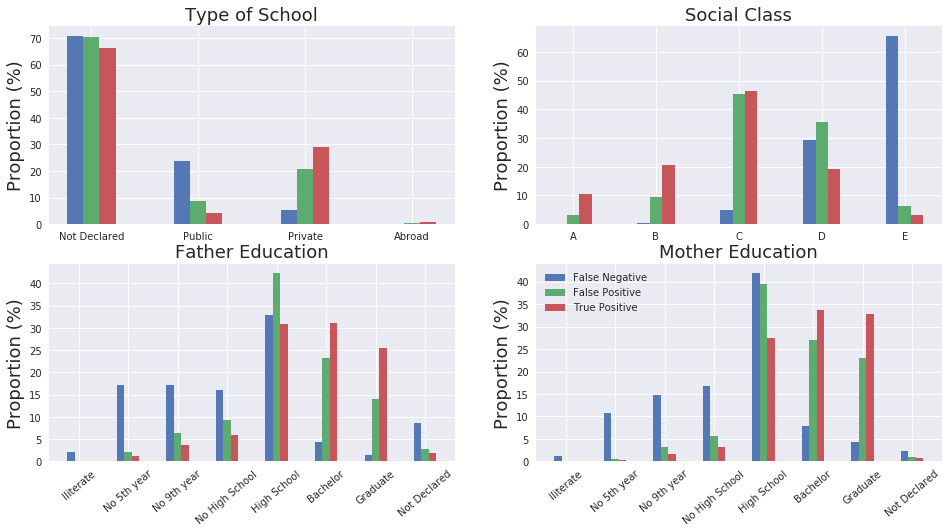

In [174]:
order = sorted(SC2.index)

order3 = sorted(df_c.Q001.unique())
order4 = sorted(df_c.Q002.unique())
f,ax=plt.subplots(2,2,figsize=(16,8))
bar_width = 0.15
objects=list(order)
index=np.arange(len(objects))

obj2=list(vve.index)
index2=np.arange(len(obj2))

obj3=list(order3)
index3=np.arange(len(obj3))

obj4=list(order4)
index4=np.arange(len(obj4))


rects1 = ax[0,1].bar(index, SC2*100, bar_width,alpha=0.95, label='False Negative',color='b')
rects2 = ax[0,1].bar(index+bar_width, SC20*100, bar_width,alpha=0.95, label='False Positive',color='g')
rects2a = ax[0,1].bar(index+2*bar_width, SC21*100, bar_width,alpha=0.95, label='True Positive',color='r')

plt.sca(ax[0,1])
plt.xticks(index+0.15,objects)
ax[0,1].set_xticklabels(['A','B','C','D','E'])
ax[0,1].set_ylabel('Proportion (%)', fontsize=18)
#ax[0,1].set_xlabel('Social Class', fontsize=14)
ax[0,1].set_title('Social Class', fontsize=18)

rects3 = ax[0,0].bar(index2, vve*100, bar_width,alpha=0.95, label='False Negative',color='b')
rects4 = ax[0,0].bar(index2+bar_width, vv0e*100, bar_width,alpha=0.95, label='False Positive',color='g')
rects4a = ax[0,0].bar(index2+2*bar_width, vv1e*100, bar_width,alpha=0.95, label='True Positive',color='r')

plt.sca(ax[0,0])
plt.xticks(index2+0.15,obj2)
ax[0,0].set_xticklabels(['Not Declared','Public','Private','Abroad'])
ax[0,0].set_ylabel('Proportion (%)', fontsize=18)
#ax[0,0].set_xlabel('Type of School', fontsize=14)
ax[0,0].set_title('Type of School', fontsize=18)

rects5 = ax[1,0].bar(index3, FE2*100, bar_width,alpha=0.95, label='False Negative',color='b')
rects6 = ax[1,0].bar(index3+bar_width, FE20*100, bar_width,alpha=0.95, label='False Positive',color='g')
rects6a = ax[1,0].bar(index3+2*bar_width, FE21*100, bar_width,alpha=0.95, label='True Positive',color='r')

ax[1,0].set_ylabel('Proportion (%)', fontsize=18)
#ax[1,0].set_xlabel('Father Education', fontsize=14)
ax[1,0].set_title('Father Education', fontsize=18)
plt.sca(ax[1,0])
plt.xticks(index3+0.15,obj3)
ax[1,0].set_xticklabels(['Iliterate','No 5th year','No 9th year','No High School',
                      'High School','Bachelor','Graduate','Not Declared'], rotation=40)

rects7 = ax[1,1].bar(index3, ME2*100, bar_width,alpha=0.95, label='False Negative',color='b')
rects8 = ax[1,1].bar(index3+bar_width, ME20*100, bar_width,alpha=0.95, label='False Positive',color='g')
rects8a = ax[1,1].bar(index3+2*bar_width, ME21*100, bar_width,alpha=0.95, label='True Positive',color='r')

ax[1,1].set_ylabel('Proportion (%)', fontsize=18)
#ax[1,1].set_xlabel('Mother Education', fontsize=14)
ax[1,1].set_title('Mother Education', fontsize=18)
plt.sca(ax[1,1])
plt.xticks(index4+0.15,obj4)
ax[1,1].set_xticklabels(['Iliterate','No 5th year','No 9th year','No High School',
                      'High School','Bachelor','Graduate','Not Declared'], rotation=40)


plt.legend()
#savefig('errados.eps', fmt='eps', dpi=200)
plt.show()

The Figures above show the composition of the false negatives, false positives and true positives. The first thing we can observe is that the vast majority of those who were misclassified to class 0 (false negatives) belong to the lowest social class (E). Also, most of them do not have a higher education background. These records seem to represent people who beat the odds and would not be correctly assigned by the models, based on the current features. Similarly, the false positive records represent people that have the social and economic conditions to perform well (for instance, middle and upper classes), but did not in spite of that. For this reason, we believe it is unlikely that more complex models will perform much better than those models used above. In addition, being able to predict 80% of the takers only based on their socio-economic background is already a pretty good indication of the influence these conditions have on the access to higher education in Brazil.

# 5. Conclusions

We have analyzed the 2017 data for the ENEM which is the exam used as a selection criterion for the
public universities in Brazil. Our aim was to show the impact of socio-economic background on the access to higher education and to use models to predict those takers more likely to be selected. In a fair, merit based system, we should not be able to predict whether a particular candidate would perform well or not on the exam using only features related to social and economic conditions. 

The data consist of social and economic information of the takers together with
information related to their perfomance in the exam. We have performed the necessary cleaning, filtering, and
transformation of the data.

The analysis was divided into exploratory and predictive analysis. The initial exploratory analysis already
reveals that socio-economic background has an important impact on the access to higher education in Brazil.
We have found the features that play a larger role in the takers’ performance: social class, father’s highest
education, mother’s highest education, type of school, region, access to internet and race/ethnicity.

For the predictive analysis, we resampled our training dataset to deal with the imbalance between the classes.
We were able to predict correctly 80% of the sample from both classes. The 20% left are those not following
the general trend and it is unlikely to be reproducible by models using the features described in the exploratory
analysis. This result strenghts our initial argument that inclusion in the access to higher education cannot be
currently achieved in Brazil in spite of all mechanims in place. This shows that full access to primary and
secondary education alone is not sufficient if the quality of the education provided is poor.

A huge improvement of the public primary and secondary educations is the only possible option to get the
country in course to a fair, merit based, admission system. Meanwhile, affirmative actions might help increase
the inclusiveness and fill the gaps of inequality.